In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import sklearn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/nga-east_rotd50_5pct_flatfile_public_20141118.csv')

Mounted at /content/drive


<ipython-input-2-cfaed53d8f5c>:3: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/drive/MyDrive/nga-east_rotd50_5pct_flatfile_public_20141118.csv')


In [ ]:
df.head()

Record Sequence Number  EQID      Earthquake Name Earthquake Location  \
0                      42     5  Saguenay_1988-11-25         Saguenay QC   
1                      43     5  Saguenay_1988-11-25         Saguenay QC   
2                      49     5  Saguenay_1988-11-25         Saguenay QC   
3                      51     5  Saguenay_1988-11-25         Saguenay QC   
4                      52     5  Saguenay_1988-11-25         Saguenay QC   

   Year  Month  Day  Hour  Minute  Earthquake Magnitude  ...  T8.511363s  \
0  1988     11   25    23      46                  5.85  ...    0.000337   
1  1988     11   25    23      46                  5.85  ...    0.000080   
2  1988     11   25    23      46                  5.85  ...    0.000161   
3  1988     11   25    23      46                  5.85  ...    0.000146   
4  1988     11   25    23      46                  5.85  ...    0.000111   

   T8.709663s  T8.912497s       T9s  T9.120093s  T9.332537s     T9.5s  \
0    0.000321    0.000306  0.000299    0.000290    0.000274  0.000263   
1    0.000076    0.000073  0.000071    0.000069    0.000066  0.000064   
2    0.000154    0.000147  0.000144    0.000140    0.000134  0.000129   
3    0.000140    0.000133  0.000131    0.000127    0.000121  0.000117   
4    0.000105    0.000099  0.000096    0.000092    0.000087  0.000083   

   T9.549913s  T9.772401s      T10s  
0    0.000260    0.000248  0.000237  
1    0.000063    0.000060  0.000058  
2    0.000127    0.000122  0.000116  
3    0.000116    0.000111  0.000106  
4    0.000082    0.000077  0.000073  

[5 rows x 517 columns]

In [ ]:

rows, cols = df.shape

print("Number of rows:", rows)
print("Number of columns:", cols)

Number of rows: 9382
Number of columns: 517


In [ ]:
df = df.drop_duplicates()
df = df.drop(df[df['Joyner-Boore Dist. (km)'] == -999 ].index)
df = df.drop(df[df['Joyner-Boore Dist. (km)'] > 1500 ].index)
df = df.drop(df[df['PGA-H RotDnn (g)'] == -999 ].index)
df = df.drop(df[df['HypD (km)'] <= 0 ].index)

In [ ]:

rows, cols = df.shape

print("Number of rows:", rows)
print("Number of columns:", cols)

Number of rows: 8083
Number of columns: 517


In [ ]:
df.reset_index()

index  Record Sequence Number  EQID      Earthquake Name  \
0         0                      42     5  Saguenay_1988-11-25   
1         1                      43     5  Saguenay_1988-11-25   
2         2                      49     5  Saguenay_1988-11-25   
3         3                      51     5  Saguenay_1988-11-25   
4         4                      52     5  Saguenay_1988-11-25   
...     ...                     ...   ...                  ...   
8078   9377                   12062   117  Saguenay_1988-11-26   
8079   9378                   12063   117  Saguenay_1988-11-26   
8080   9379                   12064   117  Saguenay_1988-11-26   
8081   9380                   12065   117  Saguenay_1988-11-26   
8082   9381                   12066   117  Saguenay_1988-11-26   

     Earthquake Location  Year  Month  Day  Hour  Minute  ...    T8.511363s  \
0            Saguenay QC  1988     11   25    23      46  ...  3.371480e-04   
1            Saguenay QC  1988     11   25    23      46  ...  7.981870e-05   
2            Saguenay QC  1988     11   25    23      46  ...  1.613400e-04   
3            Saguenay QC  1988     11   25    23      46  ...  1.462360e-04   
4            Saguenay QC  1988     11   25    23      46  ...  1.113560e-04   
...                  ...   ...    ...  ...   ...     ...  ...           ...   
8078            Saguenay  1988     11   26     3      38  ...  8.933050e-08   
8079            Saguenay  1988     11   26     3      38  ...  1.458760e-07   
8080            Saguenay  1988     11   26     3      38  ...  9.040710e-08   
8081            Saguenay  1988     11   26     3      38  ...  1.289430e-07   
8082            Saguenay  1988     11   26     3      38  ...  1.293710e-07   

        T8.709663s    T8.912497s           T9s    T9.120093s    T9.332537s  \
0     3.214520e-04  3.055400e-04  2.988270e-04  2.896760e-04  2.737270e-04   
1     7.618600e-05  7.271660e-05  7.126930e-05  6.938110e-05  6.621790e-05   
2     1.537930e-04  1.466720e-04  1.437700e-04  1.399400e-04  1.335270e-04   
3     1.395990e-04  1.332670e-04  1.306680e-04  1.272240e-04  1.214550e-04   
4     1.049390e-04  9.863450e-05  9.589730e-05  9.246470e-05  8.669810e-05   
...            ...           ...           ...           ...           ...   
8078  8.531680e-08  8.146960e-08  7.988330e-08  7.777390e-08  7.422510e-08   
8079  1.392980e-07  1.330240e-07  1.304630e-07  1.270800e-07  1.214380e-07   
8080  8.641220e-08  8.256080e-08  8.097280e-08  7.885820e-08  7.529330e-08   
8081  1.231820e-07  1.176900e-07  1.154530e-07  1.125070e-07  1.075390e-07   
8082  1.236290e-07  1.181340e-07  1.158680e-07  1.128520e-07  1.077690e-07   

             T9.5s    T9.549913s    T9.772401s          T10s  
0     2.631590e-04  2.601610e-04  2.482690e-04  2.365760e-04  
1     6.387290e-05  6.319790e-05  6.031420e-05  5.756260e-05  
2     1.288400e-04  1.274950e-04  1.217690e-04  1.163280e-04  
3     1.171800e-04  1.159490e-04  1.106930e-04  1.056780e-04  
4     8.277760e-05  8.168850e-05  7.717850e-05  7.334710e-05  
...            ...           ...           ...           ...  
8078  7.158480e-08  7.082370e-08  6.757090e-08  6.447040e-08  
8079  1.172640e-07  1.160620e-07  1.109160e-07  1.059250e-07  
8080  7.263440e-08  7.186690e-08  6.858680e-08  6.544350e-08  
8081  1.038150e-07  1.027360e-07  9.808450e-08  9.359120e-08  
8082  1.039730e-07  1.028770e-07  9.817620e-08  9.367330e-08  

[8083 rows x 518 columns]

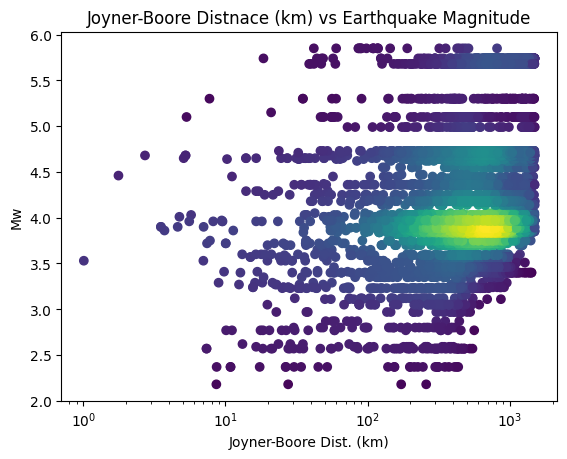

In [ ]:
from scipy.stats import gaussian_kde
x = df['Joyner-Boore Dist. (km)']
y = df['Earthquake Magnitude']
k = gaussian_kde(np.vstack([x, y]))
density = k(np.vstack([x, y]))
cmap = plt.cm.viridis
colors = cmap(density / density.max())

plt.scatter(x, y, color = colors, marker = 'o')
plt.xscale('log')
plt.xlabel("Joyner-Boore Dist. (km)")
plt.ylabel("Mw")
plt.title('Joyner-Boore Distnace (km) vs Earthquake Magnitude')

# plt.grid(True)
plt.show()

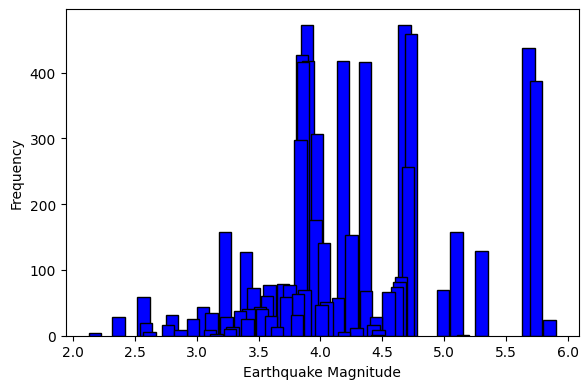

In [ ]:
freq = df['Earthquake Magnitude'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(freq.index, freq.values, color='blue', edgecolor = 'black', width = 0.1)
plt.xlabel("Earthquake Magnitude")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

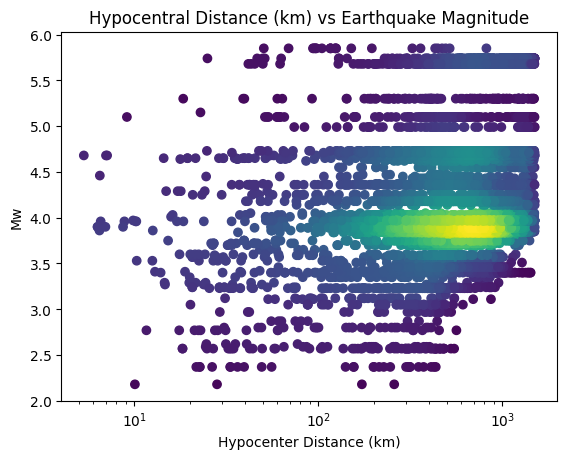

In [ ]:
from scipy.stats import gaussian_kde
x = df['HypD (km)']
y = df['Earthquake Magnitude']
k = gaussian_kde(np.vstack([x, y]))
density = k(np.vstack([x, y]))
cmap = plt.cm.viridis
colors = cmap(density / density.max())

plt.scatter(x, y, color = colors, marker = 'o')
plt.xscale('log')
plt.xlabel("Hypocenter Distance (km)")
plt.ylabel("Mw")
plt.title('Hypocentral Distance (km) vs Earthquake Magnitude')

# plt.grid(True)
plt.show()

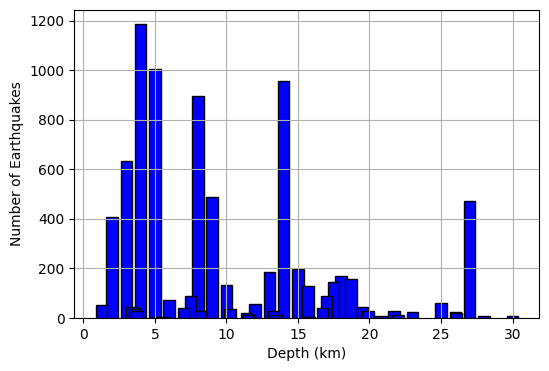

In [ ]:
freq = df['Depth Used (km)'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(freq.index, freq.values, color='blue', edgecolor = 'black', width = 0.8)
plt.xlabel("Depth (km)")
plt.ylabel("Number of Earthquakes")

plt.grid(True)
plt.show()

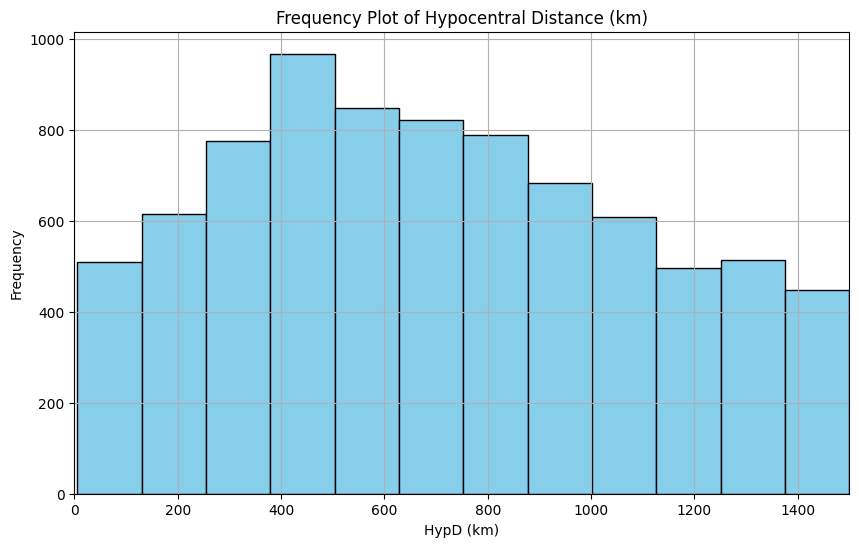

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['HypD (km)'], bins=12, color='skyblue', edgecolor='black')
plt.xlabel('HypD (km)')
plt.ylabel('Frequency')
plt.xlim(0,1500)
plt.title('Frequency Plot of Hypocentral Distance (km)')
plt.grid(True)
plt.show()

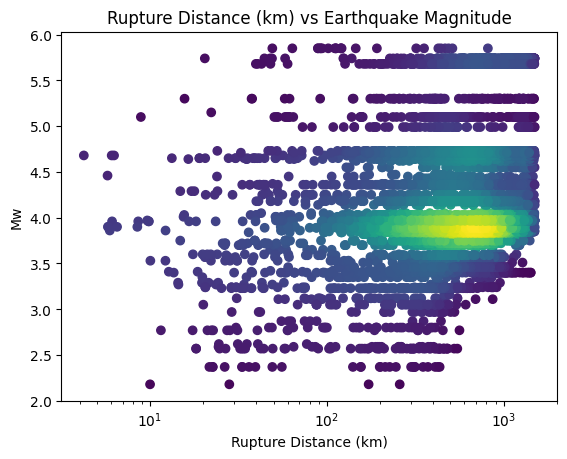

In [ ]:
from scipy.stats import gaussian_kde
x = df['ClstD (km)']
y = df['Earthquake Magnitude']
k = gaussian_kde(np.vstack([x, y]))
density = k(np.vstack([x, y]))
cmap = plt.cm.viridis
colors = cmap(density / density.max())
plt.scatter(x,y, color = colors, marker = 'o')
plt.xscale('log')
plt.xlabel("Rupture Distance (km)")
plt.ylabel("Mw")
plt.title('Rupture Distance (km) vs Earthquake Magnitude')

# plt.grid(True)
plt.show()

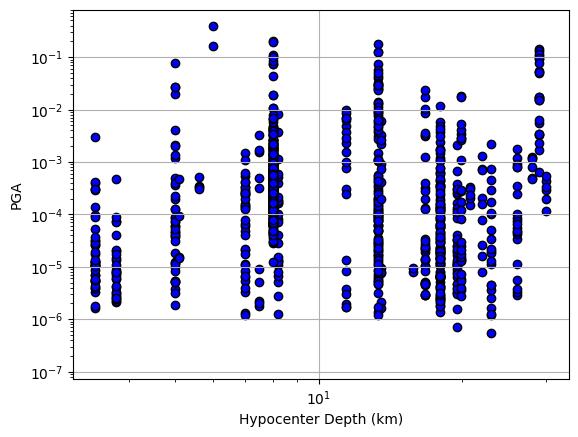

In [ ]:
plt.scatter(df['Hypocenter Depth (km)'], df['PGA-H RotDnn (g)'], color = 'blue', marker = 'o', edgecolors = 'black')
plt.xlabel("Hypocenter Depth (km)")
plt.ylabel("PGA")
plt.xscale('log')
plt.yscale('log')

plt.grid(True)
plt.show()

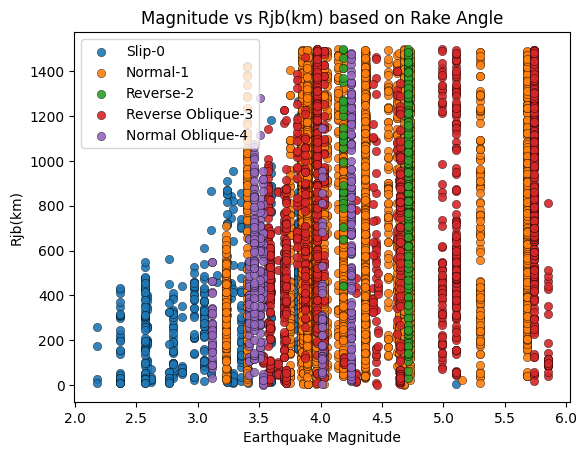

In [ ]:
groups = sorted(df['Mechanism Based on Rake Angle'].unique())
for group in groups:
    group_data = df[df['Mechanism Based on Rake Angle'] == group]
    plt.scatter(group_data['Earthquake Magnitude'], group_data['Joyner-Boore Dist. (km)'],label=group, alpha = 0.9,edgecolor = 'black',linewidth = 0.3)


plt.xlabel("Earthquake Magnitude")
plt.ylabel("Rjb(km)")
custom_labels = ['Slip-0', 'Normal-1', 'Reverse-2', 'Reverse Oblique-3', 'Normal Oblique-4']
plt.legend(custom_labels,loc = 'upper left')
plt.title('Magnitude vs Rjb(km) based on Rake Angle')
# plt.legend()

# plt.grid(True)
plt.show()

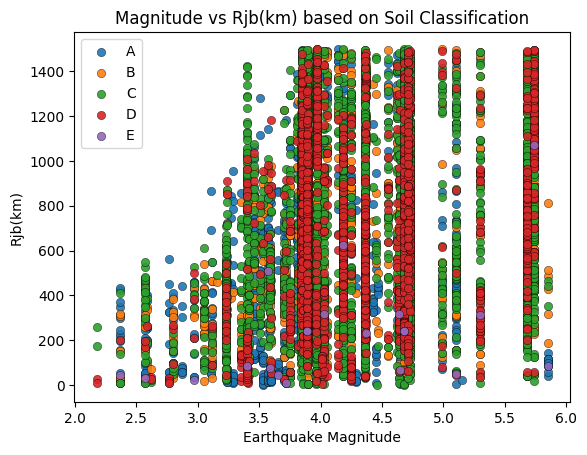

In [ ]:
def group_name(vs30):
    if vs30 > 1500:
        return 'A'
    elif 760 <= vs30 <= 1500:
        return 'B'
    elif 360 <= vs30 < 760:
        return 'C'
    elif 180 <= vs30 < 360:
        return 'D'
    elif vs30 < 180:
        return 'E'
    else:
        return 'F'

df['Soil Class'] = df['Preferred VS30 (m/sec)'].apply(group_name)

for group in sorted(df['Soil Class'].unique()):
    group_data = df[df['Soil Class'] == group]
    plt.scatter(group_data['Earthquake Magnitude'], group_data['Joyner-Boore Dist. (km)'],label=group, alpha = 0.9,edgecolor = 'black',linewidth = 0.3)


plt.xlabel("Earthquake Magnitude")
plt.ylabel("Rjb(km)")
custom_labels = ['A', 'B', 'C', 'D', 'E', 'F']
plt.legend(custom_labels,loc = 'upper left')
plt.title('Magnitude vs Rjb(km) based on Soil Classification')
# plt.legend()

# plt.grid(True)
plt.show()

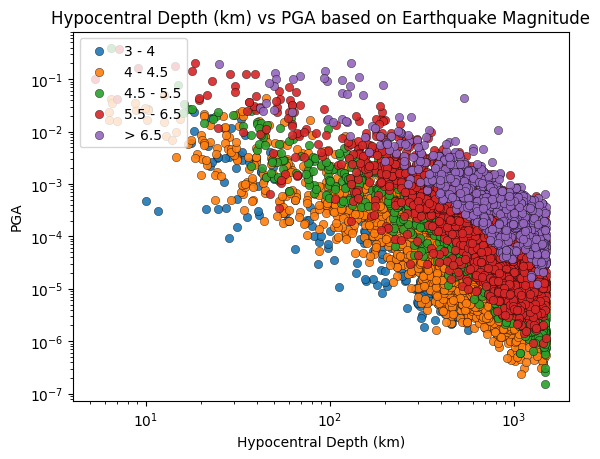

In [ ]:
def group_name(mw):
    if mw < 3:
        return 'A'
    elif 3 <= mw < 4:
        return 'B'
    elif 4 <= mw < 4.5:
        return 'C'
    elif 4.5 <= mw < 5.5:
        return 'D'
    elif 5.5 <= mw < 6.5:
        return 'E'
    elif 6.5 <= mw:
        return 'F'

df['MAG Class'] = df['Earthquake Magnitude'].apply(group_name)

for group in sorted(df['MAG Class'].unique()):
    group_data = df[df['MAG Class'] == group]
    plt.scatter(group_data['HypD (km)'], group_data['PGA-H RotDnn (g)'],  label = group, alpha = 0.9,edgecolor = 'black',linewidth = 0.3)


plt.xlabel("Hypocentral Depth (km)")
plt.ylabel("PGA")
custom_labels = ['3 - 4', '4 - 4.5', '4.5 - 5.5', '5.5 - 6.5', '> 6.5']
plt.legend(custom_labels,loc = 'upper left')
# plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.title('Hypocentral Depth (km) vs PGA based on Earthquake Magnitude')

plt.show()

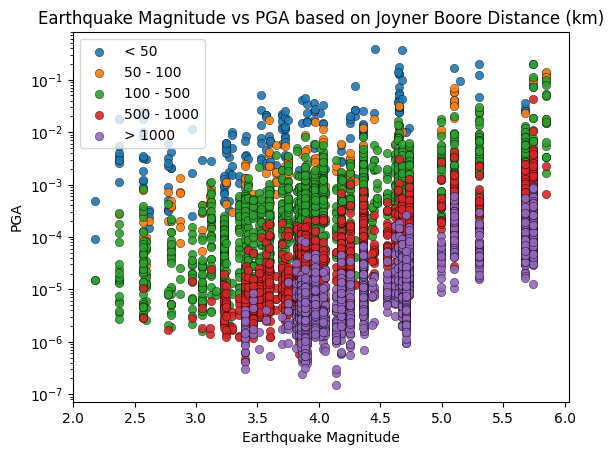

In [ ]:
def group_name(r):
    if r < 50:
        return 'A'
    elif 50 <= r < 100:
        return 'B'
    elif 100 <= r < 500:
        return 'C'
    elif 500 <= r < 1000:
        return 'D'
    elif 1000 <= r :
        return 'E'


df['R Class'] = df['Joyner-Boore Dist. (km)'].apply(group_name)

for group in sorted(df['R Class'].unique()):
    group_data = df[df['R Class'] == group]
    plt.scatter(group_data['Earthquake Magnitude'], group_data['PGA-H RotDnn (g)'], alpha = 0.9,edgecolor = 'black',linewidth = 0.3, label = group)


plt.xlabel("Earthquake Magnitude")
plt.ylabel("PGA")
custom_labels = ['< 50', '50 - 100', '100 - 500', '500 - 1000', '> 1000']
plt.legend(custom_labels,loc = 'upper left')
# plt.legend()
plt.yscale('log')
# plt.xscale('log')
plt.title('Earthquake Magnitude vs PGA based on Joyner Boore Distance (km)')

plt.show()

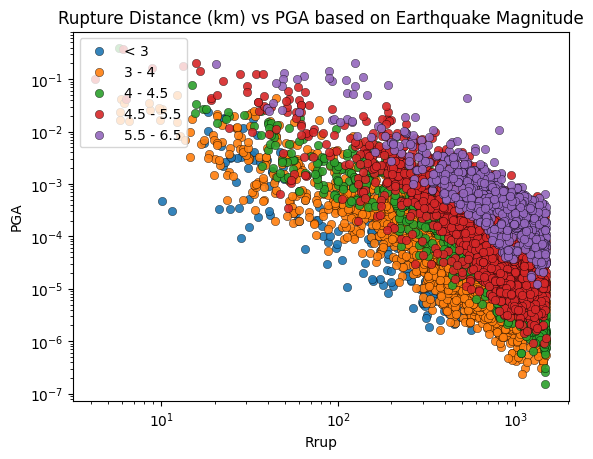

In [ ]:
def group_name(mw):
    if mw < 3:
        return 'A'
    elif 3 <= mw < 4:
        return 'B'
    elif 4 <= mw < 4.5:
        return 'C'
    elif 4.5 <= mw < 5.5:
        return 'D'
    elif 5.5 <= mw < 6.5:
        return 'E'
    elif 6.5 <= mw:
        return 'F'

df['MAG Class'] = df['Earthquake Magnitude'].apply(group_name)

for group in sorted(df['MAG Class'].unique()):
    group_data = df[df['MAG Class'] == group]
    plt.scatter(group_data['ClstD (km)'], group_data['PGA-H RotDnn (g)'], label = group, alpha = 0.9,edgecolor = 'black',linewidth = 0.3)


plt.xlabel("Rrup")
plt.ylabel("PGA")
custom_labels = ['< 3', '3 - 4', '4 - 4.5', '4.5 - 5.5', '5.5 - 6.5', '> 6.5']
plt.legend(custom_labels,loc = 'upper left')
# plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.title('Rupture Distance (km) vs PGA based on Earthquake Magnitude')

plt.show()

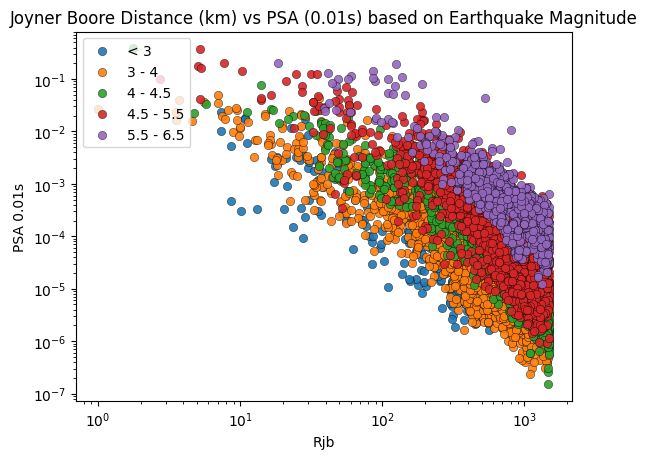

In [ ]:
def group_name(mw):
    if mw < 3:
        return 'A'
    elif 3 <= mw < 4:
        return 'B'
    elif 4 <= mw < 4.5:
        return 'C'
    elif 4.5 <= mw < 5.5:
        return 'D'
    elif 5.5 <= mw < 6.5:
        return 'E'
    elif 6.5 <= mw:
        return 'F'

df['MAG Class'] = df['Earthquake Magnitude'].apply(group_name)

for group in sorted(df['MAG Class'].unique()):
    group_data = df[df['MAG Class'] == group]
    plt.scatter(group_data['Joyner-Boore Dist. (km)'], group_data['T0.01s'], label = group, alpha = 0.9,edgecolor = 'black',linewidth = 0.3)


plt.xlabel("Rjb")
plt.ylabel("PSA 0.01s")
custom_labels = ['< 3', '3 - 4', '4 - 4.5', '4.5 - 5.5', '5.5 - 6.5', '> 6.5']
plt.legend(custom_labels,loc = 'upper left')
# plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.title('Joyner Boore Distance (km) vs PSA (0.01s) based on Earthquake Magnitude')

plt.show()

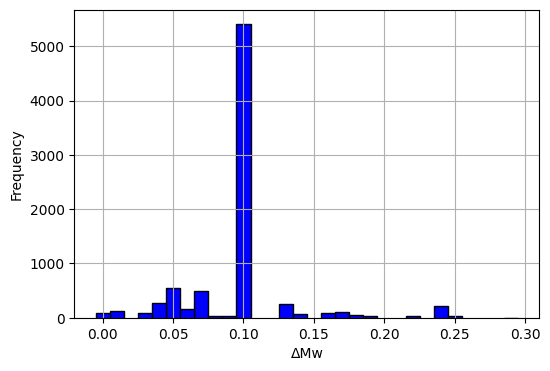

In [ ]:
freq = df['Magnitude Uncertainty: Statistical'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(freq.index, freq.values, color='blue', edgecolor = 'black', width = 0.01)
plt.xlabel("ΔMw")
plt.ylabel("Frequency")

plt.grid(True)
plt.show()

In [ ]:
 # freq = df[''].value_counts()
# plt.figure(figsize=(6, 4))
# plt.bar(freq.index, freq.values, color='blue', edgecolor = 'black', width = 0.8)
# plt.xlabel("")
# plt.ylabel("Frequency")

# plt.grid(True)
# plt.show()

In [ ]:
# col_name = ["ΔMw", "log10PSA_0.01S", "log10PSA_0.02s", "log10PSA_0.03s", "log10PSA_0.04s", "log10PSA_0.05s", "log10PSA_0.06s", "log10PSA_0.07s", "log10PSA_0.08s", "log10PSA_0.09s", "log10PSA_0.1s", "log10PSA_0.2s", "log10PSA_0.3s", "log10PSA_0.4s", "log10PSA_0.5s", "log10PSA_0.6s", "log10PSA_0.7s", "log10PSA_0.8s", "log10PSA_0.9s", "log10PSA_1.0s", "log10PSA_2.0s", "log10PSA_3.0s", "log10PSA_4.0s", "log10PSA_5.0s"]
norm = ["Magnitude Uncertainty: Statistical"]
log_10 = ["T0.01s", "T0.02s", "T0.03s", "T0.04s", "T0.05s", "T0.06s", "T0.07s", "T0.08s", "T0.09s", "T0.1s", "T0.2s", "T0.3s", "T0.4s", "T0.5s", "T0.6s", "T0.7s", "T0.8s", "T0.9s", "T1s", "T2s", "T3s", "T4s", "T5s"]

#for normal
stat = df[norm].describe()

stat_add = pd.DataFrame()
stat_add['median'] = df[norm].median()
stat_add['std_deviation'] = df[norm].std()
stat_add['skewness'] = df[norm].skew()
stat_add['kurtosis'] = df[norm].kurtosis()

stat = pd.concat([stat, stat_add.T])


# for log10
log10_val = np.log10(df[log_10])
stat_log = log10_val.describe()

logstat_add = pd.DataFrame()
logstat_add['median'] = stat_log.median()
logstat_add['std_deviation'] = stat_log.std()
logstat_add['skewness'] = stat_log.skew()
logstat_add['kurtosis'] = stat_log.kurtosis()

stat_log = pd.concat([stat_log, logstat_add.T])

# adding both statistics
stat = pd.concat([stat.T, stat_log.T])

print(stat)

                                     count      mean       std       min  \
Magnitude Uncertainty: Statistical  8083.0  0.096858  0.038818  0.000000   
T0.01s                              8083.0 -4.245963  0.966276 -6.824462   
T0.02s                              8083.0 -4.241769  0.969952 -6.821604   
T0.03s                              8083.0 -4.221959  0.987632 -6.828950   
T0.04s                              8083.0 -4.216226  0.991109 -6.827850   
T0.05s                              8083.0 -4.202235  1.001350 -6.824381   
T0.06s                              8083.0 -4.162831  1.005480 -6.820147   
T0.07s                              8083.0 -4.123141  1.009280 -6.812031   
T0.08s                              8083.0 -4.093899  1.013452 -6.796654   
T0.09s                              8083.0 -4.075306  1.013968 -6.797060   
T0.1s                               8083.0 -4.059338  1.012632 -6.800338   
T0.2s                               8083.0 -3.971680  0.970738 -6.615272   
T0.3s       

In [ ]:
c = pd.DataFrame()
c['Mw'] = df['Earthquake Magnitude']
c['Vs30'] = df['Preferred VS30 (m/sec)']
c['Rjb'] = df['Joyner-Boore Dist. (km)']
c['log Rjb'] = np.log10(df['Joyner-Boore Dist. (km)'])
# c['log PGA'] = np.log10(df['PGA-H RotDnn (g)'])
t = [0.01 , 0.02 , 0.03 , 0.04 , 0.05,0.06 ,0.07 , 0.08 ,0.09,0.1,0.2 , 0.3 , 0.4, 0.5 ,0.6, 0.7,0.8,0.9,1,2,3,4,5]
for i in t:
    c[f"PSA {i}s"] = (df[f"T{i}s"])

statistics = {
    'column': [],
    'min': [],
    'max': [],
    'mean': [],
    'median': [],
    'std': [],
    'kurtosis': [],
    'skewness': []
}

for column in c.columns:
#     if column != 'log PGA':  # Skip 'log PGA' column
        statistics['column'].append(column)
        statistics['min'].append(np.min(c[column]))
        statistics['max'].append(np.max(c[column]))
        statistics['mean'].append(np.mean(c[column]))
        statistics['median'].append(np.median(c[column]))
        statistics['std'].append(np.std(c[column]))
        statistics['kurtosis'].append(c[column].kurtosis())
        statistics['skewness'].append(c[column].skew())

statistics_df = pd.DataFrame(statistics)

print(statistics_df)

       column           min          max        mean      median         std  \
0          Mw  2.180000e+00     5.850000    4.255093    4.030000    0.705708   
1        Vs30  1.440000e+02  2000.000000  701.149783  512.300000  500.638806   
2         Rjb  1.010000e+00  1499.530000  705.868914  675.450000  393.928294   
3     log Rjb  4.321374e-03     3.175955    2.739553    2.829593    0.377699   
4   PSA 0.01s  1.498090e-07     0.386406    0.001212    0.000044    0.009884   
5   PSA 0.02s  1.507980e-07     0.743908    0.001369    0.000044    0.013036   
6   PSA 0.03s  1.482690e-07     0.790183    0.001699    0.000046    0.015123   
7   PSA 0.04s  1.486450e-07     1.809280    0.002026    0.000047    0.024976   
8   PSA 0.05s  1.498370e-07     0.799628    0.002058    0.000048    0.018611   
9   PSA 0.06s  1.513050e-07     1.248230    0.002233    0.000053    0.021109   
10  PSA 0.07s  1.541590e-07     1.602970    0.002369    0.000059    0.024054   
11  PSA 0.08s  1.597150e-07     1.049790

In [ ]:
# x = range(0, 10)
# plt.plot(x, df['PGV-H RotDnn (cm/s)'])

# plt.show()

Response Spectra

In [ ]:
row_index = 2

cell_indices = range(88, 517)

x_values = df.iloc[0, cell_indices]
x = x_values[:, 0]
float_time = []

# for text in x_values:
#     numeric_text = text[1:-1]
#     float_time = np.append(float_time, float(numeric_text))

# selected_cells = df.iloc[row_index, cell_indices]

# plt.plot(float_time, selected_cells)
# plt.show()
print(x)

KeyError: 'key of type tuple not found and not a MultiIndex'

In [ ]:
# row_index = 3
# row = df.iloc[row_index]

# cell_indices = range(89, 518)
# selected_cells = row[cell_indices]

# plt.plot(selected_cells)
# plt.show()

WEEK 2

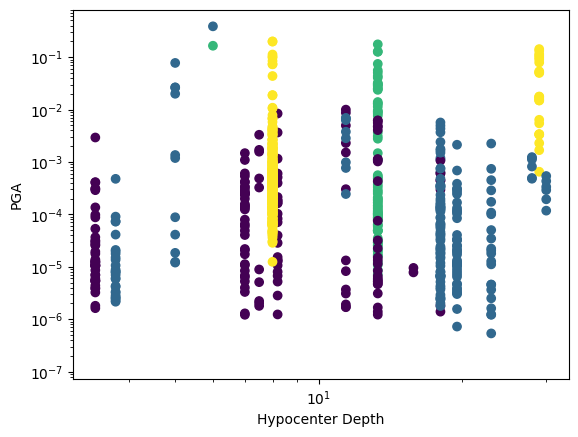

In [ ]:
color_bins = [3, 3.5, 4.5, 5.5, 6]
uniq_mag = df['Earthquake Magnitude']
df['color_bin'] = pd.cut(uniq_mag, bins = color_bins, labels = False)
plt.scatter(df['Hypocenter Depth (km)'], df['PGA-H RotDnn (g)'], c = df['color_bin'], cmap='viridis')
plt.xlabel("Hypocenter Depth")
plt.ylabel("PGA")
plt.xscale('log')
plt.yscale('log')

plt.show()

Regression Analysis

const                           -2.459212
Earthquake Magnitude             0.841893
Joyner-Boore Dist. (km)         -0.000483
log Rjb                         -1.803820
Mw/Rjb                          -0.897991
Mechanism Based on Rake Angle   -0.000050
Preferred VS30 (m/sec)          -0.000107
dtype: float64
R-squared: 0.8346799438623664


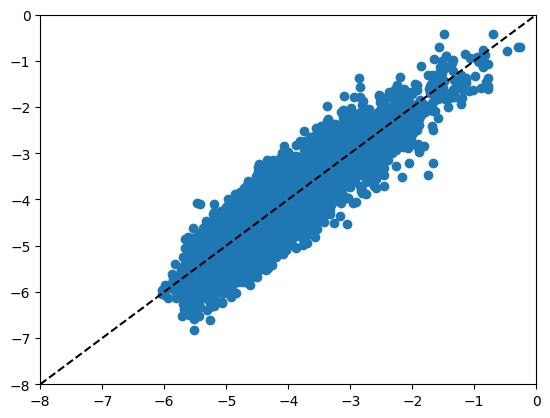

In [ ]:
#For PGA
df['Mw/Rjb'] = np.array(df['Earthquake Magnitude']) / np.array(df['Joyner-Boore Dist. (km)'])
df['log Rjb'] = np.log10(df['Joyner-Boore Dist. (km)'])
df['log PGA'] = np.log10(df['PGA-H RotDnn (g)'])
X = df[['Earthquake Magnitude', 'Joyner-Boore Dist. (km)', 'log Rjb', 'Mw/Rjb', 'Mechanism Based on Rake Angle', 'Preferred VS30 (m/sec)']]
y = df['log PGA']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
coefficients = model.params
r_squared = model.rsquared

print(coefficients)
print("R-squared:", r_squared)

ypred = model.predict(X)
plt.scatter(ypred,y)
x = np.linspace(-8, 5, 1000)
plt.plot(x, x, color = 'black', linestyle = '--')
plt.xlim(-8, 0)
plt.ylim(-8, 0)

plt.show()

const                           -2.273326
Earthquake Magnitude             0.993796
Joyner-Boore Dist. (km)         -0.000213
log Rjb                         -1.484263
Mw/Rjb                          -0.620008
Mechanism Based on Rake Angle    0.000047
Preferred VS30 (m/sec)          -0.000202
dtype: float64
R-squared: 0.8552946089182937


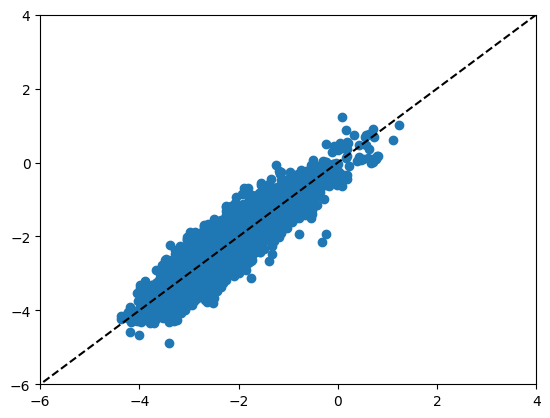

In [ ]:
#For PGV
df['Mw/Rjb'] = np.array(df['Earthquake Magnitude']) / np.array(df['Joyner-Boore Dist. (km)'])
df['log Rjb'] = np.log10(df['Joyner-Boore Dist. (km)'])
df['log PGV'] = np.log10(df['PGV-H RotDnn (cm/s)'])
X = df[['Earthquake Magnitude', 'Joyner-Boore Dist. (km)', 'log Rjb', 'Mw/Rjb', 'Mechanism Based on Rake Angle', 'Preferred VS30 (m/sec)']]
y = df['log PGV']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
coefficients = model.params
r_squared = model.rsquared

print(coefficients)
print("R-squared:", r_squared)

ypred = model.predict(X)
plt.scatter(ypred,y)
x = np.linspace(-7.5, 5, 1000)
plt.plot(x, x, color = 'black', linestyle = '--')
plt.xlim(-6, 4)
plt.ylim(-6, 4)

plt.show()

In [ ]:
#For PSA(T0.01s)
df['Mw/Rjb'] = np.array(df['Earthquake Magnitude']) / np.array(df['Joyner-Boore Dist. (km)'])
df['log Rjb'] = np.log10(df['Joyner-Boore Dist. (km)'])
df['log PSA 0.01s'] = np.log10(df['T0.01s'])
X = df[['Earthquake Magnitude', 'Joyner-Boore Dist. (km)', 'log Rjb', 'Mw/Rjb', 'Mechanism Based on Rake Angle', 'Preferred VS30 (m/sec)']]
y = df['log PSA 0.01s']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
coefficients = model.params
r_squared = model.rsquared

print(coefficients)
print("R-squared:", r_squared)

const                           -2.441393
Earthquake Magnitude             0.843498
Joyner-Boore Dist. (km)         -0.000480
log Rjb                         -1.812052
Mw/Rjb                          -0.839445
Mechanism Based on Rake Angle   -0.000040
Preferred VS30 (m/sec)          -0.000108
dtype: float64
R-squared: 0.8352609634760303


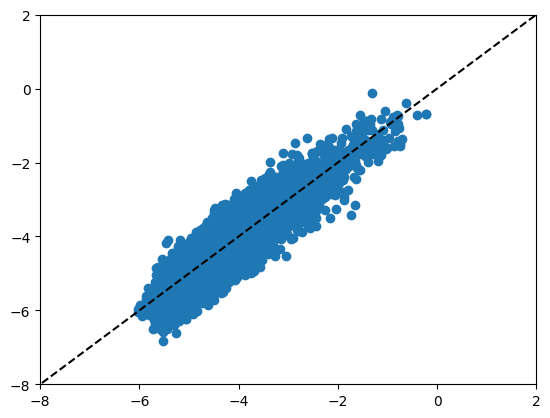

In [ ]:
#For PSA(T0.02s)
df['Mw/Rjb'] = np.array(df['Earthquake Magnitude']) / np.array(df['Joyner-Boore Dist. (km)'])
df['log Rjb'] = np.log10(df['Joyner-Boore Dist. (km)'])
df['log PSA 0.02s'] = np.log10(df['T0.02s'])
X = df[['Earthquake Magnitude', 'Joyner-Boore Dist. (km)', 'log Rjb', 'Mw/Rjb', 'Mechanism Based on Rake Angle', 'Preferred VS30 (m/sec)']]
y = df['log PSA 0.02s']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
coefficients = model.params
r_squared = model.rsquared

print(coefficients)
print("R-squared:", r_squared)

ypred = model.predict(X)
plt.scatter(ypred,y)
x = np.linspace(-8.5, 5, 1000)
plt.plot(x, x, color = 'black', linestyle = '--')
plt.xlim(-8, 2)
plt.ylim(-8, 2)

plt.show()

const                           -2.024503
Earthquake Magnitude             0.827681
Joyner-Boore Dist. (km)         -0.000440
log Rjb                         -1.951985
Mw/Rjb                          -0.934555
Mechanism Based on Rake Angle   -0.000113
Preferred VS30 (m/sec)          -0.000047
dtype: float64
R-squared: 0.8256830282359788


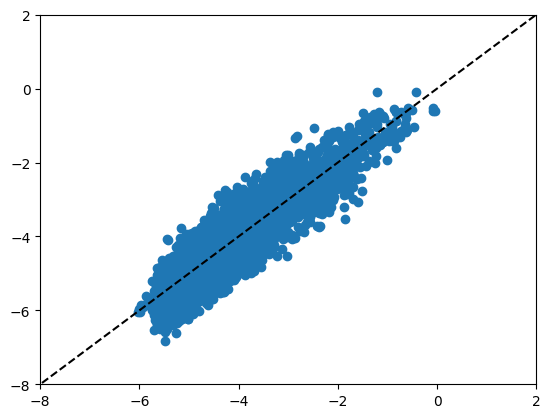

In [ ]:
#For PSA(T0.05s)
df['Mw/Rjb'] = np.array(df['Earthquake Magnitude']) / np.array(df['Joyner-Boore Dist. (km)'])
df['log Rjb'] = np.log10(df['Joyner-Boore Dist. (km)'])
df['log PSA 0.05s'] = np.log10(df['T0.05s'])
X = df[['Earthquake Magnitude', 'Joyner-Boore Dist. (km)', 'log Rjb', 'Mw/Rjb', 'Mechanism Based on Rake Angle', 'Preferred VS30 (m/sec)']]
y = df['log PSA 0.05s']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
coefficients = model.params
r_squared = model.rsquared

print(coefficients)
print("R-squared:", r_squared)

ypred = model.predict(X)
plt.scatter(ypred,y)
x = np.linspace(-8.5, 5, 1000)
plt.plot(x, x, color = 'black', linestyle = '--')
plt.xlim(-8, 2)
plt.ylim(-8, 2)

plt.show()

const                           -2.085905
Earthquake Magnitude             0.796755
Joyner-Boore Dist. (km)         -0.000702
log Rjb                         -1.753641
Mw/Rjb                          -0.947465
Mechanism Based on Rake Angle    0.000024
Preferred VS30 (m/sec)          -0.000069
dtype: float64
R-squared: 0.8206432692951918


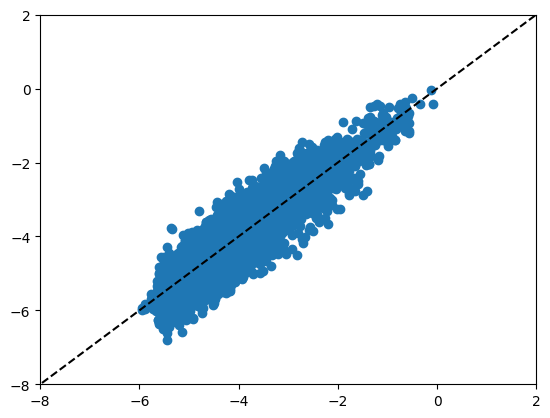

In [ ]:
#For PSA(T0.1s)
df['Mw/Rjb'] = np.array(df['Earthquake Magnitude']) / np.array(df['Joyner-Boore Dist. (km)'])
df['log Rjb'] = np.log10(df['Joyner-Boore Dist. (km)'])
df['log PSA 0.1s'] = np.log10(df['T0.1s'])
X = df[['Earthquake Magnitude', 'Joyner-Boore Dist. (km)', 'log Rjb', 'Mw/Rjb', 'Mechanism Based on Rake Angle', 'Preferred VS30 (m/sec)']]
y = df['log PSA 0.1s']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
coefficients = model.params
r_squared = model.rsquared

print(coefficients)
print("R-squared:", r_squared)

ypred = model.predict(X)
plt.scatter(ypred,y)
x = np.linspace(-8.5, 5, 1000)
plt.plot(x, x, color = 'black', linestyle = '--')
plt.xlim(-8, 2)
plt.ylim(-8, 2)

plt.show()

const                           -3.116613
Earthquake Magnitude             0.811935
Joyner-Boore Dist. (km)         -0.000993
log Rjb                         -1.271572
Mw/Rjb                          -0.589560
Mechanism Based on Rake Angle    0.000181
Preferred VS30 (m/sec)          -0.000151
dtype: float64
R-squared: 0.8186505513228007


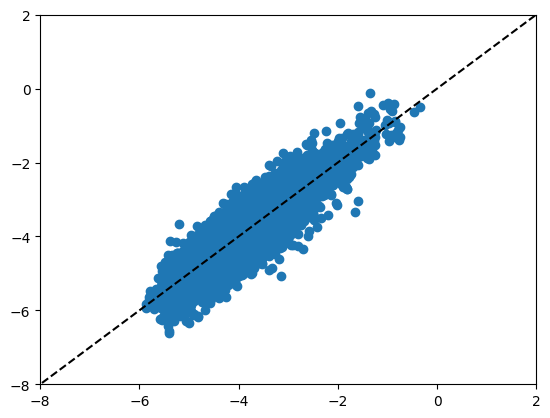

In [ ]:
#For PSA(T0.2s)
df['Mw/Rjb'] = np.array(df['Earthquake Magnitude']) / np.array(df['Joyner-Boore Dist. (km)'])
df['log Rjb'] = np.log10(df['Joyner-Boore Dist. (km)'])
df['log PSA 0.2s'] = np.log10(df['T0.2s'])
X = df[['Earthquake Magnitude', 'Joyner-Boore Dist. (km)', 'log Rjb', 'Mw/Rjb', 'Mechanism Based on Rake Angle', 'Preferred VS30 (m/sec)']]
y = df['log PSA 0.2s']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
coefficients = model.params
r_squared = model.rsquared

print(coefficients)
print("R-squared:", r_squared)

ypred = model.predict(X)
plt.scatter(ypred,y)
x = np.linspace(-8.5, 5, 1000)
plt.plot(x, x, color = 'black', linestyle = '--')
plt.xlim(-8, 2)
plt.ylim(-8, 2)

plt.show()

const                           -4.998779
Earthquake Magnitude             0.919299
Joyner-Boore Dist. (km)         -0.000720
log Rjb                         -0.832529
Mw/Rjb                          -0.095354
Mechanism Based on Rake Angle    0.000307
Preferred VS30 (m/sec)          -0.000226
dtype: float64
R-squared: 0.8060172580719507


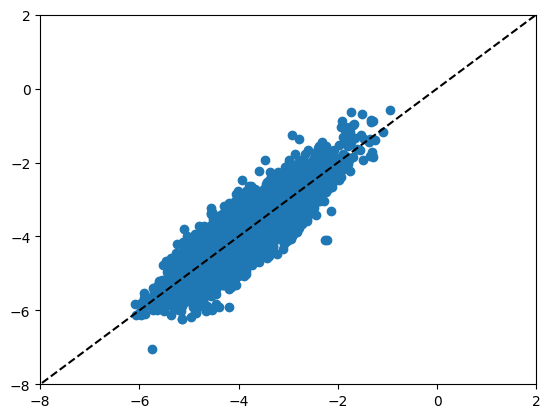

In [ ]:
#For PSA(T0.5s)
df['Mw/Rjb'] = np.array(df['Earthquake Magnitude']) / np.array(df['Joyner-Boore Dist. (km)'])
df['log Rjb'] = np.log10(df['Joyner-Boore Dist. (km)'])
df['log PSA 0.5s'] = np.log10(df['T0.5s'])
X = df[['Earthquake Magnitude', 'Joyner-Boore Dist. (km)', 'log Rjb', 'Mw/Rjb', 'Mechanism Based on Rake Angle', 'Preferred VS30 (m/sec)']]
y = df['log PSA 0.5s']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
coefficients = model.params
r_squared = model.rsquared

print(coefficients)
print("R-squared:", r_squared)

ypred = model.predict(X)
plt.scatter(ypred,y)
x = np.linspace(-8.5, 5, 1000)
plt.plot(x, x, color = 'black', linestyle = '--')
plt.xlim(-8, 2)
plt.ylim(-8, 2)

plt.show()

const                           -6.080339
Earthquake Magnitude             1.034317
Joyner-Boore Dist. (km)         -0.000323
log Rjb                         -0.845916
Mw/Rjb                          -0.055920
Mechanism Based on Rake Angle    0.000309
Preferred VS30 (m/sec)          -0.000253
dtype: float64
R-squared: 0.8308061768660985


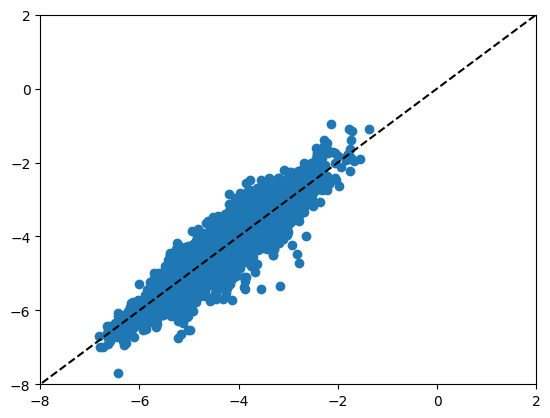

In [ ]:
#For PSA(T1s)
df['Mw/Rjb'] = np.array(df['Earthquake Magnitude']) / np.array(df['Joyner-Boore Dist. (km)'])
df['log Rjb'] = np.log10(df['Joyner-Boore Dist. (km)'])
df['log PSA 1s'] = np.log10(df['T1s'])
X = df[['Earthquake Magnitude', 'Joyner-Boore Dist. (km)', 'log Rjb', 'Mw/Rjb', 'Mechanism Based on Rake Angle', 'Preferred VS30 (m/sec)']]
y = df['log PSA 1s']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
coefficients = model.params
r_squared = model.rsquared

print(coefficients)
print("R-squared:", r_squared)

ypred = model.predict(X)
plt.scatter(ypred,y)
x = np.linspace(-8.5, 5, 1000)
plt.plot(x, x, color = 'black', linestyle = '--')
plt.xlim(-8, 2)
plt.ylim(-8, 2)

plt.show()

const                           -7.001306
Earthquake Magnitude             1.123581
Joyner-Boore Dist. (km)         -0.000110
log Rjb                         -0.909382
Mw/Rjb                          -0.113252
Mechanism Based on Rake Angle    0.000245
Preferred VS30 (m/sec)          -0.000251
dtype: float64
R-squared: 0.8528283325255334


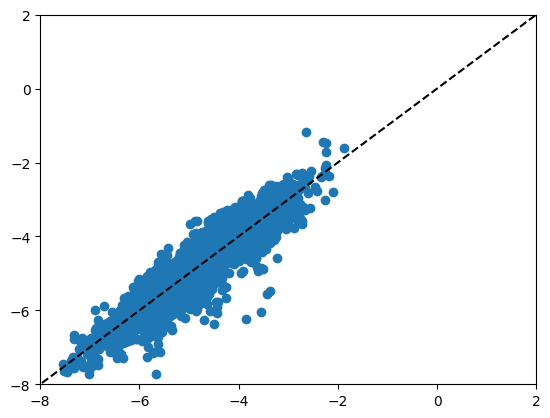

In [ ]:
#For PSA(T2s)
df['Mw/Rjb'] = np.array(df['Earthquake Magnitude']) / np.array(df['Joyner-Boore Dist. (km)'])
df['log Rjb'] = np.log10(df['Joyner-Boore Dist. (km)'])
df['log PSA 2s'] = np.log10(df['T2s'])
X = df[['Earthquake Magnitude', 'Joyner-Boore Dist. (km)', 'log Rjb', 'Mw/Rjb', 'Mechanism Based on Rake Angle', 'Preferred VS30 (m/sec)']]
y = df['log PSA 2s']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
coefficients = model.params
r_squared = model.rsquared

print(coefficients)
print("R-squared:", r_squared)

ypred = model.predict(X)
plt.scatter(ypred,y)
x = np.linspace(-8.5, 5, 1000)
plt.plot(x, x, color = 'black', linestyle = '--')
plt.xlim(-8, 2)
plt.ylim(-8, 2)

plt.show()

const                           -7.656303
Earthquake Magnitude             1.187200
Joyner-Boore Dist. (km)         -0.000098
log Rjb                         -0.908837
Mw/Rjb                          -0.131499
Mechanism Based on Rake Angle    0.000116
Preferred VS30 (m/sec)          -0.000229
dtype: float64
R-squared: 0.8713180461331456


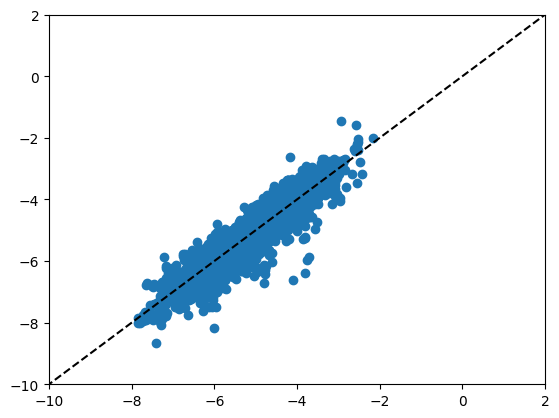

In [ ]:
#For PSA(T3s)
df['Mw/Rjb'] = np.array(df['Earthquake Magnitude']) / np.array(df['Joyner-Boore Dist. (km)'])
df['log Rjb'] = np.log10(df['Joyner-Boore Dist. (km)'])
df['log PSA 3s'] = np.log10(df['T3s'])
X = df[['Earthquake Magnitude', 'Joyner-Boore Dist. (km)', 'log Rjb', 'Mw/Rjb', 'Mechanism Based on Rake Angle', 'Preferred VS30 (m/sec)']]
y = df['log PSA 3s']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
coefficients = model.params
r_squared = model.rsquared

print(coefficients)
print("R-squared:", r_squared)

ypred = model.predict(X)
plt.scatter(ypred,y)
x = np.linspace(-10.5, 5, 1000)
plt.plot(x, x, color = 'black', linestyle = '--')
plt.xlim(-10, 2)
plt.ylim(-10, 2)

plt.show()

const                           -7.999724
Earthquake Magnitude             1.192584
Joyner-Boore Dist. (km)         -0.000058
log Rjb                         -0.877654
Mw/Rjb                          -0.112269
Mechanism Based on Rake Angle    0.000076
Preferred VS30 (m/sec)          -0.000223
dtype: float64
R-squared: 0.8501010836453331


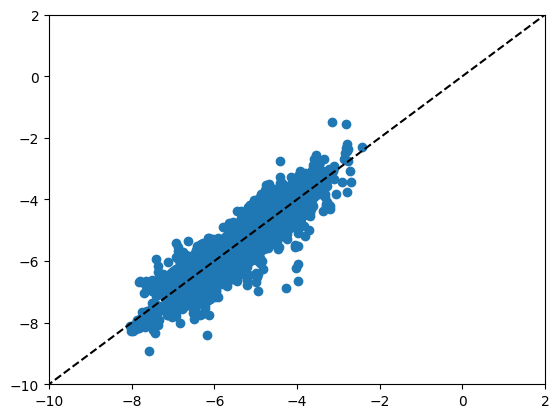

In [ ]:
#For PSA(T4s)
df['Mw/Rjb'] = np.array(df['Earthquake Magnitude']) / np.array(df['Joyner-Boore Dist. (km)'])
df['log Rjb'] = np.log10(df['Joyner-Boore Dist. (km)'])
df['log PSA 4s'] = np.log10(df['T4s'])
X = df[['Earthquake Magnitude', 'Joyner-Boore Dist. (km)', 'log Rjb', 'Mw/Rjb', 'Mechanism Based on Rake Angle', 'Preferred VS30 (m/sec)']]
y = df['log PSA 4s']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
coefficients = model.params
r_squared = model.rsquared

print(coefficients)
print("R-squared:", r_squared)


ypred = model.predict(X)
plt.scatter(ypred,y)
x = np.linspace(-10.5, 5, 1000)
plt.plot(x, x, color = 'black', linestyle = '--')
plt.xlim(-10, 2)
plt.ylim(-10, 2)

plt.show()

GROUND MOTION PARAMETERS

# **NEURAL** NETWORK

In [ ]:
!pip install joblib

In [ ]:
import joblib
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import sklearn.model_selection as sk

In [ ]:
df['Mw/Rjb'] = np.array(df['Earthquake Magnitude']) / np.array(df['Joyner-Boore Dist. (km)'])
df['log Rjb'] = np.log10(df['Joyner-Boore Dist. (km)'])

Y = pd.DataFrame()
Y['log PGA'] = np.log10(df['PGA-H RotDnn (g)'])
Y['log PGV'] = np.log10(df['PGV-H RotDnn (cm/s)'])
t = [0.01 , 0.02 , 0.03 , 0.04 , 0.05,0.06 ,0.07 , 0.08 ,0.09,0.1,0.2 , 0.3 , 0.4, 0.5 ,0.6, 0.7,0.8,0.9,1,2,3,4,5]
for i in t:
    Y[f"log PSA {i}s"] = np.log10(df[f"T{i}s"])

X = df[['Earthquake Magnitude', 'Joyner-Boore Dist. (km)', 'log Rjb', 'Mechanism Based on Rake Angle', 'Preferred VS30 (m/sec)']]
# X = df[['Earthquake Magnitude', 'log Rjb', 'Preferred VS30 (m/sec)']]

x_train, x_test, y_train, y_test = sk.train_test_split(X, Y, test_size = 0.15, random_state = 42)
x_test, x_val, y_test, y_val = sk.train_test_split(x_test, y_test, test_size = 0.5, random_state = 42)


In [ ]:

model_ann = tf.keras.Sequential([
    tf.keras.layers.Dense(8, kernel_initializer='normal', activation='relu'),
    # tf.keras.layers.Dense(16, kernel_initializer='normal',activation='relu'),
    # tf.keras.layers.Dense(20, kernel_initializer='normal',activation='relu'),
#     tf.keras.layers.Dense(30, kernel_initializer='normal',activation='relu'),
#     tf.keras.layers.Dense(18, kernel_initializer='normal',activation='relu'),
#     tf.keras.layers.Dense(19, kernel_initializer='normal',activation='relu'),
    tf.keras.layers.Dense(len(t)+2, kernel_initializer='normal',activation='linear')
])

mse = tf.keras.losses.MeanSquaredError()
model_ann.compile(loss = mse, optimizer = 'adam', metrics = ['R2Score'])
model_ann.fit(x_train, y_train, epochs = 1000, batch_size = 32, validation_data=(x_val, y_val))

model_ann.summary()

# joblib.dump(model_ann, '/content/drive/My Drive/SEISMIC MODELS/model_ann.joblib')

model_ann.save('/content/drive/My Drive/SEISMIC MODELS/model_ann.h5')

Epoch 1/1000
215/215 [==============================] - 7s 12ms/step - loss: 4.0108 - r2_score: -3.6434 - val_loss: 2.0015 - val_r2_score: -1.6478
Epoch 2/1000
215/215 [==============================] - 2s 7ms/step - loss: 1.8345 - r2_score: -1.1332 - val_loss: 1.7702 - val_r2_score: -1.3418
Epoch 3/1000
215/215 [==============================] - 1s 5ms/step - loss: 1.5678 - r2_score: -0.8249 - val_loss: 1.4827 - val_r2_score: -0.9646
Epoch 4/1000
215/215 [==============================] - 1s 5ms/step - loss: 1.3070 - r2_score: -0.5212 - val_loss: 1.1980 - val_r2_score: -0.5858
Epoch 5/1000
215/215 [==============================] - 2s 9ms/step - loss: 1.0518 - r2_score: -0.2236 - val_loss: 0.9944 - val_r2_score: -0.3165
Epoch 6/1000
215/215 [==============================] - 2s 10ms/step - loss: 0.9167 - r2_score: -0.0641 - val_loss: 0.8341 - val_r2_score: -0.1045
Epoch 7/1000
215/215 [==============================] - 3s 16ms/step - loss: 0.8656 - r2_score: -0.0033 - val_loss: 0.8007

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model_ann = tf.keras.models.load_model('/content/drive/My Drive/SEISMIC MODELS/model_ann.h5')

In [ ]:
y_pred_a = model_ann.predict(x_test)
y_pred_c = [f"log PSA {i}s" for i in t]
y_pred_c.append("log PGA")
y_pred_c.append("log PGV")
y_pred = pd.DataFrame(y_pred_a, columns=y_pred_c)

19/19 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import r2_score

# Calculate R^2 score for the first dataframe
r2_score_1 = r2_score(y_test,y_pred)


print("R^2 score for dataframe 1:", r2_score_1)


R^2 score for dataframe 1: 0.8106006149326734


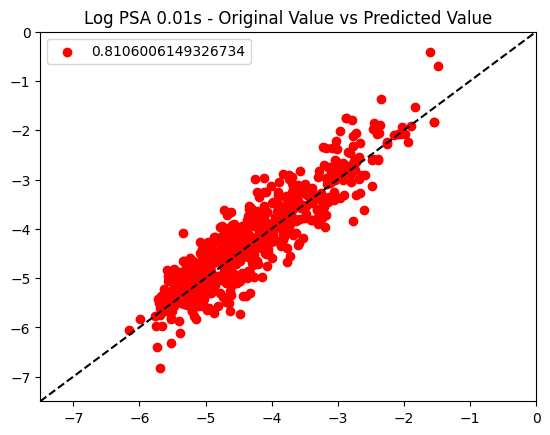

In [ ]:
plt.scatter(y_pred['log PSA 0.01s'], y_test['log PSA 0.01s'], color = 'r', label = r2_score_1)
x = np.linspace(-7.5, 0, 1000)
plt.plot(x, x, color = 'black', linestyle = '--')
plt.xlim(-7.5, 0)
plt.ylim(-7.5, 0)
plt.title('Log PSA 0.01s - Original Value vs Predicted Value')
plt.legend()
plt.show()

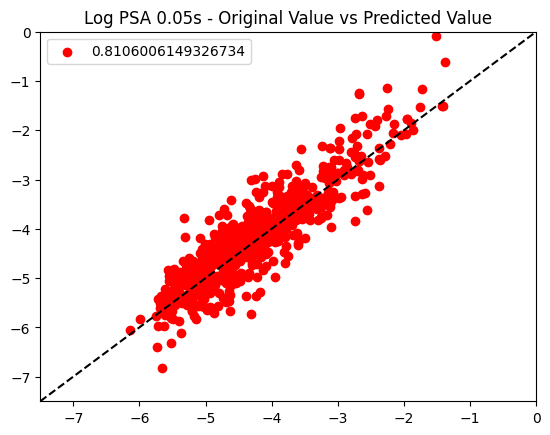

In [ ]:
plt.scatter(y_pred['log PSA 0.05s'], y_test['log PSA 0.05s'], color = 'r', label = r2_score_1)
x = np.linspace(-7.5, 0, 1000)
plt.plot(x, x, color = 'black', linestyle = '--')
plt.xlim(-7.5, 0)
plt.ylim(-7.5, 0)
plt.title('Log PSA 0.05s - Original Value vs Predicted Value')
plt.legend()
plt.show()

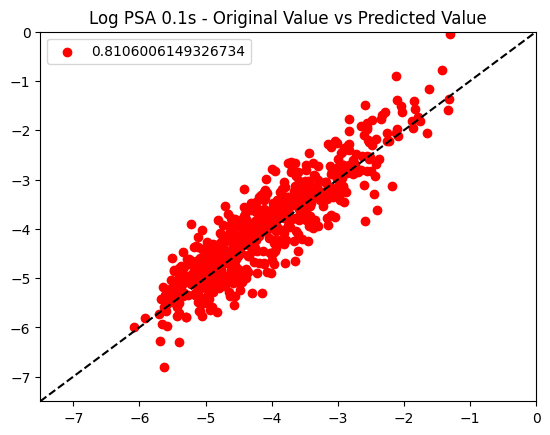

In [ ]:
plt.scatter(y_pred['log PSA 0.1s'], y_test['log PSA 0.1s'], color = 'r', label = r2_score_1)
x = np.linspace(-7.5, 0, 1000)
plt.plot(x, x, color = 'black', linestyle = '--')
plt.xlim(-7.5, 0)
plt.ylim(-7.5, 0)
plt.title('Log PSA 0.1s - Original Value vs Predicted Value')
plt.legend()
plt.show()

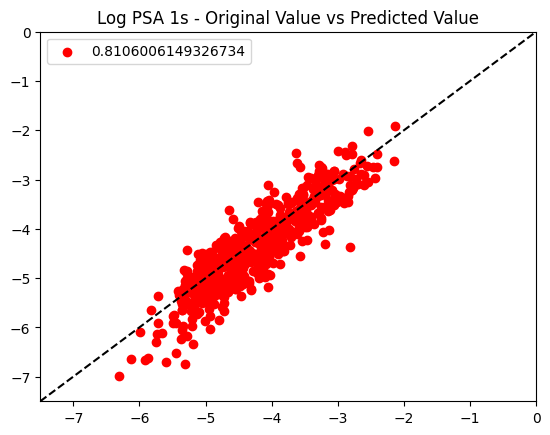

In [ ]:
plt.scatter(y_pred['log PSA 1s'], y_test['log PSA 1s'], color = 'r', label = r2_score_1)
x = np.linspace(-7.5, 0, 1000)
plt.plot(x, x, color = 'black', linestyle = '--')
plt.xlim(-7.5, 0)
plt.ylim(-7.5, 0)
plt.title('Log PSA 1s - Original Value vs Predicted Value')
plt.legend()
plt.show()

1/1 [==============================] - 0s 138ms/step


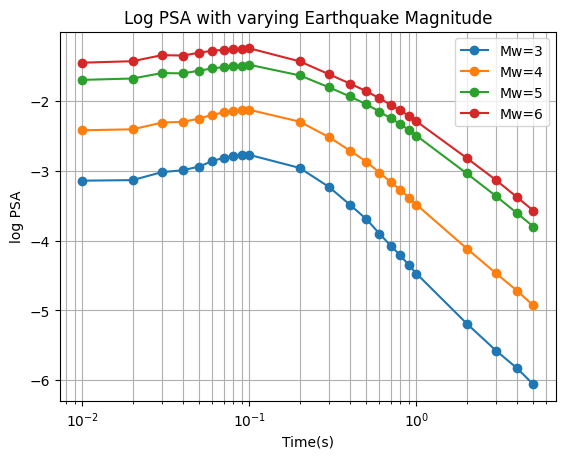

In [ ]:
l=[]

rjb = 50
focal = 2

r = [3,rjb,np.log10(rjb),focal,760]
r1 = [4,rjb,np.log10(rjb),focal, 760]
r2 = [5,rjb,np.log10(rjb),focal, 760]
r3 = [6,rjb,np.log10(rjb),focal, 760]

l.append(r)
l.append(r1)
l.append(r2)
l.append(r3)

l = np.asarray(l)

prs = model_ann.predict(l)

# prs = model1.predict(rp)

plt.plot(t, prs[0][2:], "-o", label='Mw=3')
plt.plot(t, prs[1][2:], "-o", label='Mw=4')
plt.plot(t, prs[2][2:], "-o", label='Mw=5')
plt.plot(t, prs[3][2:], "-o", label='Mw=6')

plt.xlabel('Time(s)')
plt.ylabel('log PSA')
plt.xscale('log')
plt.grid(True, which = 'both')
plt.title('Log PSA with varying Earthquake Magnitude')

plt.legend()

1/1 [==============================] - 0s 40ms/step


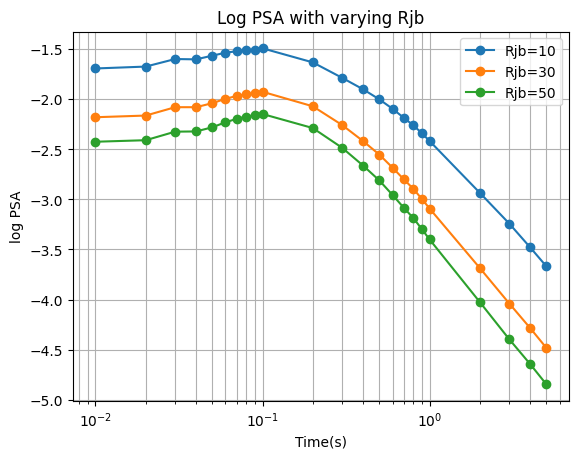

In [ ]:
l=[]

rjb = [10,30,50]
focal = 1

r1 = [4,rjb[0], np.log10(rjb[0]),focal, 760]
r2 = [4,rjb[1], np.log10(rjb[1]),focal, 760]
r3 = [4,rjb[2], np.log10(rjb[2]),focal, 760]

l.append(r1)
l.append(r2)
l.append(r3)

l = np.asarray(l)

prs = model_ann.predict(l)

# prs = model1.predict(rp)

plt.plot(t, prs[0][2:], "-o", label='Rjb=10')
plt.plot(t, prs[1][2:], "-o", label='Rjb=30')
plt.plot(t, prs[2][2:], "-o", label='Rjb=50')

plt.xlabel('Time(s)')
plt.ylabel('log PSA')
plt.xscale('log')
plt.grid(True, which = 'both')
plt.title('Log PSA with varying Rjb')

plt.legend()

1/1 [==============================] - 0s 40ms/step


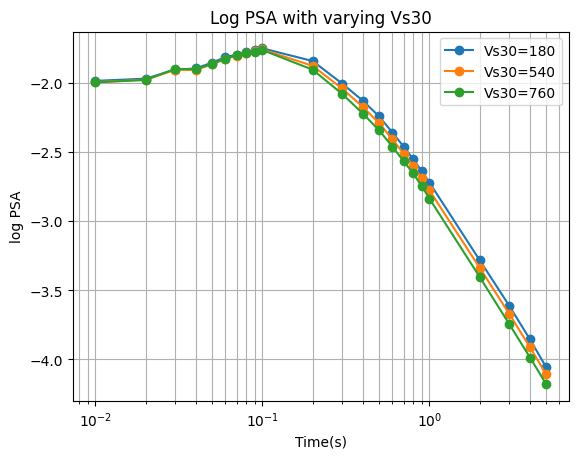

In [ ]:
l=[]

rjb = 20
focal = 1

r1 = [4,rjb, np.log10(rjb),focal, 100]
r2 = [4,rjb, np.log10(rjb),focal, 400]
r3 = [4,rjb, np.log10(rjb),focal, 760]

l.append(r1)
l.append(r2)
l.append(r3)

l = np.asarray(l)

prs = model_ann.predict(l)

# prs = model1.predict(rp)

plt.plot(t, prs[0][2:], "-o", label='Vs30=180')
plt.plot(t, prs[1][2:], "-o", label='Vs30=540')
plt.plot(t, prs[2][2:], "-o", label='Vs30=760')

plt.xlabel('Time(s)')
plt.ylabel('log PSA')
plt.grid(True, which = 'both')
plt.xscale('log')
plt.title('Log PSA with varying Vs30')

plt.legend()

19/19 [==============================] - 0s 4ms/step


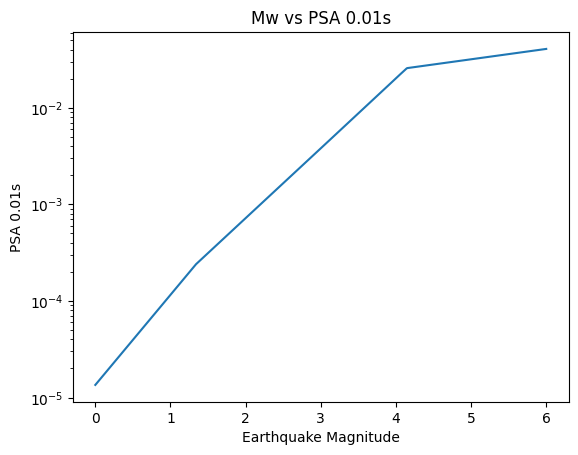

In [ ]:
l = []

rjb = 10
focal = 1

mw = np.arange(0,6.01,0.01)
for m in  mw:
  r = [m,rjb,np.log10(rjb),focal,760]
  l.append(r)


l = np.asarray(l)

prs = model_ann.predict(l)

# prs = model1.predict(rp)

plt.plot(l[:, 0], 10**prs[:, 2])
plt.xlabel('Earthquake Magnitude')
plt.yscale('log')
plt.ylabel('PSA 0.01s')
# plt.grid(True, which = 'both')
plt.title('Mw vs PSA 0.01s')
plt.show()

19/19 [==============================] - 0s 2ms/step


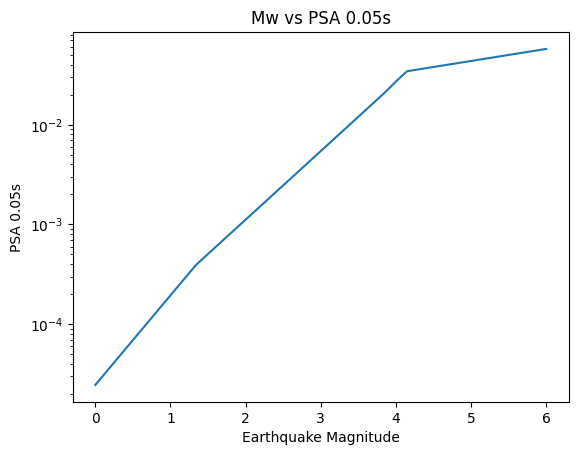

In [ ]:
l = []

rjb = 10
focal = 1

mw = np.arange(0,6.01,0.01)
for m in  mw:
  r = [m,rjb,np.log10(rjb),focal,760]
  l.append(r)


l = np.asarray(l)

prs = model_ann.predict(l)

# prs = model1.predict(rp)

plt.plot(l[:, 0], 10**prs[:, 6])
plt.xlabel('Earthquake Magnitude')
plt.yscale('log')
plt.ylabel('PSA 0.05s')
# plt.grid(True, which = 'both')
plt.title('Mw vs PSA 0.05s')
plt.show()

19/19 [==============================] - 0s 3ms/step


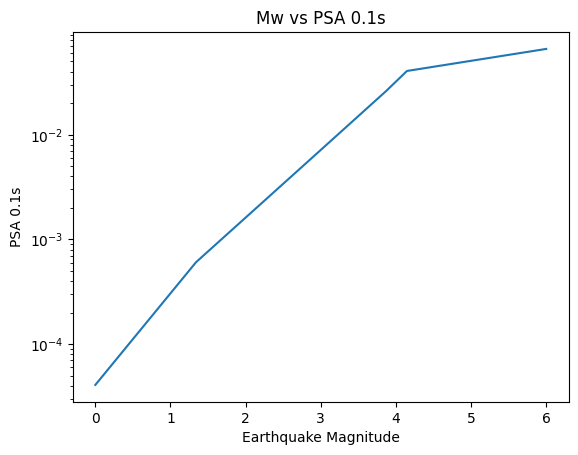

In [ ]:
l = []


rjb = 10
focal = 1

mw = np.arange(0,6.01,0.01)
for m in  mw:
  r = [m,rjb,np.log10(rjb),focal,760]
  l.append(r)


l = np.asarray(l)

prs = model_ann.predict(l)

# prs = model1.predict(rp)

plt.plot(l[:, 0], 10**prs[:, 11])
plt.xlabel('Earthquake Magnitude')
plt.yscale('log')
plt.ylabel('PSA 0.1s')
plt.title('Mw vs PSA 0.1s')
plt.show()

19/19 [==============================] - 0s 5ms/step


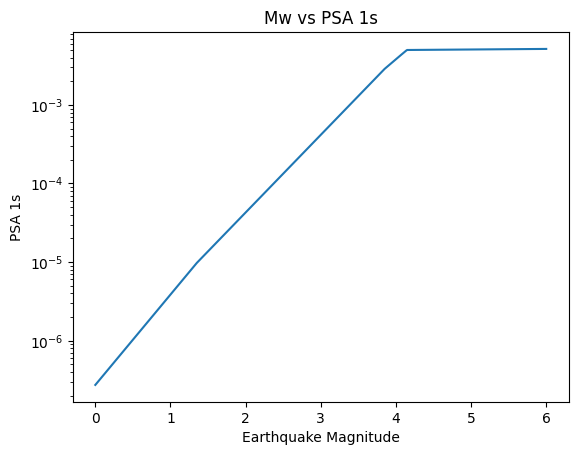

In [ ]:
l = []

rjb = 10
focal = 1

mw = np.arange(0,6.01,0.01)
for m in  mw:
  r = [m,rjb,np.log10(rjb),focal,760]
  l.append(r)


l = np.asarray(l)

prs = model_ann.predict(l)

# prs = model1.predict(rp)

plt.plot(l[:, 0], 10**prs[:, 20])
plt.xlabel('Earthquake Magnitude')
plt.ylabel('PSA 1s')
plt.yscale('log')
plt.title('Mw vs PSA 1s')
plt.show()

32/32 [==============================] - 0s 2ms/step


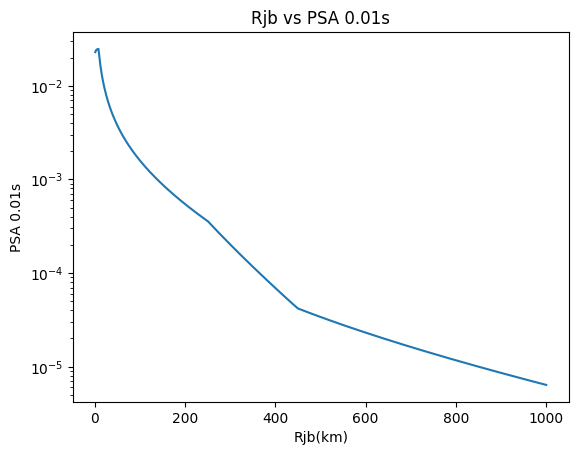

In [ ]:
l = []

rjb = np.arange(1,1001,1)
focal = 1

for d in rjb:
  r = [4,d,np.log10(d),focal,760]
  l.append(r)

l = np.asarray(l)

prs = model_ann.predict(l)

# prs = model1.predict(rp)

plt.plot(l[:, 1], 10**prs[:, 2])
plt.xlabel('Rjb(km)')
plt.ylabel('PSA 0.01s')
plt.yscale('log')
plt.title('Rjb vs PSA 0.01s')
plt.show()

32/32 [==============================] - 0s 1ms/step


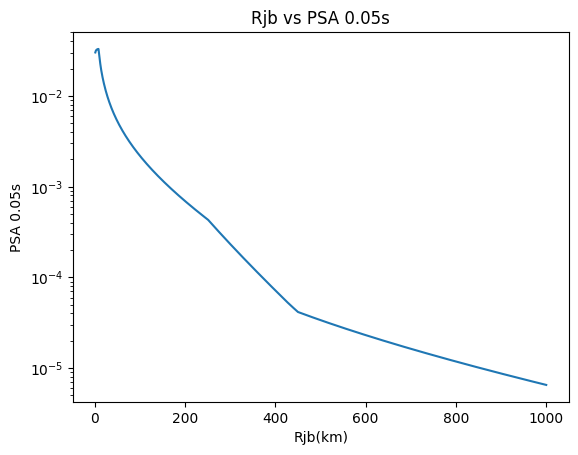

In [ ]:
l = []

rjb = np.arange(1,1001,1)
focal = 1

for d in rjb:
  r = [4,d,np.log10(d),focal,760]
  l.append(r)

l = np.asarray(l)

prs = model_ann.predict(l)

# prs = model1.predict(rp)

plt.plot(l[:, 1], 10**prs[:, 6])
plt.xlabel('Rjb(km)')
plt.ylabel('PSA 0.05s')
plt.yscale('log')
plt.title('Rjb vs PSA 0.05s')
plt.show()

32/32 [==============================] - 0s 1ms/step


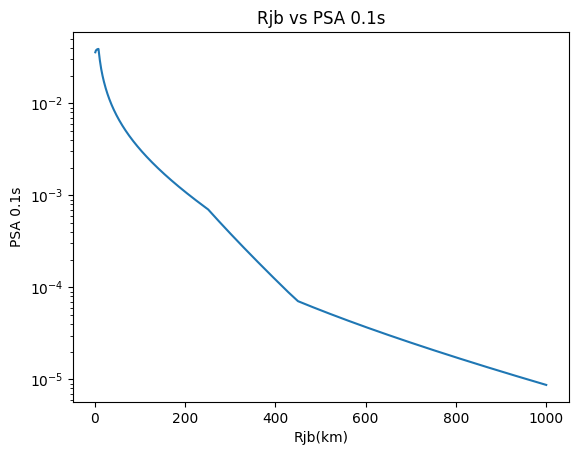

In [ ]:
l = []

rjb = np.arange(1,1001,1)
focal = 1

for d in rjb:
  r = [4,d,np.log10(d),focal,760]
  l.append(r)

l = np.asarray(l)

prs = model_ann.predict(l)

# prs = model1.predict(rp)

plt.plot(l[:, 1], 10**prs[:, 11])
plt.xlabel('Rjb(km)')
plt.ylabel('PSA 0.1s')
plt.yscale('log')
plt.title('Rjb vs PSA 0.1s')
plt.show()

32/32 [==============================] - 0s 2ms/step


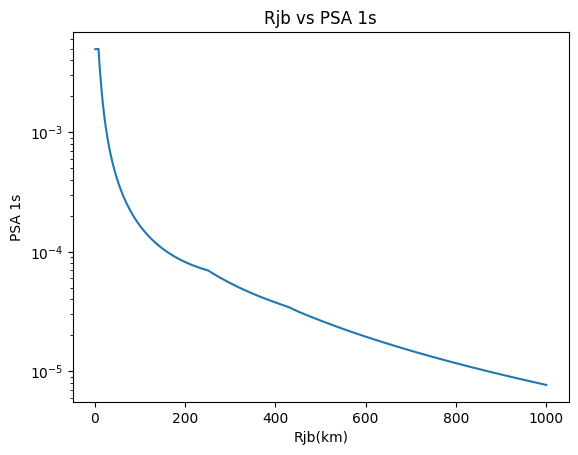

In [ ]:
l = []

rjb = np.arange(1,1001,1)
focal = 1

for d in rjb:
  r = [4,d,np.log10(d),focal,760]
  l.append(r)

l = np.asarray(l)

prs = model_ann.predict(l)

# prs = model1.predict(rp)

plt.plot(l[:, 1], 10**prs[:, 20])
plt.xlabel('Rjb(km)')
plt.ylabel('PSA 1s')
plt.yscale('log')
plt.title('Rjb vs PSA 1s')
plt.show()

19/19 [==============================] - 0s 1ms/step


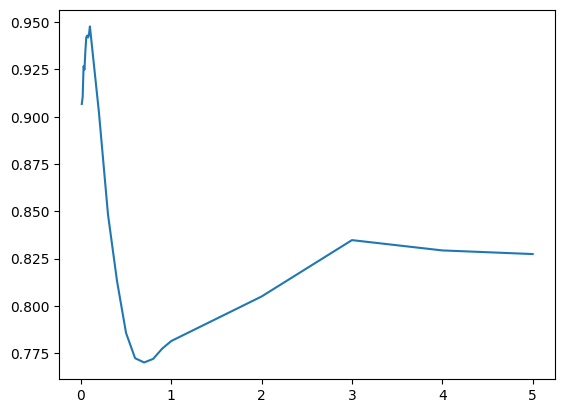

In [ ]:
import numpy as np
import tensorflow as tf


y_pred = model_ann.predict(x_test)

psa_predictions = y_pred[:, -(len(t)+2):]

psa_std_deviation = np.std(psa_predictions, axis=0)

# print("Standard Deviation of PSA predictions from 0.01s to 5s:", psa_std_deviation)
psa_std_deviation = psa_std_deviation[2:]


plt.plot(t,psa_std_deviation)

In [ ]:
# uniq_event = df['Earthquake Name'].unique()
# len(df['Earthquake Location'].unique())
residual = np.array(y_test) - np.array(y_pred)

In [ ]:
mask = df['USGS Potentially Induced Event (PIE) Flag'] == True
inter = df[mask]
intra = df[~mask]

In [ ]:
inter.reset_index(inplace = True)
intra.reset_index(inplace = True)

In [ ]:
inter['Mw/Rjb'] = np.array(inter['Earthquake Magnitude']) / np.array(inter['Joyner-Boore Dist. (km)'])
inter['log Rjb'] = np.log10(inter['Joyner-Boore Dist. (km)'])

yy = pd.DataFrame()
yy['log PGA'] = np.log10(inter['PGA-H RotDnn (g)'])
yy['log PGV'] = np.log10(inter['PGV-H RotDnn (cm/s)'])
t = [0.01 , 0.02 , 0.03 , 0.04 , 0.05,0.06 ,0.07 , 0.08 ,0.09,0.1,0.2 , 0.3 , 0.4, 0.5 ,0.6, 0.7,0.8,0.9,1,2,3,4,5]
for i in t:
    yy[f"log PSA {i}s"] = np.log10(inter[f"T{i}s"])

XX = inter[['Earthquake Magnitude', 'Joyner-Boore Dist. (km)', 'log Rjb', 'Mechanism Based on Rake Angle', 'Preferred VS30 (m/sec)']]
# XX = inter[['Earthquake Magnitude', 'log Rjb', 'Preferred VS30 (m/sec)']]

# x_train1, x_test1, y_train1, y_test1 = sk.train_test_split(XX, yy, test_size = 0.15, random_state = 42)
# x_test1, x_val1, y_test1, y_val1 = sk.train_test_split(x_test1, y_test1, test_size = 0.5, random_state = 42)

<ipython-input-38-627b4d9cd9c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inter['Mw/Rjb'] = np.array(inter['Earthquake Magnitude']) / np.array(inter['Joyner-Boore Dist. (km)'])
<ipython-input-38-627b4d9cd9c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inter['log Rjb'] = np.log10(inter['Joyner-Boore Dist. (km)'])


In [ ]:
%matplotlib inline
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch import autograd
import torch.optim as optim
from torch.autograd import Variable
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
inter_y_pred = np.mean(model_ann.predict(XX))

120/120 [==============================] - 0s 1ms/step


In [ ]:
# for column in inter_y_pred.columns:
#     result[column] = y_test1[column] - inter_y_pred[column]

residue_inter = yy - inter_y_pred

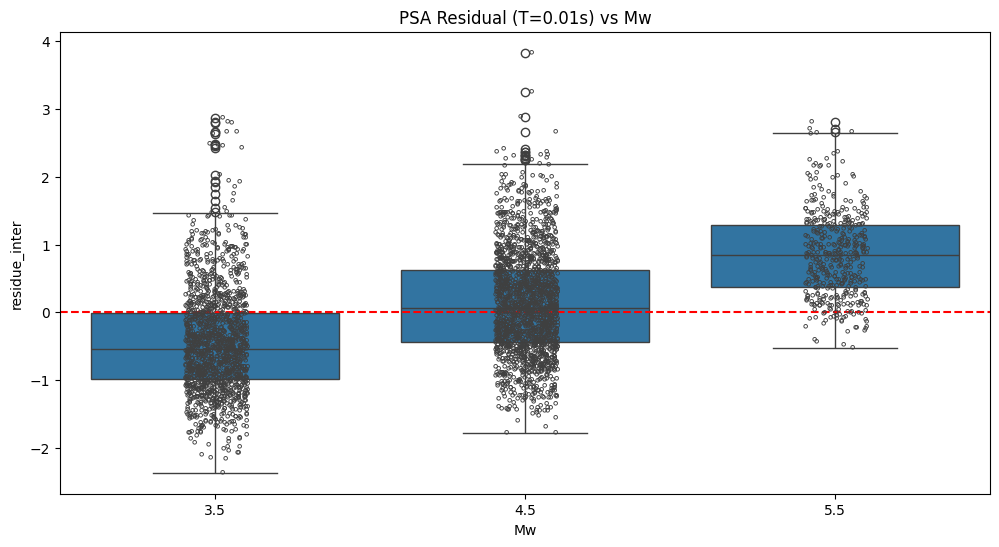

In [ ]:
import matplotlib.pyplot as plt
import pylab as P

num_intervals = int((XX['Earthquake Magnitude'].max() - XX['Earthquake Magnitude'].min())) + 1

fig, ax = plt.subplots(figsize = (12,6))

df1 = pd.DataFrame(columns = ['residue_inter', 'Mw'])

for i in range(num_intervals):
  start_dist = (i+3) * 1
  end_dist = start_dist + 1

  intervals_X = XX[(XX['Earthquake Magnitude'] >= start_dist) & (XX['Earthquake Magnitude'] < end_dist)]

  interval_data = residue_inter[(XX['Earthquake Magnitude'] >= start_dist) & (XX['Earthquake Magnitude'] < end_dist)]
  residue_intervals = interval_data['log PSA 0.01s']

  df2 = pd.DataFrame()
  df2['residue_inter']=residue_intervals
  df2['Mw']=(start_dist+end_dist)/2

  df1 = pd.concat([df1,df2], ignore_index=True)

ax = sns.stripplot(x="Mw", y="residue_inter", data=df1, ax= ax, marker="$\circ$", color=".25")
ax = sns.boxplot(x="Mw", y="residue_inter", data=df1, ax=ax)
ax.axhline(0, ls='--', color='r')

plt.title('PSA Residual (T=0.01s) vs Mw')
plt.show()

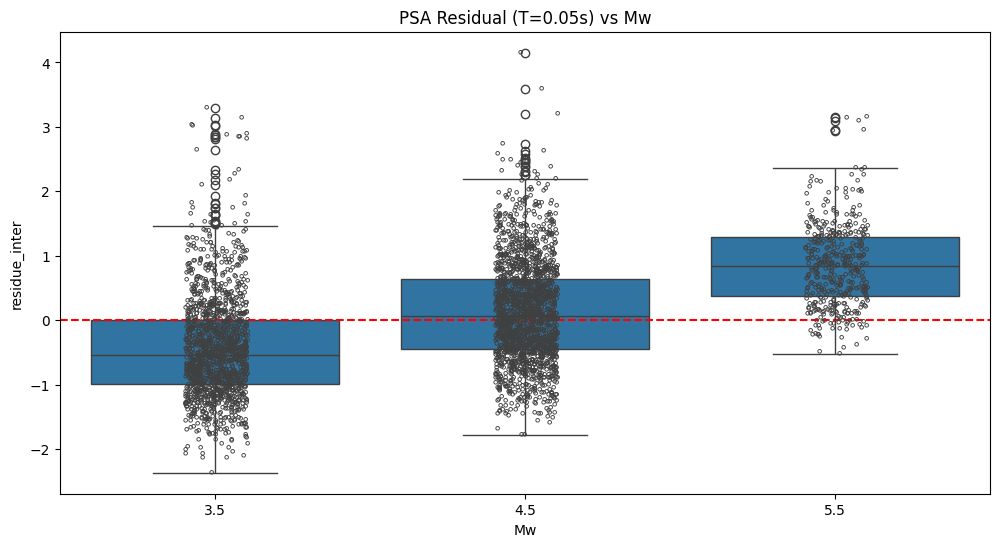

In [ ]:
import matplotlib.pyplot as plt
import pylab as P

num_intervals = int((XX['Earthquake Magnitude'].max() - XX['Earthquake Magnitude'].min())) + 1

fig, ax = plt.subplots(figsize = (12,6))

df1 = pd.DataFrame(columns = ['residue_inter', 'Mw'])

for i in range(num_intervals):
  start_dist = (i+3) * 1
  end_dist = start_dist + 1

  intervals_X = XX[(XX['Earthquake Magnitude'] >= start_dist) & (XX['Earthquake Magnitude'] < end_dist)]

  interval_data = residue_inter[(XX['Earthquake Magnitude'] >= start_dist) & (XX['Earthquake Magnitude'] < end_dist)]
  residue_intervals = interval_data['log PSA 0.05s']

  df2 = pd.DataFrame()
  df2['residue_inter']=residue_intervals
  df2['Mw']=(start_dist+end_dist)/2

  df1 = pd.concat([df1,df2], ignore_index=True)

ax = sns.stripplot(x="Mw", y="residue_inter", data=df1, ax= ax, marker="$\circ$", color=".25")
ax = sns.boxplot(x="Mw", y="residue_inter", data=df1, ax=ax)
ax.axhline(0, ls='--', color='r')

plt.title('PSA Residual (T=0.05s) vs Mw')
plt.show()

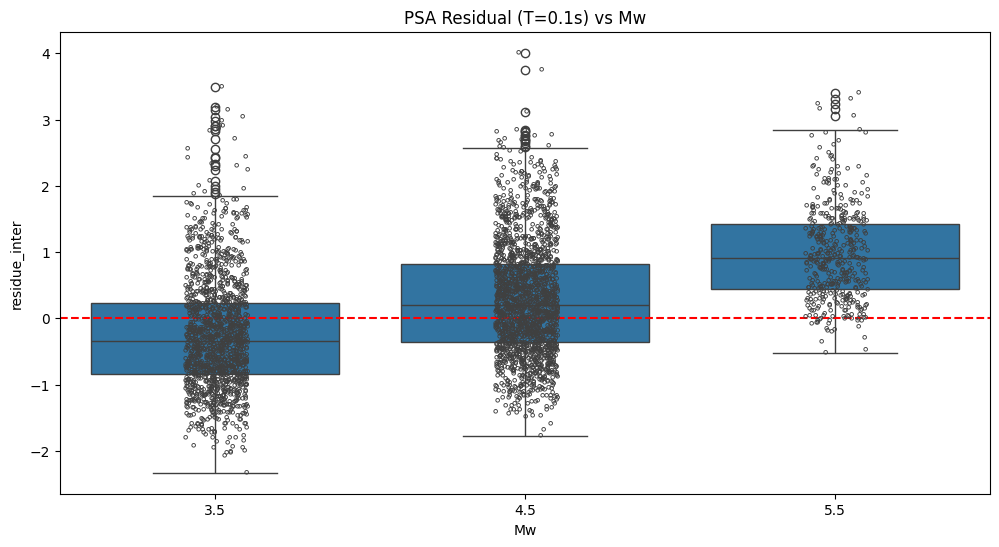

In [ ]:
import matplotlib.pyplot as plt
import pylab as P

num_intervals = int((XX['Earthquake Magnitude'].max() - XX['Earthquake Magnitude'].min())) + 1

fig, ax = plt.subplots(figsize = (12,6))

df1 = pd.DataFrame(columns = ['residue_inter', 'Mw'])

for i in range(num_intervals):
  start_dist = (i+3) * 1
  end_dist = start_dist + 1

  intervals_X = XX[(XX['Earthquake Magnitude'] >= start_dist) & (XX['Earthquake Magnitude'] < end_dist)]

  interval_data = residue_inter[(XX['Earthquake Magnitude'] >= start_dist) & (XX['Earthquake Magnitude'] < end_dist)]
  residue_intervals = interval_data['log PSA 0.1s']

  df2 = pd.DataFrame()
  df2['residue_inter']=residue_intervals
  df2['Mw']=(start_dist+end_dist)/2

  df1 = pd.concat([df1,df2], ignore_index=True)

ax = sns.stripplot(x="Mw", y="residue_inter", data=df1, ax= ax, marker="$\circ$", color=".25")
ax = sns.boxplot(x="Mw", y="residue_inter", data=df1, ax=ax)
ax.axhline(0, ls='--', color='r')

plt.title('PSA Residual (T=0.1s) vs Mw')
plt.show()

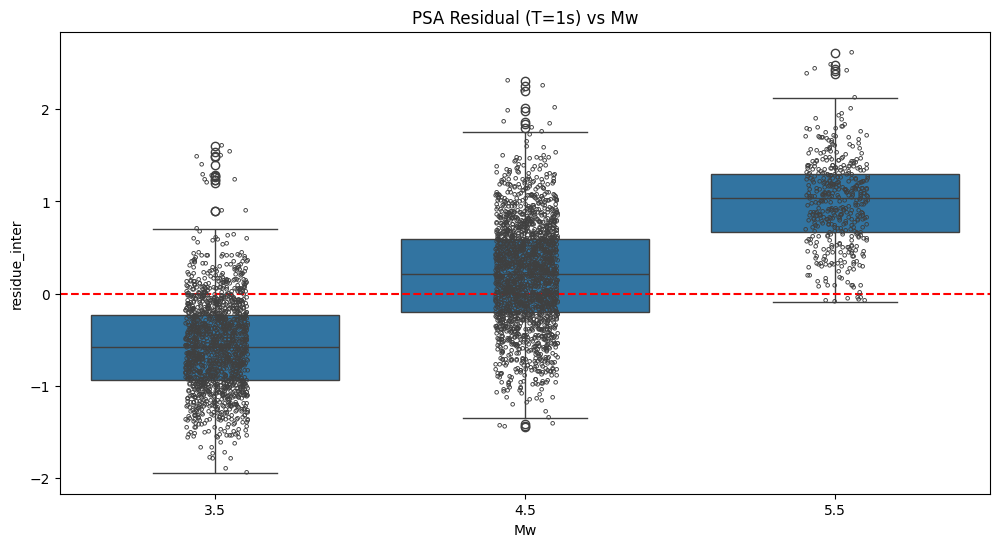

In [ ]:
import matplotlib.pyplot as plt
import pylab as P

num_intervals = int((XX['Earthquake Magnitude'].max() - XX['Earthquake Magnitude'].min())) + 1

fig, ax = plt.subplots(figsize = (12,6))

df1 = pd.DataFrame(columns = ['residue_inter', 'Mw'])

for i in range(num_intervals):
  start_dist = (i+3) * 1
  end_dist = start_dist + 1

  intervals_X = XX[(XX['Earthquake Magnitude'] >= start_dist) & (XX['Earthquake Magnitude'] < end_dist)]

  interval_data = residue_inter[(XX['Earthquake Magnitude'] >= start_dist) & (XX['Earthquake Magnitude'] < end_dist)]
  residue_intervals = interval_data['log PSA 1s']

  df2 = pd.DataFrame()
  df2['residue_inter']=residue_intervals
  df2['Mw']=(start_dist+end_dist)/2

  df1 = pd.concat([df1,df2], ignore_index=True)

ax = sns.stripplot(x="Mw", y="residue_inter", data=df1, ax= ax, marker="$\circ$", color=".25")
ax = sns.boxplot(x="Mw", y="residue_inter", data=df1, ax=ax)
ax.axhline(0, ls='--', color='r')

plt.title('PSA Residual (T=1s) vs Mw')
plt.show()

In [ ]:
intra['Mw/Rjb'] = np.array(intra['Earthquake Magnitude']) / np.array(intra['Joyner-Boore Dist. (km)'])
intra['log Rjb'] = np.log10(intra['Joyner-Boore Dist. (km)'])

yyy = pd.DataFrame()
yyy['log PGA'] = np.log10(intra['PGA-H RotDnn (g)'])
yyy['log PGV'] = np.log10(intra['PGV-H RotDnn (cm/s)'])
t = [0.01 , 0.02 , 0.03 , 0.04 , 0.05,0.06 ,0.07 , 0.08 ,0.09,0.1,0.2 , 0.3 , 0.4, 0.5 ,0.6, 0.7,0.8,0.9,1,2,3,4,5]
for i in t:
    yyy[f"log PSA {i}s"] = np.log10(intra[f"T{i}s"])

XXX = intra[['Earthquake Magnitude', 'Joyner-Boore Dist. (km)', 'log Rjb', 'Mechanism Based on Rake Angle', 'Preferred VS30 (m/sec)']]
# XXX = intra[['Earthquake Magnitude', 'log Rjb', 'Preferred VS30 (m/sec)']]

x_train2, x_test2, y_train2, y_test2 = sk.train_test_split(XXX, yyy, test_size = 0.15, random_state = 42)
x_test2, x_val2, y_test2, y_val2 = sk.train_test_split(x_test2, y_test2, test_size = 0.5, random_state = 42)


<ipython-input-49-c25a16cc0892>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intra['Mw/Rjb'] = np.array(intra['Earthquake Magnitude']) / np.array(intra['Joyner-Boore Dist. (km)'])
<ipython-input-49-c25a16cc0892>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intra['log Rjb'] = np.log10(intra['Joyner-Boore Dist. (km)'])


In [ ]:
intra_y_pred = model_ann.predict(XXX)
residue = yyy - intra_y_pred

133/133 [==============================] - 0s 3ms/step


In [ ]:
residue_intra = yyy - intra_y_pred

In [ ]:
import seaborn as sns

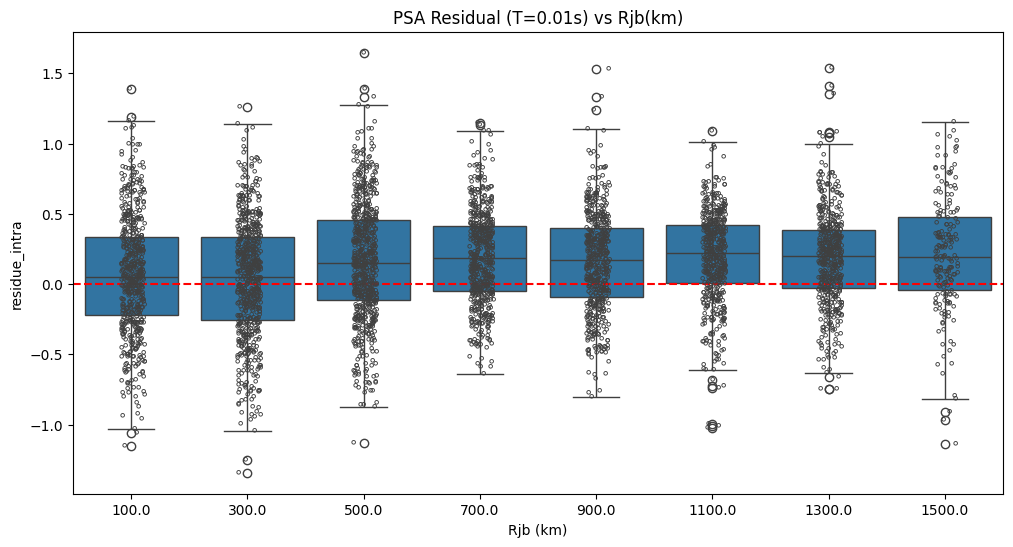

In [ ]:
import matplotlib.pyplot as plt
import pylab as P

num_intervals = int((XXX['Joyner-Boore Dist. (km)'].max() - XXX['Joyner-Boore Dist. (km)'].min()) / 200) + 1

fig, ax = plt.subplots(figsize = (12,6))

df1 = pd.DataFrame(columns = ['residue_intra', 'Rjb (km)'])

for i in range(num_intervals):
  start_dist = i * 200
  end_dist = start_dist + 200

  intervals_X = XXX[(XXX['Joyner-Boore Dist. (km)'] >= start_dist) & (XXX['Joyner-Boore Dist. (km)'] < end_dist)]

  interval_data = residue_intra[(XXX['Joyner-Boore Dist. (km)'] >= start_dist) & (XXX['Joyner-Boore Dist. (km)'] < end_dist)]
  residue_intervals = interval_data['log PSA 0.01s']

  df2 = pd.DataFrame()
  df2['residue_intra']=residue_intervals
  df2['Rjb (km)']=(start_dist+end_dist)/2

  df1 = pd.concat([df1,df2], ignore_index=True)

ax = sns.stripplot(x="Rjb (km)", y="residue_intra", data=df1, ax= ax, marker="$\circ$", color=".25")
ax = sns.boxplot(x="Rjb (km)", y="residue_intra", data=df1, ax=ax)
ax.axhline(0, ls='--', color='r')

# grid_size = 2  # Size of the grid
# block_size = 0.1  # Size of each block

# # Calculate the number of blocks needed in each dimension
# num_blocks = int(grid_size / block_size)

# # Create a grid
# grid = np.zeros((num_blocks, num_blocks))

# # Visualize the grid
# plt.imshow(grid, cmap='binary', interpolation='nearest', extent=[grid_size,1,1, -grid_size])
# plt.xticks(np.arange(0, grid_size+1, block_size))
# plt.yticks(np.arange(0, grid_size+1, block_size))
# plt.grid(color='black', linewidth=0.5)

plt.title('PSA Residual (T=0.01s) vs Rjb(km)')
plt.show()

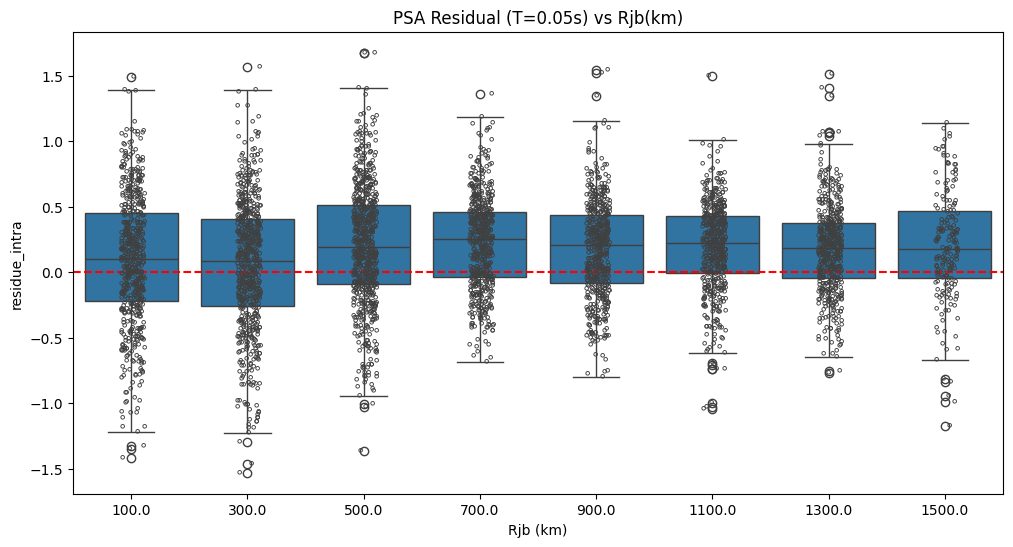

In [ ]:
import matplotlib.pyplot as plt
import pylab as P

num_intervals = int((XXX['Joyner-Boore Dist. (km)'].max() - XXX['Joyner-Boore Dist. (km)'].min()) / 200) + 1

fig, ax = plt.subplots(figsize = (12,6))

df1 = pd.DataFrame(columns = ['residue_intra', 'Rjb (km)'])

for i in range(num_intervals):
  start_dist = i * 200
  end_dist = start_dist + 200

  intervals_X = XXX[(XXX['Joyner-Boore Dist. (km)'] >= start_dist) & (XXX['Joyner-Boore Dist. (km)'] < end_dist)]

  interval_data = residue_intra[(XXX['Joyner-Boore Dist. (km)'] >= start_dist) & (XXX['Joyner-Boore Dist. (km)'] < end_dist)]
  residue_intervals = interval_data['log PSA 0.05s']

  df2 = pd.DataFrame()
  df2['residue_intra']=residue_intervals
  df2['Rjb (km)']=(start_dist+end_dist)/2

  df1 = pd.concat([df1,df2], ignore_index=True)

ax = sns.stripplot(x="Rjb (km)", y="residue_intra", data=df1, ax= ax, marker="$\circ$", color=".25")
ax = sns.boxplot(x="Rjb (km)", y="residue_intra", data=df1, ax=ax)
ax.axhline(0, ls='--', color='r')

# grid_size = 2  # Size of the grid
# block_size = 0.1  # Size of each block

# # Calculate the number of blocks needed in each dimension
# num_blocks = int(grid_size / block_size)

# # Create a grid
# grid = np.zeros((num_blocks, num_blocks))

# # Visualize the grid
# plt.imshow(grid, cmap='binary', interpolation='nearest', extent=[grid_size,1,1, -grid_size])
# plt.xticks(np.arange(0, grid_size+1, block_size))
# plt.yticks(np.arange(0, grid_size+1, block_size))
# plt.grid(color='black', linewidth=0.5)

plt.title('PSA Residual (T=0.05s) vs Rjb(km)')
plt.show()

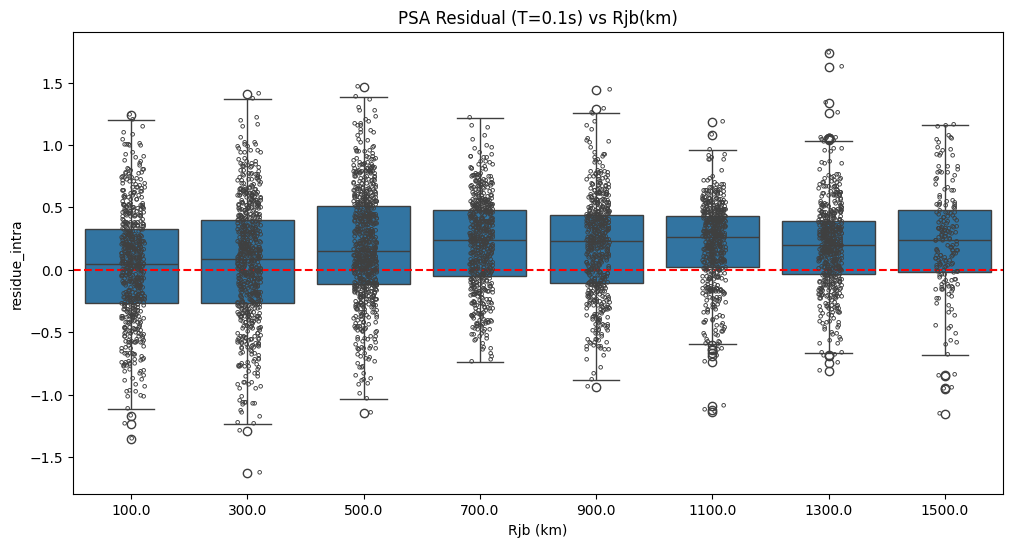

In [ ]:
import matplotlib.pyplot as plt
import pylab as P

num_intervals = int((XXX['Joyner-Boore Dist. (km)'].max() - XXX['Joyner-Boore Dist. (km)'].min()) / 200) + 1

fig, ax = plt.subplots(figsize = (12,6))

df1 = pd.DataFrame(columns = ['residue_intra', 'Rjb (km)'])

for i in range(num_intervals):
  start_dist = i * 200
  end_dist = start_dist + 200

  intervals_X = XXX[(XXX['Joyner-Boore Dist. (km)'] >= start_dist) & (XXX['Joyner-Boore Dist. (km)'] < end_dist)]

  interval_data = residue_intra[(XXX['Joyner-Boore Dist. (km)'] >= start_dist) & (XXX['Joyner-Boore Dist. (km)'] < end_dist)]
  residue_intervals = interval_data['log PSA 0.1s']

  df2 = pd.DataFrame()
  df2['residue_intra']=residue_intervals
  df2['Rjb (km)']=(start_dist+end_dist)/2

  df1 = pd.concat([df1,df2], ignore_index=True)

ax = sns.stripplot(x="Rjb (km)", y="residue_intra", data=df1, ax= ax, marker="$\circ$", color=".25")
ax = sns.boxplot(x="Rjb (km)", y="residue_intra", data=df1, ax=ax)
ax.axhline(0, ls='--', color='r')

# grid_size = 2  # Size of the grid
# block_size = 0.1  # Size of each block

# # Calculate the number of blocks needed in each dimension
# num_blocks = int(grid_size / block_size)

# # Create a grid
# grid = np.zeros((num_blocks, num_blocks))

# # Visualize the grid
# plt.imshow(grid, cmap='binary', interpolation='nearest', extent=[grid_size,1,1, -grid_size])
# plt.xticks(np.arange(0, grid_size+1, block_size))
# plt.yticks(np.arange(0, grid_size+1, block_size))
# plt.grid(color='black', linewidth=0.5)

plt.title('PSA Residual (T=0.1s) vs Rjb(km)')
plt.show()

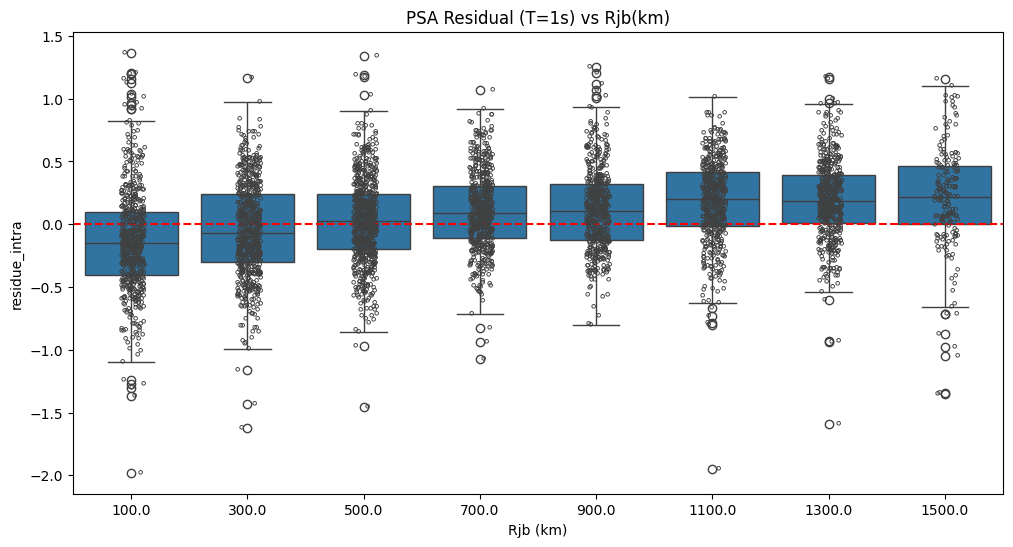

In [ ]:
import matplotlib.pyplot as plt
import pylab as P

num_intervals = int((XXX['Joyner-Boore Dist. (km)'].max() - XXX['Joyner-Boore Dist. (km)'].min()) / 200) + 1

fig, ax = plt.subplots(figsize = (12,6))

df1 = pd.DataFrame(columns = ['residue_intra', 'Rjb (km)'])

for i in range(num_intervals):
  start_dist = i * 200
  end_dist = start_dist + 200

  intervals_X = XXX[(XXX['Joyner-Boore Dist. (km)'] >= start_dist) & (XXX['Joyner-Boore Dist. (km)'] < end_dist)]

  interval_data = residue_intra[(XXX['Joyner-Boore Dist. (km)'] >= start_dist) & (XXX['Joyner-Boore Dist. (km)'] < end_dist)]
  residue_intervals = interval_data['log PSA 1s']

  df2 = pd.DataFrame()
  df2['residue_intra']=residue_intervals
  df2['Rjb (km)']=(start_dist+end_dist)/2

  df1 = pd.concat([df1,df2], ignore_index=True)

ax = sns.stripplot(x="Rjb (km)", y="residue_intra", data=df1, ax= ax, marker="$\circ$", color=".25")
ax = sns.boxplot(x="Rjb (km)", y="residue_intra", data=df1, ax=ax)
ax.axhline(0, ls='--', color='r')

# grid_size = 2  # Size of the grid
# block_size = 0.1  # Size of each block

# # Calculate the number of blocks needed in each dimension
# num_blocks = int(grid_size / block_size)

# # Create a grid
# grid = np.zeros((num_blocks, num_blocks))

# # Visualize the grid
# plt.imshow(grid, cmap='binary', interpolation='nearest', extent=[grid_size,1,1, -grid_size])
# plt.xticks(np.arange(0, grid_size+1, block_size))
# plt.yticks(np.arange(0, grid_size+1, block_size))
# plt.grid(color='black', linewidth=0.5)

plt.title('PSA Residual (T=1s) vs Rjb(km)')
plt.show()

# **LSTM**

In [ ]:
start_yr = 2000
end_yr = 2010

df['Energy'] = 10**(5.24 + 1.44 * df['Earthquake Magnitude'])

total_energy_df = pd.DataFrame(columns=['Year', 'Total_Energy'])

for year in range(start_yr, end_yr + 1):
    selected_entries = df[df['Year'] == year]
    total_energy = selected_entries['Energy'].sum()
    total_energy_df = pd.concat([total_energy_df, pd.DataFrame({'Year': [year], 'Total_Energy': [total_energy]})], ignore_index=True)


df = df.merge(total_energy_df, on='Year', how='left')

/tmp/ipykernel_33/821992755.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  total_energy_df = pd.concat([total_energy_df, pd.DataFrame({'Year': [year], 'Total_Energy': [total_energy]})], ignore_index=True)


In [ ]:
total_energy_df

Year  Total_Energy
0   2000  1.463545e+13
1   2001  2.510558e+13
2   2002  2.372832e+14
3   2003  6.956848e+13
4   2004  1.692085e+13
5   2005  1.110495e+14
6   2006  1.176517e+13
7   2007  5.799115e+10
8   2008  1.044242e+15
9   2009  2.605596e+10
10  2010  9.115043e+14

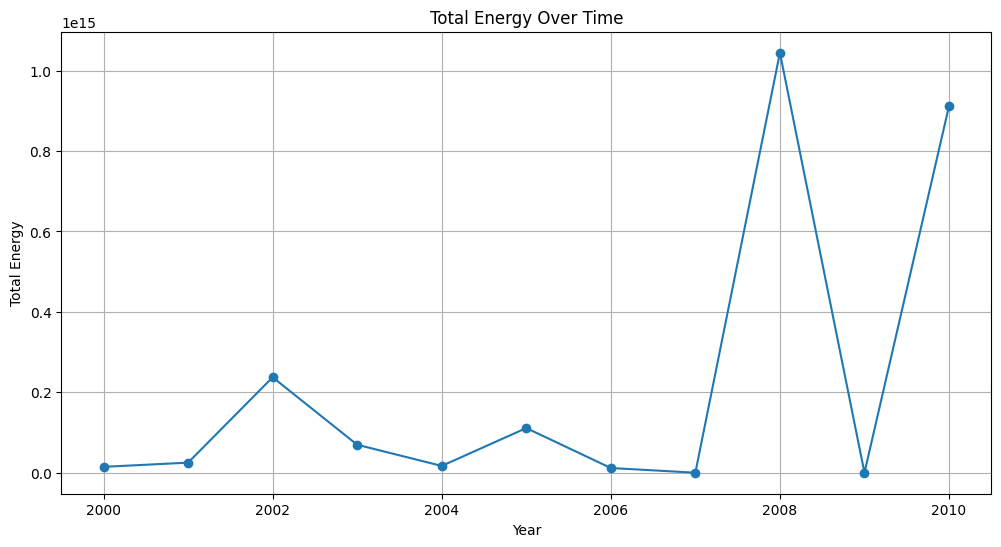

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(total_energy_df['Year'], total_energy_df['Total_Energy'], marker='o')
# plt.yscale('log')
plt.xlabel('Year')
plt.ylabel('Total Energy')
plt.title('Total Energy Over Time')
plt.grid(True)
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [ ]:
plot_acf(df['Total_Energy'])
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.show()

In [ ]:
result = adfuller(df['Total_Energy'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, LeakyReLU, ReLU
from keras.activations import relu, sigmoid, tanh
from keras.optimizers import Nadam

In [ ]:
df['Mw/Rjb'] = np.array(df['Earthquake Magnitude']) / np.array(df['Joyner-Boore Dist. (km)'])
df['log Rjb'] = np.log10(df['Joyner-Boore Dist. (km)'])

Y = pd.DataFrame()
Y['log PGA'] = np.log10(df['PGA-H RotDnn (g)'])
Y['log PGV'] = np.log10(df['PGV-H RotDnn (cm/s)'])
t = [0.01 , 0.02 , 0.03 , 0.04 , 0.05,0.06 ,0.07 , 0.08 ,0.09,0.1,0.2 , 0.3 , 0.4, 0.5 ,0.6, 0.7,0.8,0.9,1,2,3,4,5]
for i in t:
    Y[f"log PSA {i}s"] = np.log10(df[f"T{i}s"])

# X = df[['Earthquake Magnitude', 'Joyner-Boore Dist. (km)', 'log Rjb', 'Mechanism Based on Rake Angle', 'Preferred VS30 (m/sec)']]
X = df[['Earthquake Magnitude', 'log Rjb', 'Preferred VS30 (m/sec)']]
# X = np.array(X)
# Y = np.array(Y)

x_train, x_test, y_train, y_test = sk.train_test_split(X, Y, test_size = 0.15, random_state = 42)
x_test, x_val, y_test, y_val = sk.train_test_split(x_test, y_test, test_size = 0.5, random_state = 42)


In [ ]:
y_train.shape

(6870, 23)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Nadam

# x_train_reshaped = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
# x_train_reshaped = x_train.reshape(x_train.shape[0],  x_train.shape[1],1)

lstm = tf.keras.Sequential([
    LSTM(8, activation="tanh", input_shape=(x_train.shape[1], 1)),
    Dense(25)
])

lstm.compile(optimizer=Nadam(learning_rate=0.002), loss=tf.keras.losses.Huber(), metrics = ['R2Score'])

history = lstm.fit(x_train, y_train, epochs=120, batch_size=32)


Epoch 1/120
215/215 [==============================] - 9s 7ms/step - loss: 2.4358 - r2_score: -11.3133
Epoch 2/120
215/215 [==============================] - 2s 8ms/step - loss: 0.4696 - r2_score: -0.2608
Epoch 3/120
215/215 [==============================] - 2s 10ms/step - loss: 0.3860 - r2_score: -0.0032
Epoch 4/120
215/215 [==============================] - 2s 10ms/step - loss: 0.3676 - r2_score: 0.0563
Epoch 5/120
215/215 [==============================] - 2s 9ms/step - loss: 0.2887 - r2_score: 0.2860
Epoch 6/120
215/215 [==============================] - 2s 7ms/step - loss: 0.1817 - r2_score: 0.5758
Epoch 7/120
215/215 [==============================] - 2s 8ms/step - loss: 0.1340 - r2_score: 0.6954
Epoch 8/120
215/215 [==============================] - 2s 9ms/step - loss: 0.1231 - r2_score: 0.7179
Epoch 9/120
215/215 [==============================] - 2s 9ms/step - loss: 0.1200 - r2_score: 0.7231
Epoch 10/120
215/215 [==============================] - 1s 7ms/step - loss: 0.1186 - 

In [ ]:
lstm.save('/content/drive/My Drive/SEISMIC MODELS/lstm.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
y_pred_a = lstm.predict(X)
y_pred_c = [f"log PSA {i}s" for i in t]
# y_pred_c.append("log PGA")
# y_pred_c.append("log PGV")
y_pred = pd.DataFrame(y_pred_a, columns=y_pred_c)

# y_pred_a = model_nlae.predict(y_pred)
# y_pred_c = [f"log PSA {i}s" for i in t]
# y_pred_c.append("log PGA")
# y_pred_c.append("log PGV")
# y_pred = pd.DataFrame(y_pred_a, columns=y_pred_c)


253/253 [==============================] - 2s 3ms/step


In [ ]:
from sklearn.metrics import r2_score

# Calculate R^2 score for the first dataframe
r2_score_1 = r2_score(Y,y_pred)


print("R^2 score for dataframe 1:", r2_score_1)


R^2 score for dataframe 1: 0.8254396010562862


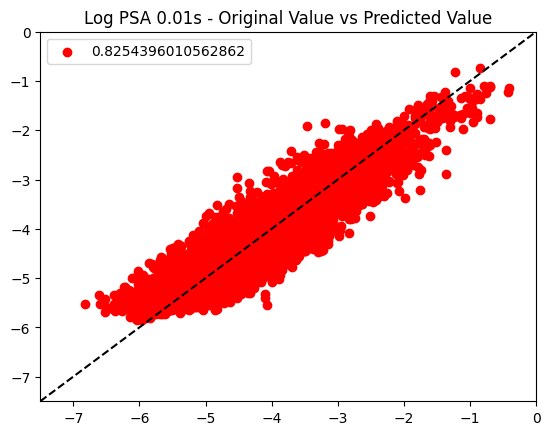

In [ ]:
plt.scatter(Y['log PSA 0.01s'], y_pred['log PSA 0.01s'], color = 'r', label = r2_score_1)
x = np.linspace(-7.5, 0, 1000)
plt.plot(x, x, color = 'black', linestyle = '--')
plt.xlim(-7.5, 0)
plt.ylim(-7.5, 0)
plt.legend()
plt.title('Log PSA 0.01s - Original Value vs Predicted Value')
plt.show()

1/1 [==============================] - 0s 66ms/step


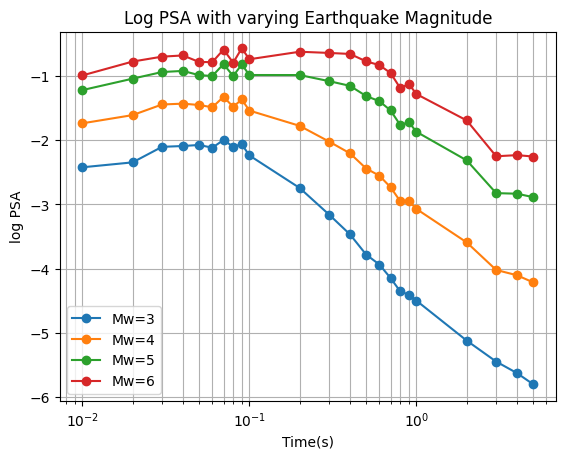

In [ ]:
l=[]

rjb = 50
focal = 1

# r = [3,rjb,np.log10(rjb),focal,760]
# r1 = [4,rjb,np.log10(rjb), focal,760]
# r2 = [5,rjb,np.log10(rjb), focal,760]
# r3 = [6,rjb,np.log10(rjb), focal,760]

r = [3,np.log10(10),760]
r1 = [4,np.log10(10),760]
r2 = [5,np.log10(10),760]
r3 = [6,np.log10(10),760]

l.append(r)
l.append(r1)
l.append(r2)
l.append(r3)

l = np.asarray(l)

rp = lstm.predict(l)



plt.plot(t, rp[0][2:], "-o", label='Mw=3')
plt.plot(t, rp[1][2:], "-o", label='Mw=4')
plt.plot(t, rp[2][2:], "-o", label='Mw=5')
plt.plot(t, rp[3][2:], "-o", label='Mw=6')

plt.xlabel('Time(s)')
plt.ylabel('log PSA')
plt.xscale('log')
plt.grid(True, which = 'both')
plt.title('Log PSA with varying Earthquake Magnitude')

plt.legend()

## **NON LINEAR AUTOENCODERS**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import sklearn.model_selection as sk

In [ ]:
import numpy as np
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import r2_score
from keras.models import load_model, save_model

In [ ]:
input_dim = 25
output_dim = 25

input_layer = Input(shape = (input_dim,))

encode_layer_1 = Dense(10, activation = 'sigmoid')(input_layer)
encode_layer_2 = Dense(8, activation = 'sigmoid')(encode_layer_1)
encode_layer_3 = Dense(6, activation = 'sigmoid')(encode_layer_2)
# encode_layer_4 = Dense(14, activation = 'relu')(encode_layer_3)


latent_view = Dense(3, activation = 'linear')(encode_layer_3)

decode_layer_1 = Dense(6, activation = 'sigmoid')(latent_view)
decode_layer_2 = Dense(8, activation = 'sigmoid')(decode_layer_1)
decode_layer_3 = Dense(10, activation = 'sigmoid')(decode_layer_2)
# decode_layer_4 = Dense(6, activation = 'linear')(decode_layer_3)


output_layer = Dense(output_dim, activation = 'linear')(decode_layer_3)

model_nlae = Model(input_layer, output_layer)

model_nlae.compile(optimizer=Nadam(learning_rate = 0.002), loss='mse', metrics = ['R2Score'])

# early_stopping = EarlyStopping(monitor='val_r2_score', patience=10, restore_best_weights=True)

# early_stopping = EarlyStopping(restore_best_weights=True)

# best_weights_callback = BestWeightsCallback()

model_nlae.fit(y_train, y_train, epochs = 150, batch_size = 32, validation_data = (y_val, y_val))

# joblib.dump(model_nlae, '/content/drive/My Drive/SEISMIC MODELS/model_nlae.joblib')

# model_nlae.save('/content/drive/My Drive/SEISMIC MODELS/model_nlae.h5')

Epoch 1/150
215/215 [==============================] - 7s 9ms/step - loss: 8.5151 - r2_score: -8.7276 - val_loss: 1.4597 - val_r2_score: -0.8715
Epoch 2/150
215/215 [==============================] - 2s 9ms/step - loss: 1.0089 - r2_score: -0.1411 - val_loss: 0.7871 - val_r2_score: -0.0170
Epoch 3/150
215/215 [==============================] - 2s 9ms/step - loss: 0.8854 - r2_score: -2.0360e-04 - val_loss: 0.7772 - val_r2_score: -0.0044
Epoch 4/150
215/215 [==============================] - 2s 9ms/step - loss: 0.8708 - r2_score: 0.0163 - val_loss: 0.7283 - val_r2_score: 0.0591
Epoch 5/150
215/215 [==============================] - 2s 8ms/step - loss: 0.6869 - r2_score: 0.2254 - val_loss: 0.4522 - val_r2_score: 0.4174
Epoch 6/150
215/215 [==============================] - 1s 6ms/step - loss: 0.3972 - r2_score: 0.5537 - val_loss: 0.2613 - val_r2_score: 0.6659
Epoch 7/150
215/215 [==============================] - 1s 6ms/step - loss: 0.2673 - r2_score: 0.7000 - val_loss: 0.1989 - val_r2_sco

In [ ]:
# model_nlae = tf.keras.models.load_model('/content/drive/My Drive/SEISMIC MODELS/model_nlae.h5')


In [ ]:
y_pred_a = model_ann.predict(X)
y_pred_c = [f"log PSA {i}s" for i in t]
y_pred_c.append("log PGA")
y_pred_c.append("log PGV")
y_pred = pd.DataFrame(y_pred_a, columns=y_pred_c)

y_pred_a = model_nlae.predict(y_pred)
y_pred_c = [f"log PSA {i}s" for i in t]
y_pred_c.append("log PGA")
y_pred_c.append("log PGV")
y_pred = pd.DataFrame(y_pred_a, columns=y_pred_c)

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 5), found shape=(None, 3)


In [ ]:
from sklearn.metrics import r2_score

# Calculate R^2 score for the first dataframe
r2_score_1 = r2_score(Y,y_pred)


print("R^2 score for dataframe 1:", r2_score_1)


R^2 score for dataframe 1: 0.7288967477856295


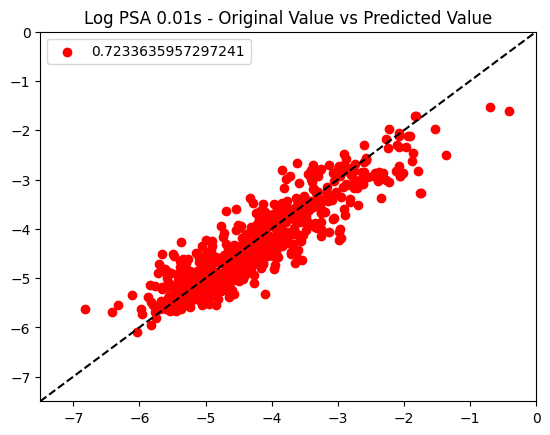

In [ ]:
plt.scatter(y_test['log PSA 0.01s'], y_pred['log PSA 0.01s'], color = 'r', label = r2_score_1)
x = np.linspace(-7.5, 0, 1000)
plt.plot(x, x, color = 'black', linestyle = '--')
plt.xlim(-7.5, 0)
plt.ylim(-7.5, 0)
plt.legend()
plt.title('Log PSA 0.01s - Original Value vs Predicted Value')
plt.show()

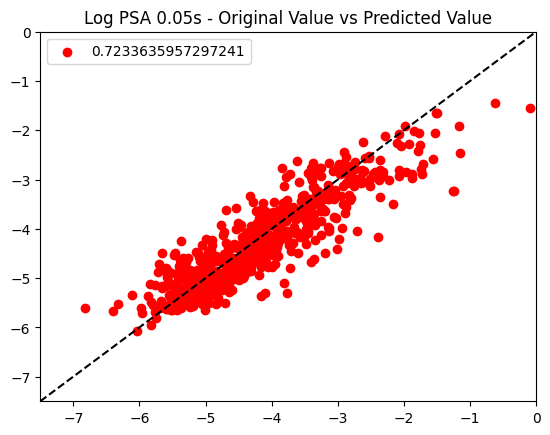

In [ ]:
plt.scatter(y_test['log PSA 0.05s'], y_pred['log PSA 0.05s'], color = 'r', label = r2_score_1)
x = np.linspace(-7.5, 0, 1000)
plt.plot(x, x, color = 'black', linestyle = '--')
plt.xlim(-7.5, 0)
plt.ylim(-7.5, 0)
plt.legend()

plt.title('Log PSA 0.05s - Original Value vs Predicted Value')
plt.show()

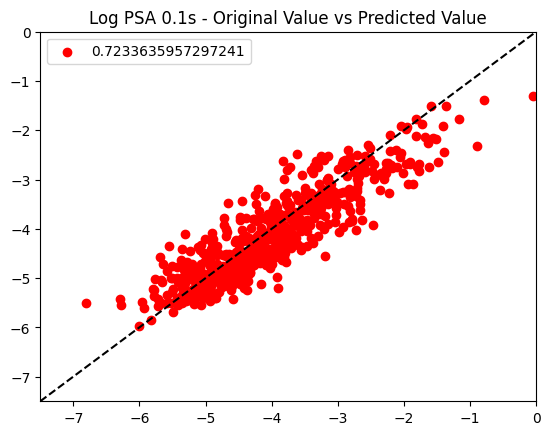

In [ ]:
plt.scatter(y_test['log PSA 0.1s'], y_pred['log PSA 0.1s'], color = 'r', label = r2_score_1)
x = np.linspace(-7.5, 0, 1000)
plt.plot(x, x, color = 'black', linestyle = '--')
plt.xlim(-7.5, 0)
plt.ylim(-7.5, 0)
plt.legend()

plt.title('Log PSA 0.1s - Original Value vs Predicted Value')
plt.show()

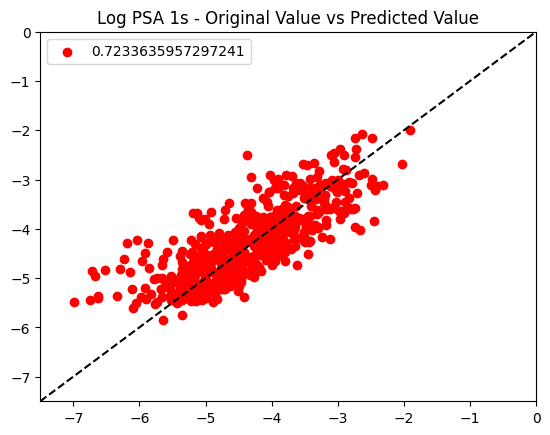

In [ ]:
plt.scatter(y_test['log PSA 1s'], y_pred['log PSA 1s'], color = 'r', label = r2_score_1)
x = np.linspace(-7.5, 0, 1000)
plt.plot(x, x, color = 'black', linestyle = '--')
plt.xlim(-7.5, 0)
plt.legend()

plt.ylim(-7.5, 0)
plt.title('Log PSA 1s - Original Value vs Predicted Value')
plt.show()

1/1 [==============================] - 0s 41ms/step


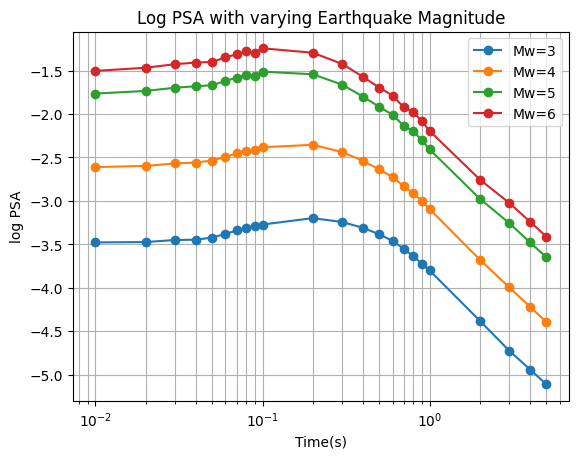

In [ ]:
l=[]

rjb = 50
focal = 1

r = [3,rjb,np.log10(rjb),focal,760]
r1 = [4,rjb,np.log10(rjb), focal,760]
r2 = [5,rjb,np.log10(rjb), focal,760]
r3 = [6,rjb,np.log10(rjb), focal,760]

l.append(r)
l.append(r1)
l.append(r2)
l.append(r3)

l = np.asarray(l)

rp = model_ann.predict(l)

prs = model_nlae.predict(rp)

plt.plot(t, prs[0][2:], "-o", label='Mw=3')
plt.plot(t, prs[1][2:], "-o", label='Mw=4')
plt.plot(t, prs[2][2:], "-o", label='Mw=5')
plt.plot(t, prs[3][2:], "-o", label='Mw=6')

plt.xlabel('Time(s)')
plt.ylabel('log PSA')
plt.xscale('log')
plt.grid(True, which = 'both')
plt.title('Log PSA with varying Earthquake Magnitude')

plt.legend()

1/1 [==============================] - 0s 30ms/step


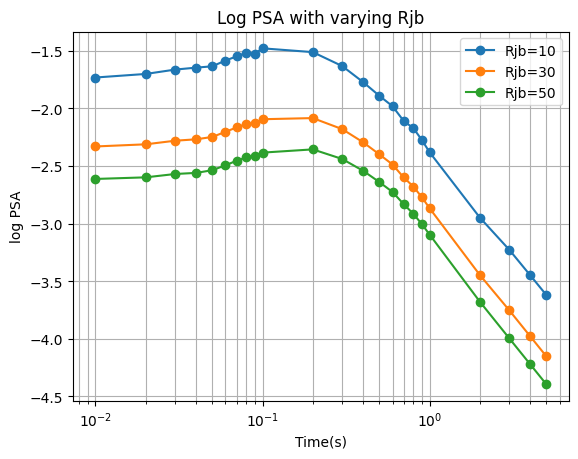

In [ ]:
l=[]

rjb = [10,30,50]
focal = 1

r1 = [4, rjb[0],np.log10(rjb[0]),focal, 760]
r2 = [4, rjb[1],np.log10(rjb[1]), focal,760]
r3 = [4, rjb[2],np.log10(rjb[2]), focal,760]

l.append(r1)
l.append(r2)
l.append(r3)

l = np.asarray(l)

rp = model_ann.predict(l)

prs = model_nlae.predict(rp)

plt.plot(t, prs[0][2:], "-o", label='Rjb=10')
plt.plot(t, prs[1][2:], "-o", label='Rjb=30')
plt.plot(t, prs[2][2:], "-o", label='Rjb=50')

plt.xlabel('Time(s)')
plt.ylabel('log PSA')
plt.xscale('log')
plt.grid(True, which = 'both')

plt.title('Log PSA with varying Rjb')

plt.legend()

1/1 [==============================] - 0s 42ms/step


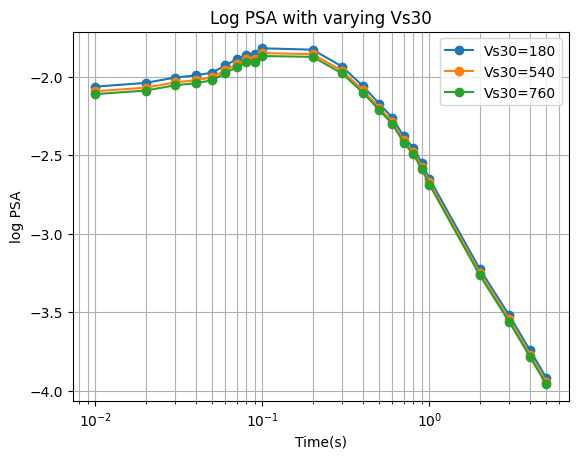

In [ ]:
l=[]

rjb = 20
focal = 1

r1 = [4,rjb, np.log10(rjb), focal,180]
r2 = [4,rjb, np.log10(rjb), focal,540]
r3 = [4,rjb, np.log10(rjb), focal,760]

l.append(r1)
l.append(r2)
l.append(r3)

l = np.asarray(l)

rp = model_ann.predict(l)

prs = model_nlae.predict(rp)

plt.plot(t, prs[0][2:], "-o", label='Vs30=180')
plt.plot(t, prs[1][2:], "-o", label='Vs30=540')
plt.plot(t, prs[2][2:], "-o", label='Vs30=760')

plt.xlabel('Time(s)')
plt.ylabel('log PSA')
plt.xscale('log')
plt.grid(True, which = 'both')

plt.title('Log PSA with varying Vs30')

plt.legend()

19/19 [==============================] - 0s 5ms/step


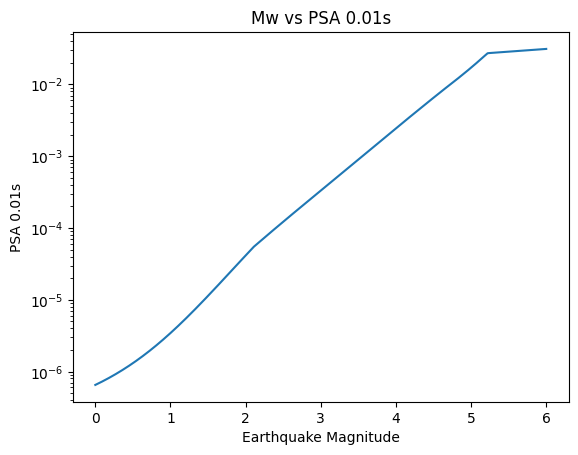

In [ ]:
l = []

rjb = 50
focal = 1

mw = np.arange(0,6.01,0.01)
for m in  mw:
  r = [m,rjb,np.log10(rjb),focal,760]
  l.append(r)


l = np.asarray(l)

rp = model_ann.predict(l)

prs = model_nlae.predict(rp)

plt.plot(l[:, 0], 10**prs[:, 2])
plt.xlabel('Earthquake Magnitude')
plt.ylabel('PSA 0.01s')
plt.yscale('log')
# plt.grid(True, which = 'both')

plt.title('Mw vs PSA 0.01s')
plt.show()

19/19 [==============================] - 0s 3ms/step


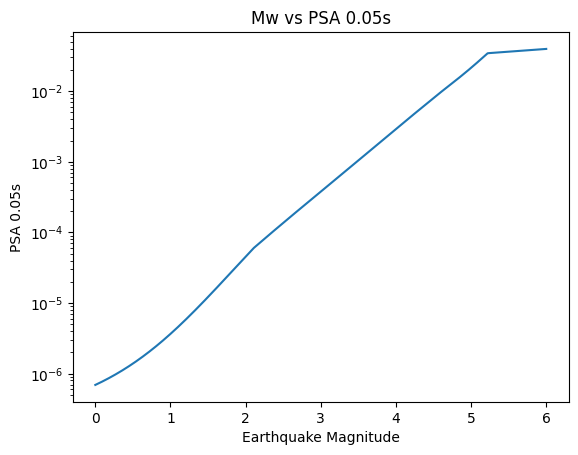

In [ ]:
l = []

rjb = 50
focal = 1

mw = np.arange(0,6.01,0.01)
for m in  mw:
  r = [m,rjb,np.log10(rjb),focal,760]
  l.append(r)


l = np.asarray(l)

rp = model_ann.predict(l)

prs = model_nlae.predict(rp)

plt.plot(l[:, 0], 10**prs[:, 6])
plt.xlabel('Earthquake Magnitude')
plt.ylabel('PSA 0.05s')
plt.yscale('log')
plt.title('Mw vs PSA 0.05s')
plt.show()

19/19 [==============================] - 0s 5ms/step


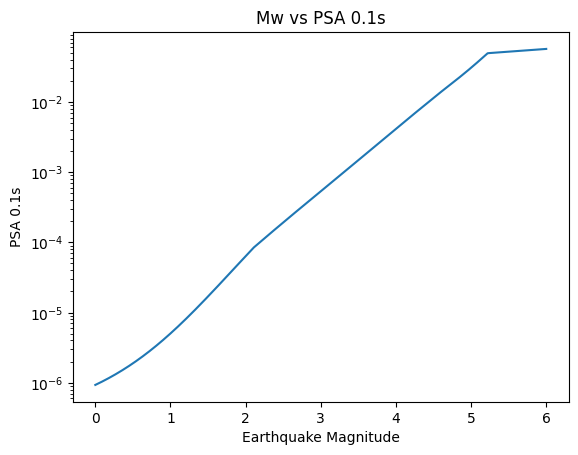

In [ ]:
l = []

rjb = 50
focal = 1

mw = np.arange(0,6.01,0.01)
for m in  mw:
  r = [m,rjb,np.log10(rjb),focal,760]
  l.append(r)


l = np.asarray(l)

rp = model_ann.predict(l)

prs = model_nlae.predict(rp)

plt.plot(l[:, 0], 10**prs[:, 11])
plt.xlabel('Earthquake Magnitude')
plt.ylabel('PSA 0.1s')
plt.yscale('log')
plt.title('Mw vs PSA 0.1s')
plt.show()

19/19 [==============================] - 0s 5ms/step


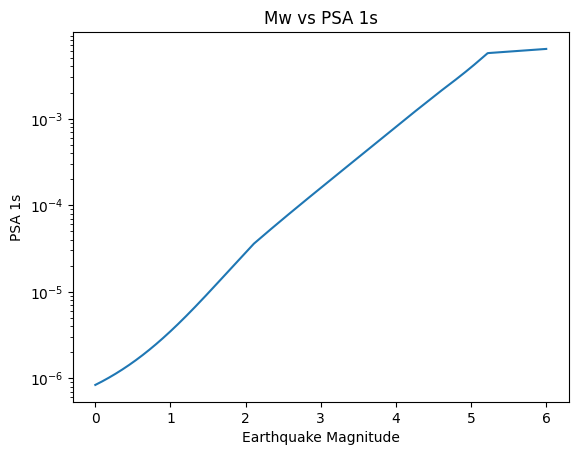

In [ ]:
l = []

rjb = 50
focal = 1

mw = np.arange(0,6.01,0.01)
for m in  mw:
  r = [m,rjb,np.log10(rjb),focal,760]
  l.append(r)


l = np.asarray(l)

rp = model_ann.predict(l)

prs = model_nlae.predict(rp)

plt.plot(l[:, 0], 10**prs[:, 20])
plt.xlabel('Earthquake Magnitude')
plt.ylabel('PSA 1s')
plt.yscale('log')
plt.title('Mw vs PSA 1s')
plt.show()

32/32 [==============================] - 0s 6ms/step


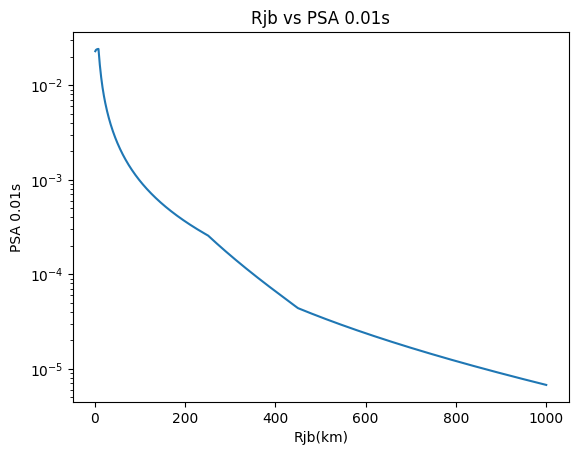

In [ ]:
l = []

rjb = np.arange(1,1001,1)
focal = 1

for d in rjb:
  r = [4,d,np.log10(d),focal,760]
  l.append(r)

l = np.asarray(l)

rp = model_ann.predict(l)

prs = model_nlae.predict(rp)

plt.plot(l[:, 1], 10**prs[:, 2])
plt.xlabel('Rjb(km)')
plt.ylabel('PSA 0.01s')
plt.yscale('log')
plt.title('Rjb vs PSA 0.01s')
plt.show()

32/32 [==============================] - 0s 2ms/step


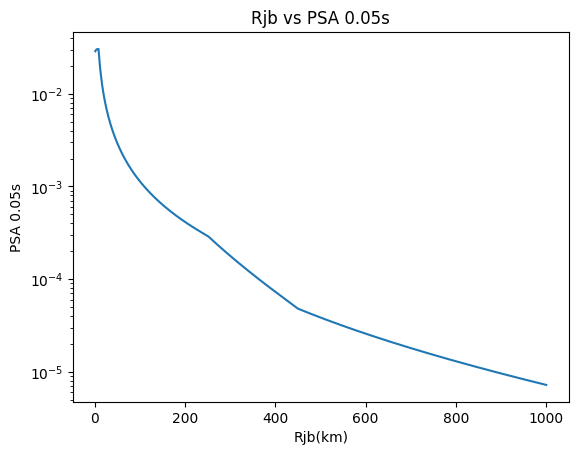

In [ ]:
l = []

rjb = np.arange(1,1001,1)
focal = 1

for d in rjb:
  r = [4,d,np.log10(d),focal,760]
  l.append(r)

l = np.asarray(l)

rp = model_ann.predict(l)

prs = model_nlae.predict(rp)

plt.plot(l[:, 1], 10**prs[:, 6])
plt.xlabel('Rjb(km)')
plt.ylabel('PSA 0.05s')
plt.yscale('log')
plt.title('Rjb vs PSA 0.05s')
plt.show()

32/32 [==============================] - 0s 3ms/step


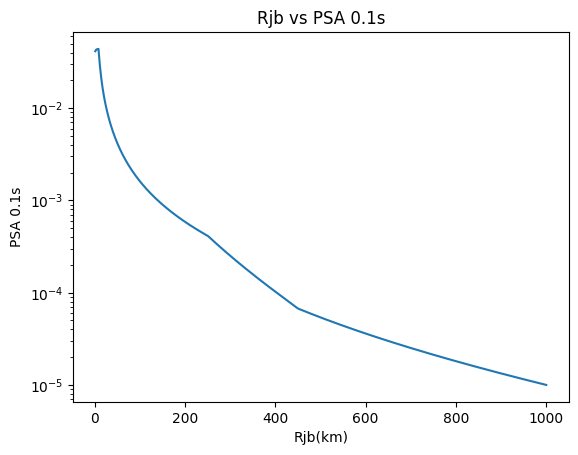

In [ ]:
l = []

rjb = np.arange(1,1001,1)
focal = 1

for d in rjb:
  r = [4,d,np.log10(d),focal,760]
  l.append(r)

l = np.asarray(l)

rp = model_ann.predict(l)

prs = model_nlae.predict(rp)

plt.plot(l[:, 1], 10**prs[:, 11])
plt.xlabel('Rjb(km)')
plt.ylabel('PSA 0.1s')
plt.yscale('log')
plt.title('Rjb vs PSA 0.1s')
plt.show()

32/32 [==============================] - 0s 2ms/step


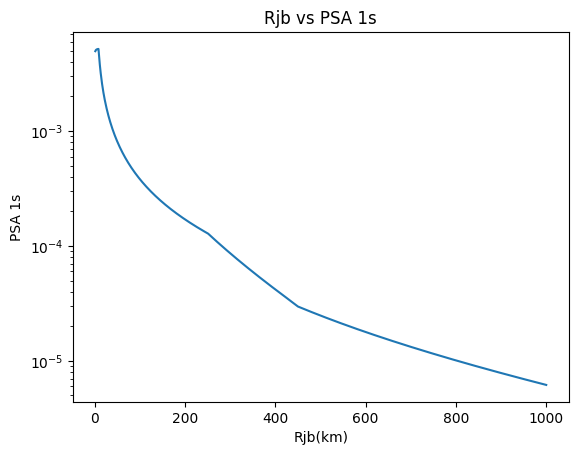

In [ ]:
l = []

rjb = np.arange(1,1001,1)
focal = 1

for d in rjb:
  r = [4,d,np.log10(d),focal,760]
  l.append(r)

l = np.asarray(l)

rp = model_ann.predict(l)

prs = model_nlae.predict(rp)

plt.plot(l[:, 1], 10**prs[:, 20])
plt.xlabel('Rjb(km)')
plt.ylabel('PSA 1s')
plt.yscale('log')
plt.title('Rjb vs PSA 1s')
plt.show()

19/19 [==============================] - 0s 3ms/step


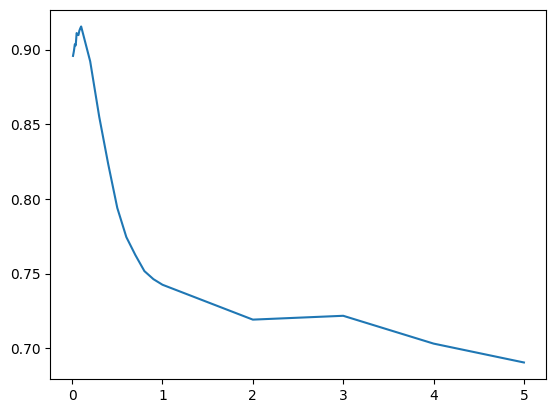

In [ ]:
import numpy as np
import tensorflow as tf


y_pred = model_ann.predict(x_test)
y_pred = model_nlae.predict(y_pred)

psa_predictions = y_pred[:, -(len(t)+2):]

psa_std_deviation = np.std(psa_predictions, axis=0)

# print("Standard Deviation of PSA predictions from 0.01s to 5s:", psa_std_deviation)
psa_std_deviation = psa_std_deviation[2:]


plt.plot(t,psa_std_deviation)

In [ ]:
inter_y_pred = model_ann.predict(XX)
intre_y_pred = model_ann.predict(XXX)

inter_y = np.mean(model_nlae.predict(inter_y_pred))
intra_y = np.mean(model_nlae.predict(intra_y_pred))

residue_inter = yy - inter_y
residue_intra = yyy - intra_y

133/133 [==============================] - 0s 2ms/step


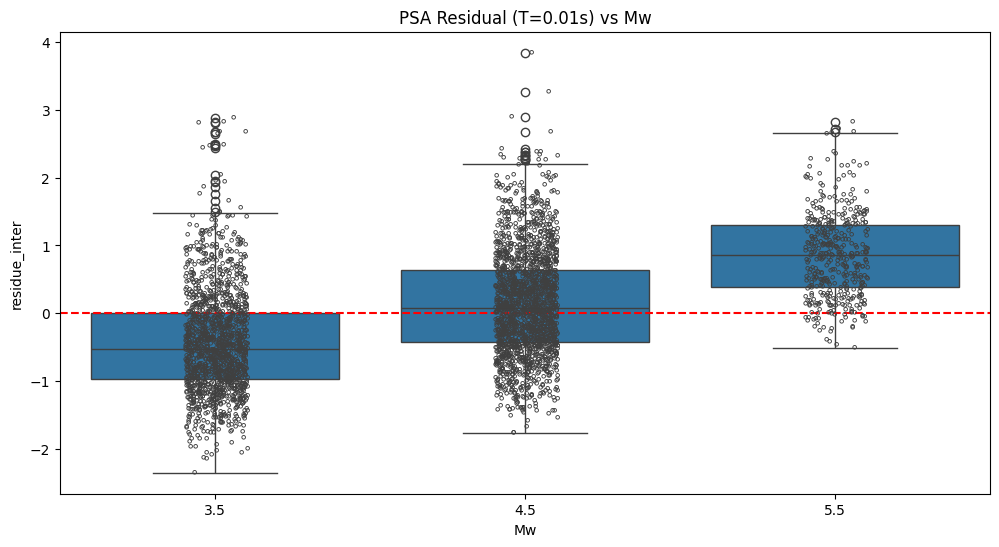

In [ ]:
import matplotlib.pyplot as plt
import pylab as P

num_intervals = int((XX['Earthquake Magnitude'].max() - XX['Earthquake Magnitude'].min())) + 1

fig, ax = plt.subplots(figsize = (12,6))

df1 = pd.DataFrame(columns = ['residue_inter', 'Mw'])

for i in range(num_intervals):
  start_dist = (i+3) * 1
  end_dist = start_dist + 1

  intervals_X = XX[(XX['Earthquake Magnitude'] >= start_dist) & (XX['Earthquake Magnitude'] < end_dist)]

  interval_data = residue_inter[(XX['Earthquake Magnitude'] >= start_dist) & (XX['Earthquake Magnitude'] < end_dist)]
  residue_intervals = interval_data['log PSA 0.01s']

  df2 = pd.DataFrame()
  df2['residue_inter']=residue_intervals
  df2['Mw']=(start_dist+end_dist)/2

  df1 = pd.concat([df1,df2], ignore_index=True)

ax = sns.stripplot(x="Mw", y="residue_inter", data=df1, ax= ax, marker="$\circ$", color=".25")
ax = sns.boxplot(x="Mw", y="residue_inter", data=df1, ax=ax)
ax.axhline(0, ls='--', color='r')

plt.title('PSA Residual (T=0.01s) vs Mw')
plt.show()

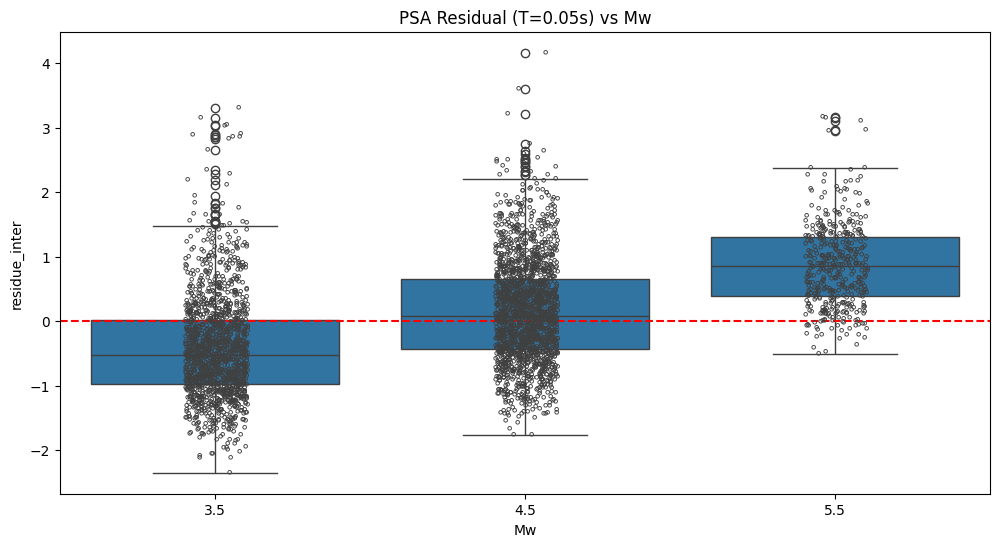

In [ ]:
import matplotlib.pyplot as plt
import pylab as P

num_intervals = int((XX['Earthquake Magnitude'].max() - XX['Earthquake Magnitude'].min())) + 1

fig, ax = plt.subplots(figsize = (12,6))

df1 = pd.DataFrame(columns = ['residue_inter', 'Mw'])

for i in range(num_intervals):
  start_dist = (i+3) * 1
  end_dist = start_dist + 1

  intervals_X = XX[(XX['Earthquake Magnitude'] >= start_dist) & (XX['Earthquake Magnitude'] < end_dist)]

  interval_data = residue_inter[(XX['Earthquake Magnitude'] >= start_dist) & (XX['Earthquake Magnitude'] < end_dist)]
  residue_intervals = interval_data['log PSA 0.05s']

  df2 = pd.DataFrame()
  df2['residue_inter']=residue_intervals
  df2['Mw']=(start_dist+end_dist)/2

  df1 = pd.concat([df1,df2], ignore_index=True)

ax = sns.stripplot(x="Mw", y="residue_inter", data=df1, ax= ax, marker="$\circ$", color=".25")
ax = sns.boxplot(x="Mw", y="residue_inter", data=df1, ax=ax)
ax.axhline(0, ls='--', color='r')

plt.title('PSA Residual (T=0.05s) vs Mw')
plt.show()

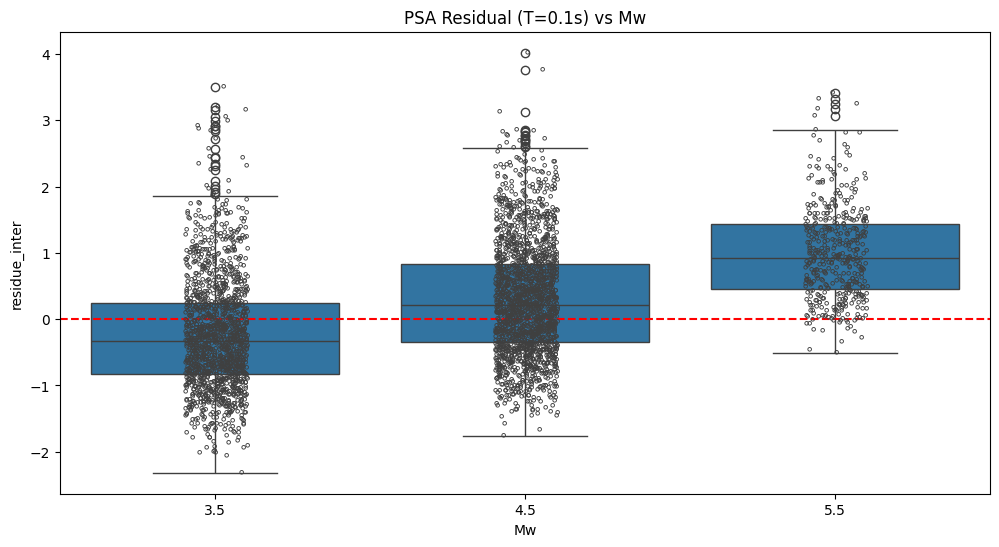

In [ ]:
import matplotlib.pyplot as plt
import pylab as P

num_intervals = int((XX['Earthquake Magnitude'].max() - XX['Earthquake Magnitude'].min())) + 1

fig, ax = plt.subplots(figsize = (12,6))

df1 = pd.DataFrame(columns = ['residue_inter', 'Mw'])

for i in range(num_intervals):
  start_dist = (i+3) * 1
  end_dist = start_dist + 1

  intervals_X = XX[(XX['Earthquake Magnitude'] >= start_dist) & (XX['Earthquake Magnitude'] < end_dist)]

  interval_data = residue_inter[(XX['Earthquake Magnitude'] >= start_dist) & (XX['Earthquake Magnitude'] < end_dist)]
  residue_intervals = interval_data['log PSA 0.1s']

  df2 = pd.DataFrame()
  df2['residue_inter']=residue_intervals
  df2['Mw']=(start_dist+end_dist)/2

  df1 = pd.concat([df1,df2], ignore_index=True)

ax = sns.stripplot(x="Mw", y="residue_inter", data=df1, ax= ax, marker="$\circ$", color=".25")
ax = sns.boxplot(x="Mw", y="residue_inter", data=df1, ax=ax)
ax.axhline(0, ls='--', color='r')

plt.title('PSA Residual (T=0.1s) vs Mw')
plt.show()

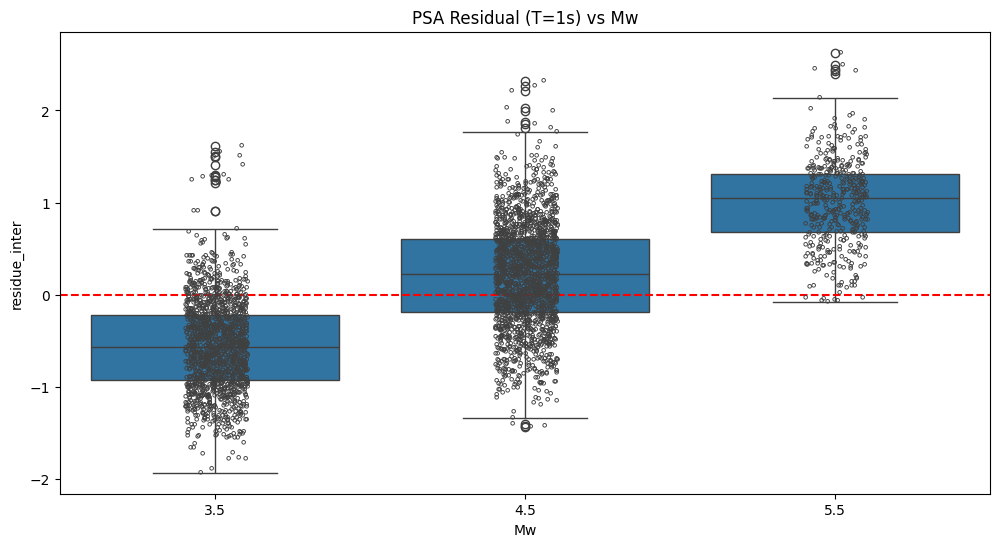

In [ ]:
import matplotlib.pyplot as plt
import pylab as P

num_intervals = int((XX['Earthquake Magnitude'].max() - XX['Earthquake Magnitude'].min())) + 1

fig, ax = plt.subplots(figsize = (12,6))

df1 = pd.DataFrame(columns = ['residue_inter', 'Mw'])

for i in range(num_intervals):
  start_dist = (i+3) * 1
  end_dist = start_dist + 1

  intervals_X = XX[(XX['Earthquake Magnitude'] >= start_dist) & (XX['Earthquake Magnitude'] < end_dist)]

  interval_data = residue_inter[(XX['Earthquake Magnitude'] >= start_dist) & (XX['Earthquake Magnitude'] < end_dist)]
  residue_intervals = interval_data['log PSA 1s']

  df2 = pd.DataFrame()
  df2['residue_inter']=residue_intervals
  df2['Mw']=(start_dist+end_dist)/2

  df1 = pd.concat([df1,df2], ignore_index=True)

ax = sns.stripplot(x="Mw", y="residue_inter", data=df1, ax= ax, marker="$\circ$", color=".25")
ax = sns.boxplot(x="Mw", y="residue_inter", data=df1, ax=ax)
ax.axhline(0, ls='--', color='r')

plt.title('PSA Residual (T=1s) vs Mw')
plt.show()

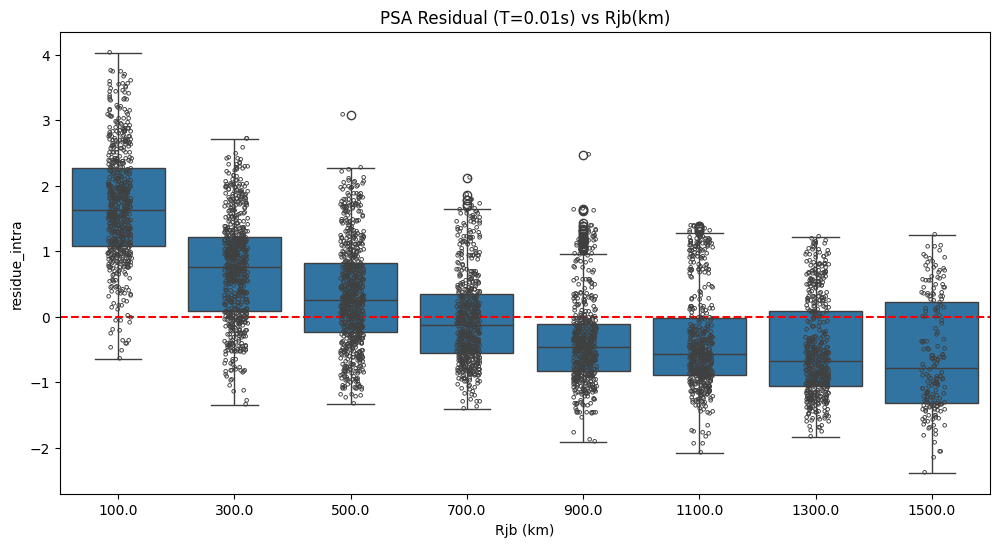

In [ ]:
import matplotlib.pyplot as plt
import pylab as P

num_intervals = int((XXX['Joyner-Boore Dist. (km)'].max() - XXX['Joyner-Boore Dist. (km)'].min()) / 200) + 1

fig, ax = plt.subplots(figsize = (12,6))

df1 = pd.DataFrame(columns = ['residue_intra', 'Rjb (km)'])

for i in range(num_intervals):
  start_dist = i * 200
  end_dist = start_dist + 200

  intervals_X = XXX[(XXX['Joyner-Boore Dist. (km)'] >= start_dist) & (XXX['Joyner-Boore Dist. (km)'] < end_dist)]

  interval_data = residue_intra[(XXX['Joyner-Boore Dist. (km)'] >= start_dist) & (XXX['Joyner-Boore Dist. (km)'] < end_dist)]
  residue_intervals = interval_data['log PSA 0.01s']

  df2 = pd.DataFrame()
  df2['residue_intra']=residue_intervals
  df2['Rjb (km)']=(start_dist+end_dist)/2

  df1 = pd.concat([df1,df2], ignore_index=True)

ax = sns.stripplot(x="Rjb (km)", y="residue_intra", data=df1, ax= ax, marker="$\circ$", color=".25")
ax = sns.boxplot(x="Rjb (km)", y="residue_intra", data=df1, ax=ax)
ax.axhline(0, ls='--', color='r')

# grid_size = 2  # Size of the grid
# block_size = 0.1  # Size of each block

# # Calculate the number of blocks needed in each dimension
# num_blocks = int(grid_size / block_size)

# # Create a grid
# grid = np.zeros((num_blocks, num_blocks))

# # Visualize the grid
# plt.imshow(grid, cmap='binary', interpolation='nearest', extent=[grid_size,1,1, -grid_size])
# plt.xticks(np.arange(0, grid_size+1, block_size))
# plt.yticks(np.arange(0, grid_size+1, block_size))
# plt.grid(color='black', linewidth=0.5)

plt.title('PSA Residual (T=0.01s) vs Rjb(km)')
plt.show()

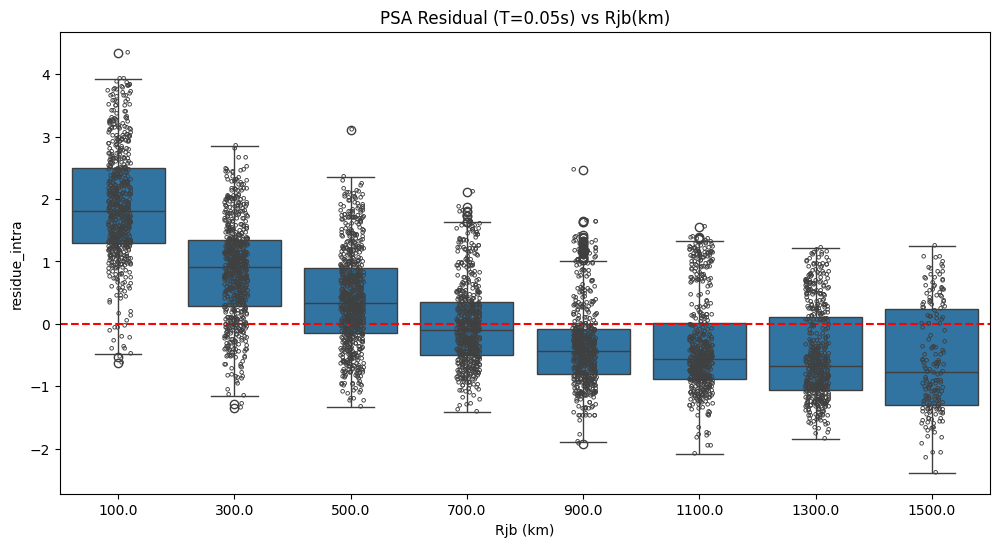

In [ ]:
import matplotlib.pyplot as plt
import pylab as P

num_intervals = int((XXX['Joyner-Boore Dist. (km)'].max() - XXX['Joyner-Boore Dist. (km)'].min()) / 200) + 1

fig, ax = plt.subplots(figsize = (12,6))

df1 = pd.DataFrame(columns = ['residue_intra', 'Rjb (km)'])

for i in range(num_intervals):
  start_dist = i * 200
  end_dist = start_dist + 200

  intervals_X = XXX[(XXX['Joyner-Boore Dist. (km)'] >= start_dist) & (XXX['Joyner-Boore Dist. (km)'] < end_dist)]

  interval_data = residue_intra[(XXX['Joyner-Boore Dist. (km)'] >= start_dist) & (XXX['Joyner-Boore Dist. (km)'] < end_dist)]
  residue_intervals = interval_data['log PSA 0.05s']

  df2 = pd.DataFrame()
  df2['residue_intra']=residue_intervals
  df2['Rjb (km)']=(start_dist+end_dist)/2

  df1 = pd.concat([df1,df2], ignore_index=True)

ax = sns.stripplot(x="Rjb (km)", y="residue_intra", data=df1, ax= ax, marker="$\circ$", color=".25")
ax = sns.boxplot(x="Rjb (km)", y="residue_intra", data=df1, ax=ax)
ax.axhline(0, ls='--', color='r')

# grid_size = 2  # Size of the grid
# block_size = 0.1  # Size of each block

# # Calculate the number of blocks needed in each dimension
# num_blocks = int(grid_size / block_size)

# # Create a grid
# grid = np.zeros((num_blocks, num_blocks))

# # Visualize the grid
# plt.imshow(grid, cmap='binary', interpolation='nearest', extent=[grid_size,1,1, -grid_size])
# plt.xticks(np.arange(0, grid_size+1, block_size))
# plt.yticks(np.arange(0, grid_size+1, block_size))
# plt.grid(color='black', linewidth=0.5)

plt.title('PSA Residual (T=0.05s) vs Rjb(km)')
plt.show()

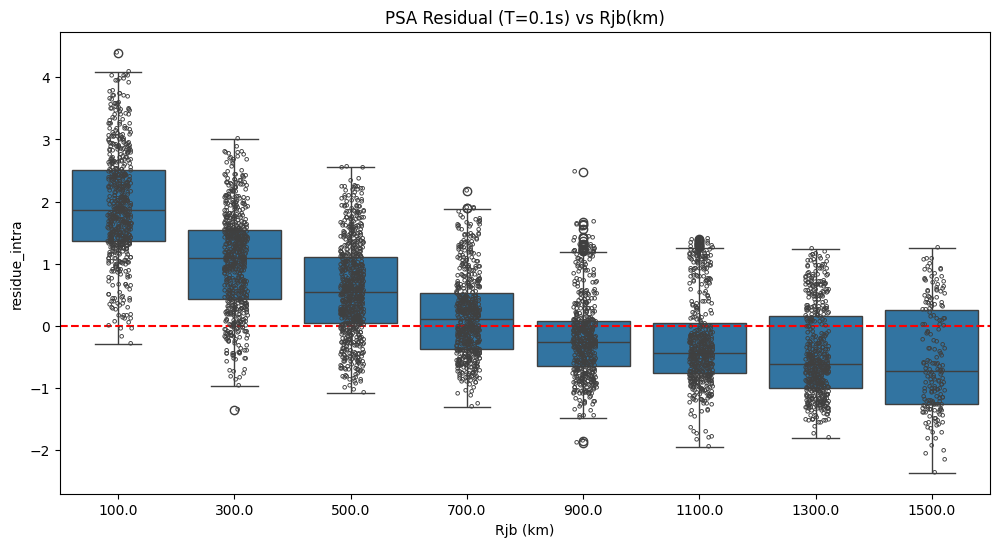

In [ ]:
import matplotlib.pyplot as plt
import pylab as P

num_intervals = int((XXX['Joyner-Boore Dist. (km)'].max() - XXX['Joyner-Boore Dist. (km)'].min()) / 200) + 1

fig, ax = plt.subplots(figsize = (12,6))

df1 = pd.DataFrame(columns = ['residue_intra', 'Rjb (km)'])

for i in range(num_intervals):
  start_dist = i * 200
  end_dist = start_dist + 200

  intervals_X = XXX[(XXX['Joyner-Boore Dist. (km)'] >= start_dist) & (XXX['Joyner-Boore Dist. (km)'] < end_dist)]

  interval_data = residue_intra[(XXX['Joyner-Boore Dist. (km)'] >= start_dist) & (XXX['Joyner-Boore Dist. (km)'] < end_dist)]
  residue_intervals = interval_data['log PSA 0.1s']

  df2 = pd.DataFrame()
  df2['residue_intra']=residue_intervals
  df2['Rjb (km)']=(start_dist+end_dist)/2

  df1 = pd.concat([df1,df2], ignore_index=True)

ax = sns.stripplot(x="Rjb (km)", y="residue_intra", data=df1, ax= ax, marker="$\circ$", color=".25")
ax = sns.boxplot(x="Rjb (km)", y="residue_intra", data=df1, ax=ax)
ax.axhline(0, ls='--', color='r')

# grid_size = 2  # Size of the grid
# block_size = 0.1  # Size of each block

# # Calculate the number of blocks needed in each dimension
# num_blocks = int(grid_size / block_size)

# # Create a grid
# grid = np.zeros((num_blocks, num_blocks))

# # Visualize the grid
# plt.imshow(grid, cmap='binary', interpolation='nearest', extent=[grid_size,1,1, -grid_size])
# plt.xticks(np.arange(0, grid_size+1, block_size))
# plt.yticks(np.arange(0, grid_size+1, block_size))
# plt.grid(color='black', linewidth=0.5)

plt.title('PSA Residual (T=0.1s) vs Rjb(km)')
plt.show()

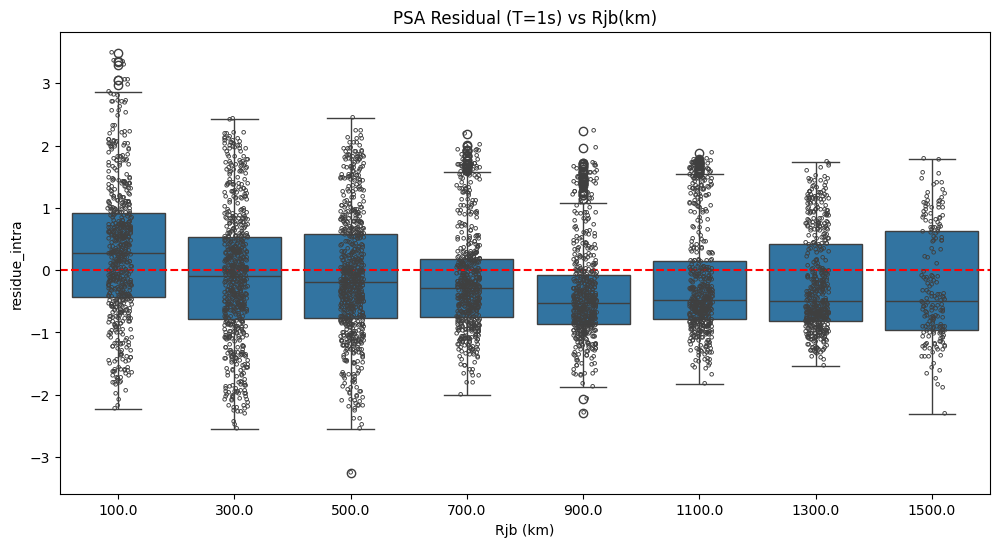

In [ ]:
import matplotlib.pyplot as plt
import pylab as P

num_intervals = int((XXX['Joyner-Boore Dist. (km)'].max() - XXX['Joyner-Boore Dist. (km)'].min()) / 200) + 1

fig, ax = plt.subplots(figsize = (12,6))

df1 = pd.DataFrame(columns = ['residue_intra', 'Rjb (km)'])

for i in range(num_intervals):
  start_dist = i * 200
  end_dist = start_dist + 200

  intervals_X = XXX[(XXX['Joyner-Boore Dist. (km)'] >= start_dist) & (XXX['Joyner-Boore Dist. (km)'] < end_dist)]

  interval_data = residue_intra[(XXX['Joyner-Boore Dist. (km)'] >= start_dist) & (XXX['Joyner-Boore Dist. (km)'] < end_dist)]
  residue_intervals = interval_data['log PSA 1s']

  df2 = pd.DataFrame()
  df2['residue_intra']=residue_intervals
  df2['Rjb (km)']=(start_dist+end_dist)/2

  df1 = pd.concat([df1,df2], ignore_index=True)

ax = sns.stripplot(x="Rjb (km)", y="residue_intra", data=df1, ax= ax, marker="$\circ$", color=".25")
ax = sns.boxplot(x="Rjb (km)", y="residue_intra", data=df1, ax=ax)
ax.axhline(0, ls='--', color='r')

# grid_size = 2  # Size of the grid
# block_size = 0.1  # Size of each block

# # Calculate the number of blocks needed in each dimension
# num_blocks = int(grid_size / block_size)

# # Create a grid
# grid = np.zeros((num_blocks, num_blocks))

# # Visualize the grid
# plt.imshow(grid, cmap='binary', interpolation='nearest', extent=[grid_size,1,1, -grid_size])
# plt.xticks(np.arange(0, grid_size+1, block_size))
# plt.yticks(np.arange(0, grid_size+1, block_size))
# plt.grid(color='black', linewidth=0.5)

plt.title('PSA Residual (T=1s) vs Rjb(km)')
plt.show()

# **VAE**

In [ ]:
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras import backend as K
from keras.losses import mse


In [ ]:

# Define VAE architecture


# def leaky_relu(x, alpha=0.2):
#     return tf.maximum(alpha * x, x)

def create_vae(input_dim, latent_dim, intermediate_dim,intermediate_dim_1,intermediate_dim_2,intermediate_dim_3):

    input_layer = Input(shape=(input_dim,))

    x = Dense(intermediate_dim, activation='relu')(input_layer)
    x = Dense(intermediate_dim_1, activation='relu')(x)
    x = Dense(intermediate_dim_2, activation='relu')(x)
    x = Dense(intermediate_dim_3, activation='relu')(x)
    # x = Dense(intermediate_dim_4, activation='sigmoid')(x)
    # x = Dense(intermediate_dim_5, activation='sigmoid')(x)
    # x = Dense(intermediate_dim_6, activation='sigmoid')(x)



    z_mean = Dense(latent_dim)(x)
    z_log_var = Dense(latent_dim)(x)


    def sampling(args):
        z_mean, z_log_var = args
        epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0.0, stddev=1.0)
        return z_mean + K.exp(0.5 * z_log_var) * epsilon


    z = Lambda(sampling)([z_mean, z_log_var])


    # decoder_h = Dense(intermediate_dim_6, activation='sigmoid')
    # decoder_h = Dense(intermediate_dim_5, activation='sigmoid')
    # decoder_h = Dense(intermediate_dim_4, activation='sigmoid')
    decoder_h = Dense(intermediate_dim_3, activation='relu')
    decoder_h = Dense(intermediate_dim_2, activation='relu')
    decoder_h = Dense(intermediate_dim_1, activation='relu')
    decoder_h = Dense(intermediate_dim, activation='relu')
    decoder_mean = Dense(input_dim, name='decoder_output')  # Output layer with name 'decoder_output'

    h_decoded = decoder_h(z)
    x_decoded_mean = decoder_mean(h_decoded)


    vae = Model(input_layer, x_decoded_mean)


    reconstruction_loss = mse(K.flatten(input_layer), K.flatten(x_decoded_mean))
    kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)

    vae_loss = K.mean(reconstruction_loss + 0.1*kl_loss)
    # vae_loss = K.mean(reconstruction_loss)
    vae.add_loss(vae_loss)

    return vae, z_mean, z_log_var

# Example usage:
input_dim = y_train.shape[1]  # Dimension of input and output
latent_dim = 3   # Dimension of latent space
intermediate_dim = 10  # Dimension of intermediate layer
intermediate_dim_1 = 8
intermediate_dim_2 = 6
intermediate_dim_3 = 5
# intermediate_dim_6 = 4

vae, z_mean, z_log_var = create_vae(input_dim, latent_dim, intermediate_dim,intermediate_dim_1,intermediate_dim_2,intermediate_dim_3)
vae.compile(optimizer='adam', metrics = ['R2Score'])
# vae.compile(optimizer='adam', loss='mse', metrics = ['R2Score'])
vae.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 25)]                 0         []                            
                                                                                                  
 dense_14 (Dense)            (None, 10)                   260       ['input_3[0][0]']             
                                                                                                  
 dense_15 (Dense)            (None, 8)                    88        ['dense_14[0][0]']            
                                                                                                  
 dense_16 (Dense)            (None, 6)                    54        ['dense_15[0][0]']            
                                                                                            

In [ ]:
vae.fit(y_train, y_train, epochs=300, batch_size=32, validation_data=(y_val,y_val))
vae.save('/content/drive/My Drive/SEISMIC MODELS/vae.h5')

Epoch 1/300
215/215 [==============================] - 4s 8ms/step - loss: 9.1943 - r2_score: -8.0175 - val_loss: 2.2191 - val_r2_score: -0.2236
Epoch 2/300
215/215 [==============================] - 1s 5ms/step - loss: 1.3174 - r2_score: 0.4981 - val_loss: 0.8442 - val_r2_score: 0.6179
Epoch 3/300
215/215 [==============================] - 1s 5ms/step - loss: 0.7400 - r2_score: 0.6771 - val_loss: 0.6267 - val_r2_score: 0.6876
Epoch 4/300
215/215 [==============================] - 2s 8ms/step - loss: 0.5959 - r2_score: 0.7182 - val_loss: 0.5335 - val_r2_score: 0.7421
Epoch 5/300
215/215 [==============================] - 2s 8ms/step - loss: 0.5411 - r2_score: 0.7371 - val_loss: 0.5272 - val_r2_score: 0.7021
Epoch 6/300
215/215 [==============================] - 2s 8ms/step - loss: 0.5116 - r2_score: 0.7478 - val_loss: 0.4811 - val_r2_score: 0.7519
Epoch 7/300
215/215 [==============================] - 1s 5ms/step - loss: 0.4972 - r2_score: 0.7545 - val_loss: 0.4683 - val_r2_score: 0.76

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
vae = tf.keras.models.load_model('/content/drive/My Drive/SEISMIC MODELS/vae.h5')

In [ ]:
# import numpy as np
y_pred_a = model_ann.predict(X)
y_pred_c = [f"log PSA {i}s" for i in t]
# y_pred_c = y_pred_a[:,[0,4,9,18]]
y_pred_c.append("log PGA");
y_pred_c.append("log PGV")
y_pred = pd.DataFrame(y_pred_a, columns=y_pred_c)

y_pred_a = vae.predict(y_pred)
y_pred_c = [f"log PSA {i}s" for i in t]
y_pred_c.append("log PGA")
y_pred_c.append("log PGV")
y_pred = pd.DataFrame(y_pred_a, columns=y_pred_c)

253/253 [==============================] - 1s 3ms/step


In [ ]:
from sklearn.metrics import r2_score

# Calculate R^2 score for the first dataframe
r2_score_1 = r2_score(Y,y_pred)


print("R^2 score for dataframe 1:", r2_score_1)


R^2 score for dataframe 1: 0.6808707000395365


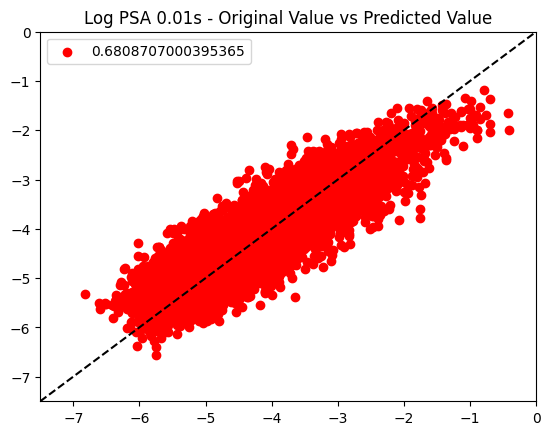

In [ ]:
plt.scatter(Y['log PSA 0.01s'], y_pred['log PSA 0.01s'], color = 'r', label = r2_score_1)
x = np.linspace(-7.5, 0, 1000)
plt.plot(x, x, color = 'black', linestyle = '--')
plt.xlim(-7.5, 0)
plt.ylim(-7.5, 0)
plt.legend()
plt.title('Log PSA 0.01s - Original Value vs Predicted Value')
plt.show()

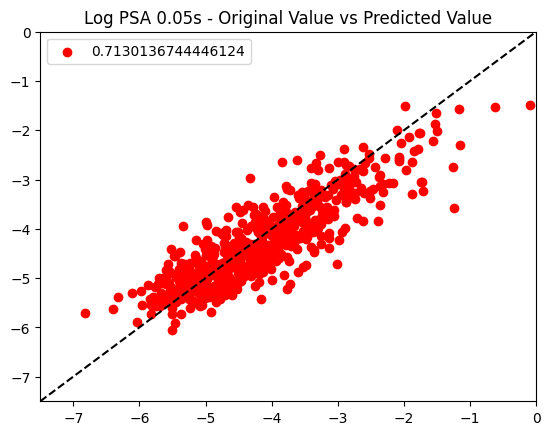

In [ ]:
plt.scatter(y_test['log PSA 0.05s'], y_pred['log PSA 0.05s'], color = 'r', label = r2_score_1)
x = np.linspace(-7.5, 0, 1000)
plt.plot(x, x, color = 'black', linestyle = '--')
plt.xlim(-7.5, 0)
plt.ylim(-7.5, 0)
plt.legend()

plt.title('Log PSA 0.05s - Original Value vs Predicted Value')
plt.show()

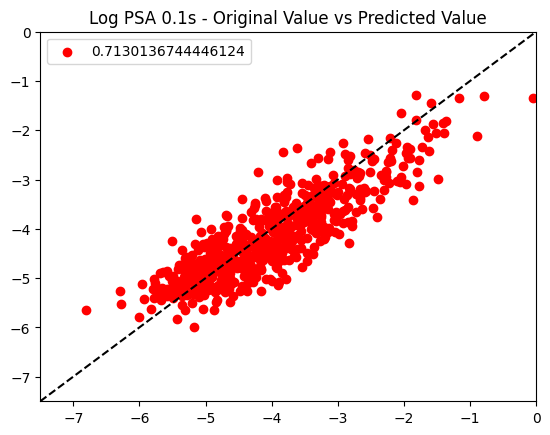

In [ ]:
plt.scatter(y_test['log PSA 0.1s'], y_pred['log PSA 0.1s'], color = 'r', label = r2_score_1)
x = np.linspace(-7.5, 0, 1000)
plt.plot(x, x, color = 'black', linestyle = '--')
plt.xlim(-7.5, 0)
plt.ylim(-7.5, 0)
plt.legend()

plt.title('Log PSA 0.1s - Original Value vs Predicted Value')
plt.show()

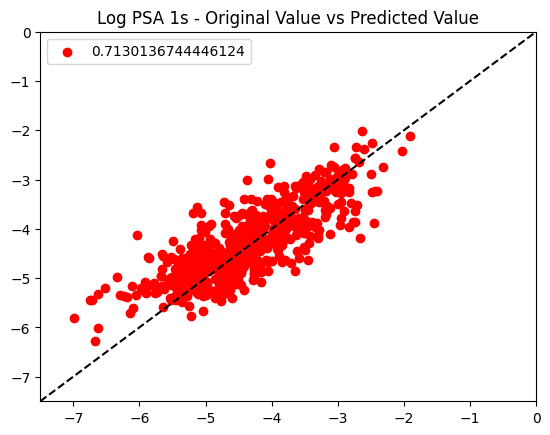

In [ ]:
plt.scatter(y_test['log PSA 1s'], y_pred['log PSA 1s'], color = 'r', label = r2_score_1)
x = np.linspace(-7.5, 0, 1000)
plt.plot(x, x, color = 'black', linestyle = '--')
plt.xlim(-7.5, 0)
plt.ylim(-7.5, 0)
plt.legend()

plt.title('Log PSA 1s - Original Value vs Predicted Value')
plt.show()

1/1 [==============================] - 0s 76ms/step


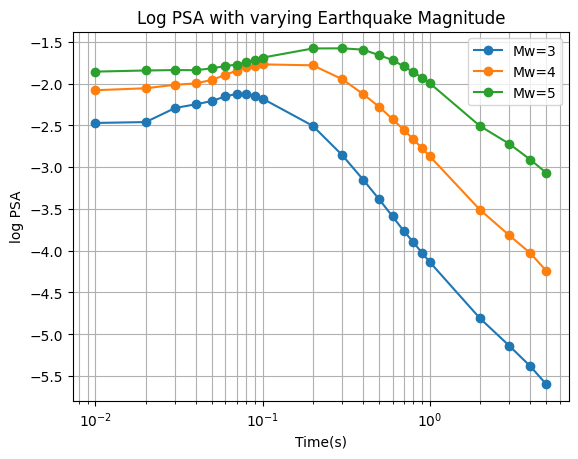

In [ ]:
l=[]

rjb = 10
focal = 1

r = [3,rjb,np.log10(rjb),focal,760]
r1 = [4,rjb,np.log10(rjb),focal, 760]
r2 = [5,rjb,np.log10(rjb),focal, 760]
# r3 = [6,np.log10(10), 760]

l.append(r)
l.append(r1)
l.append(r2)
# l.append(r3)

l = np.asarray(l)

rp = model_ann.predict(l)

prs = vae.predict(rp)

plt.plot(t, prs[0][2:], "-o", label='Mw=3')
plt.plot(t, prs[1][2:], "-o", label='Mw=4')
plt.plot(t, prs[2][2:], "-o", label='Mw=5')
# plt.plot(t, prs[3][2:], "-o", label='Mw=6')

plt.xlabel('Time(s)')
plt.ylabel('log PSA')
plt.xscale('log')
plt.grid(True, which = 'both')
plt.title('Log PSA with varying Earthquake Magnitude')

plt.legend()

1/1 [==============================] - 0s 37ms/step


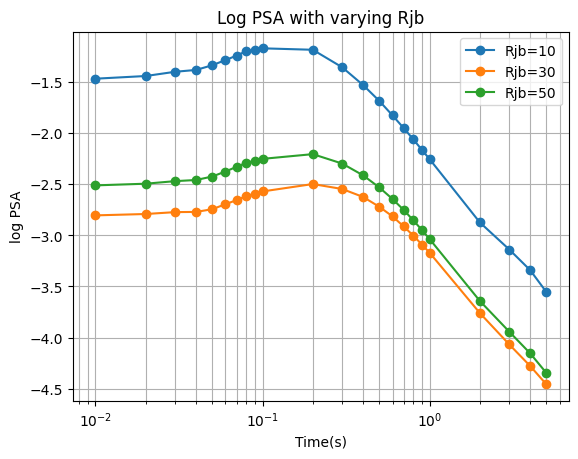

In [ ]:
l=[]

rjb = [10,30,50]
focal = 0

r1 = [4,rjb[0], np.log10(rjb[0]),focal, 760]
r2 = [4,rjb[1], np.log10(rjb[1]),focal, 760]
r3 = [4,rjb[2], np.log10(rjb[2]),focal, 760]

l.append(r1)
l.append(r2)
l.append(r3)

l = np.asarray(l)

rp = model_ann.predict(l)

prs = vae.predict(rp)

plt.plot(t, prs[0][2:], "-o", label='Rjb=10')
plt.plot(t, prs[1][2:], "-o", label='Rjb=30')
plt.plot(t, prs[2][2:], "-o", label='Rjb=50')

plt.xlabel('Time(s)')
plt.ylabel('log PSA')
plt.xscale('log')
plt.grid(True, which = 'both')

plt.title('Log PSA with varying Rjb')

plt.legend()

1/1 [==============================] - 0s 87ms/step


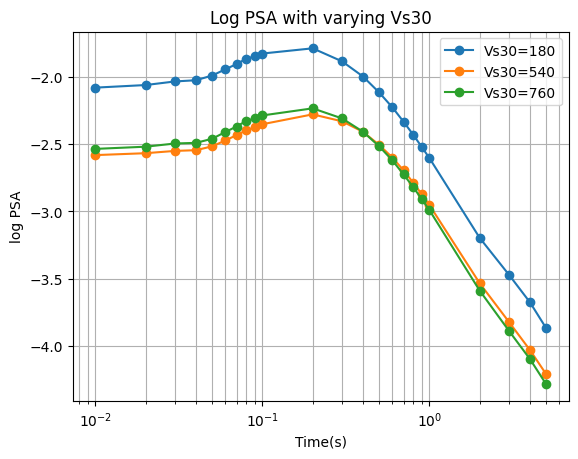

In [ ]:
l=[]

rjb = 20
focal = 1

r1 = [4,rjb, np.log10(rjb),focal, 180]
r2 = [4,rjb, np.log10(rjb),focal, 540]
r3 = [4,rjb, np.log10(rjb),focal, 760]

l.append(r1)
l.append(r2)
l.append(r3)

l = np.asarray(l)

rp = model_ann.predict(l)

prs = vae.predict(rp)

plt.plot(t, prs[0][2:], "-o", label='Vs30=180')
plt.plot(t, prs[1][2:], "-o", label='Vs30=540')
plt.plot(t, prs[2][2:], "-o", label='Vs30=760')

plt.xlabel('Time(s)')
plt.ylabel('log PSA')
plt.xscale('log')
plt.grid(True, which = 'both')

plt.title('Log PSA with varying Vs30')

plt.legend()

4/4 [==============================] - 0s 5ms/step


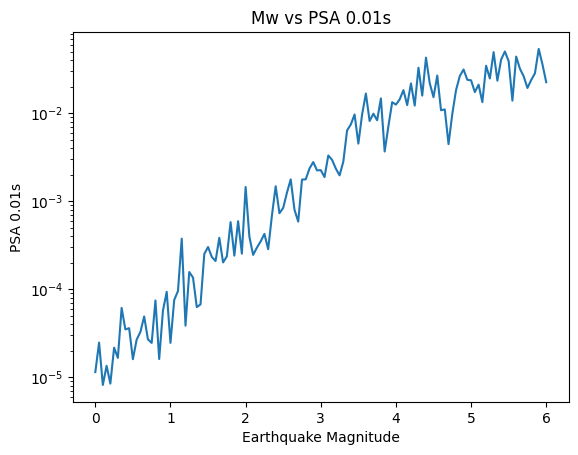

In [ ]:
l = []

rjb = 10
focal = 1

mw = np.arange(0,6.05,0.05)
for m in  mw:
  r = [m,rjb,np.log10(rjb),focal,760]
  l.append(r)


l = np.asarray(l)

rp = model_ann.predict(l)

prs = vae.predict(rp)

# prs = np.mean(prs, axis = 0)

plt.plot(l[:, 0], 10**prs[:, 2])
plt.xlabel('Earthquake Magnitude')
plt.ylabel('PSA 0.01s')
plt.yscale('log')
plt.title('Mw vs PSA 0.01s')
plt.show()

4/4 [==============================] - 0s 7ms/step


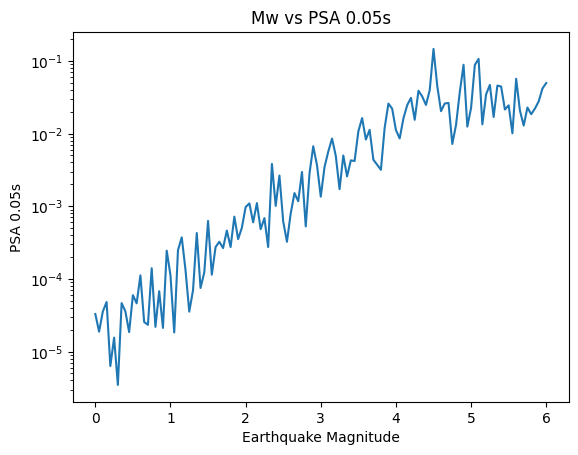

In [ ]:
l = []

rjb = 10
focal = 1

mw = np.arange(0,6.05,0.05)
for m in  mw:
  r = [m,rjb,np.log10(rjb),focal,760]
  l.append(r)

l = np.asarray(l)

rp = model_ann.predict(l)

prs = vae.predict(rp)

plt.plot(l[:, 0], 10**prs[:, 6])
plt.xlabel('Earthquake Magnitude')
plt.ylabel('PSA 0.05s')
plt.yscale('log')
plt.title('Mw vs PSA 0.05s')
plt.show()

4/4 [==============================] - 0s 6ms/step


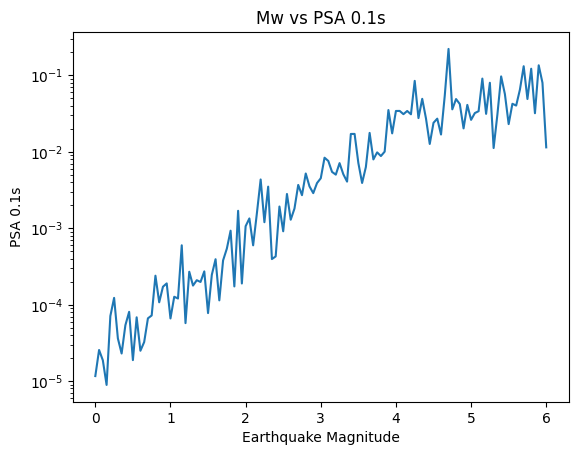

In [ ]:
l = []

rjb = 10
focal = 1

mw = np.arange(0,6.05,0.05)
for m in  mw:
  r = [m,rjb,np.log10(rjb),focal,760]
  l.append(r)


l = np.asarray(l)

rp = model_ann.predict(l)

prs = vae.predict(rp)

plt.plot(l[:, 0], 10**prs[:, 11])
plt.xlabel('Earthquake Magnitude')
plt.ylabel('PSA 0.1s')
plt.yscale('log')
plt.title('Mw vs PSA 0.1s')
plt.show()

4/4 [==============================] - 0s 6ms/step


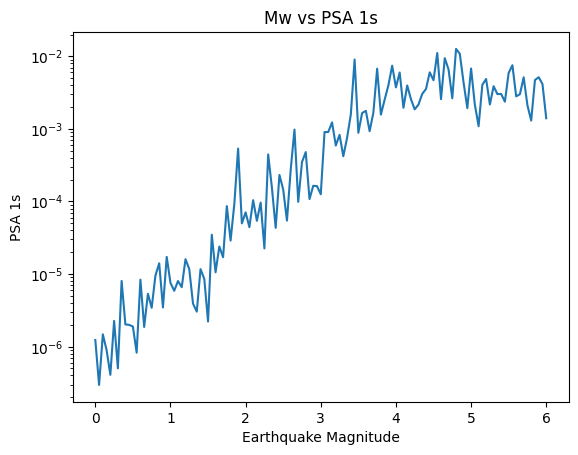

In [ ]:
l = []

rjb = 10
focal = 1

mw = np.arange(0,6.05,0.05)
for m in  mw:
  r = [m,rjb,np.log10(rjb),focal,760]
  l.append(r)

l = np.asarray(l)

rp = model_ann.predict(l)

prs = vae.predict(rp)

plt.plot(l[:, 0], 10**prs[:, 20])
plt.xlabel('Earthquake Magnitude')
plt.ylabel('PSA 1s')
plt.yscale('log')
plt.title('Mw vs PSA 1s')
plt.show()

7/7 [==============================] - 0s 6ms/step


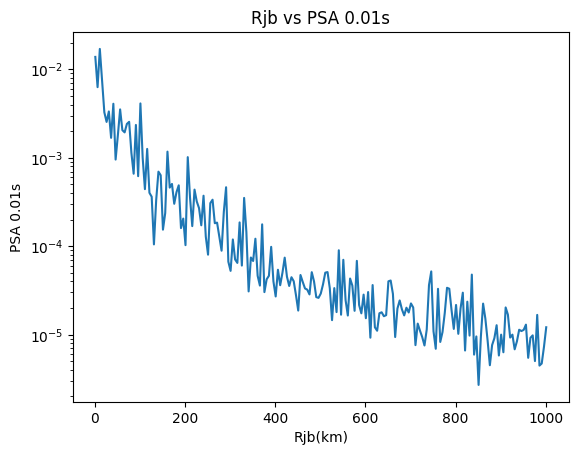

In [ ]:
l = []

rjb = np.arange(1,1005,5)


for d in rjb:
  r = [4,d,np.log10(d),1,760]
  l.append(r)

l = np.asarray(l)

rp = model_ann.predict(l)

prs = vae.predict(rp)

plt.plot(l[:, 1], 10**prs[:, 2])
plt.xlabel('Rjb(km)')
plt.ylabel('PSA 0.01s')
plt.yscale('log')
plt.title('Rjb vs PSA 0.01s')
plt.show()

7/7 [==============================] - 0s 4ms/step


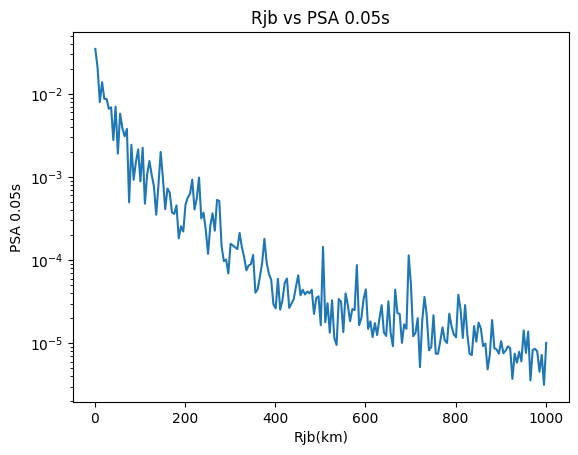

In [ ]:
l = []

rjb = np.arange(1,1005,5)

for d in rjb:
  r = [4,d,np.log10(d),1,760]
  l.append(r)

l = np.asarray(l)

rp = model_ann.predict(l)

prs = vae.predict(rp)

plt.plot(l[:, 1], 10**prs[:, 6])
plt.xlabel('Rjb(km)')
plt.ylabel('PSA 0.05s')
plt.yscale('log')
plt.title('Rjb vs PSA 0.05s')
plt.show()

7/7 [==============================] - 0s 6ms/step


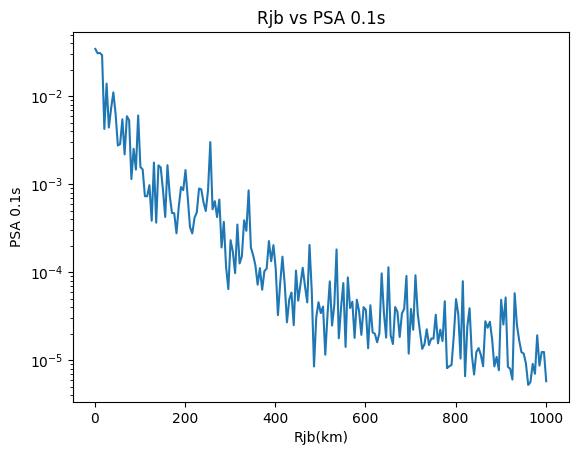

In [ ]:
l = []

rjb = np.arange(1,1005,5)

for d in rjb:
  r = [4,d,np.log10(d),1,760]
  l.append(r)

l = np.asarray(l)

rp = model_ann.predict(l)

prs = vae.predict(rp)

plt.plot(l[:, 1], 10**prs[:, 11])
plt.xlabel('Rjb(km)')
plt.ylabel('PSA 0.1s')
plt.yscale('log')
plt.title('Rjb vs PSA 0.1s')
plt.show()

7/7 [==============================] - 0s 2ms/step


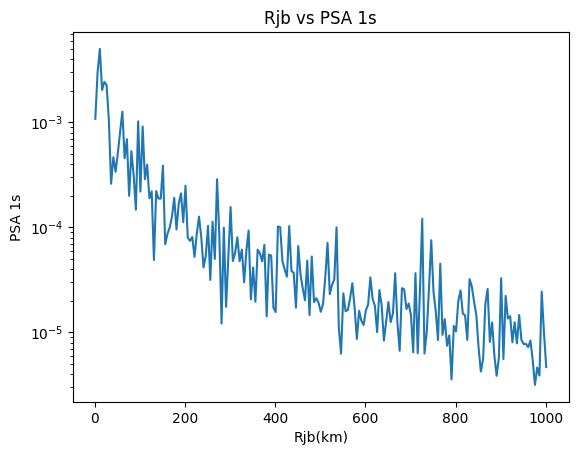

In [ ]:
l = []

rjb = np.arange(1,1005,5)

for d in rjb:
  r = [4,d,np.log10(d),1,760]
  l.append(r)

l = np.asarray(l)

rp = model_ann.predict(l)

prs = vae.predict(rp)

plt.plot(l[:, 1], 10**prs[:, 20])
plt.xlabel('Rjb(km)')
plt.ylabel('PSA 1s')
plt.yscale('log')
plt.title('Rjb vs PSA 1s')
plt.show()

In [ ]:
inter_y = vae.predict(inter_y_pred)
intra_y = vae.predict(intra_y_pred)

residue_inter = yy - inter_y
residue_intra = yyy - intra_y

133/133 [==============================] - 1s 6ms/step


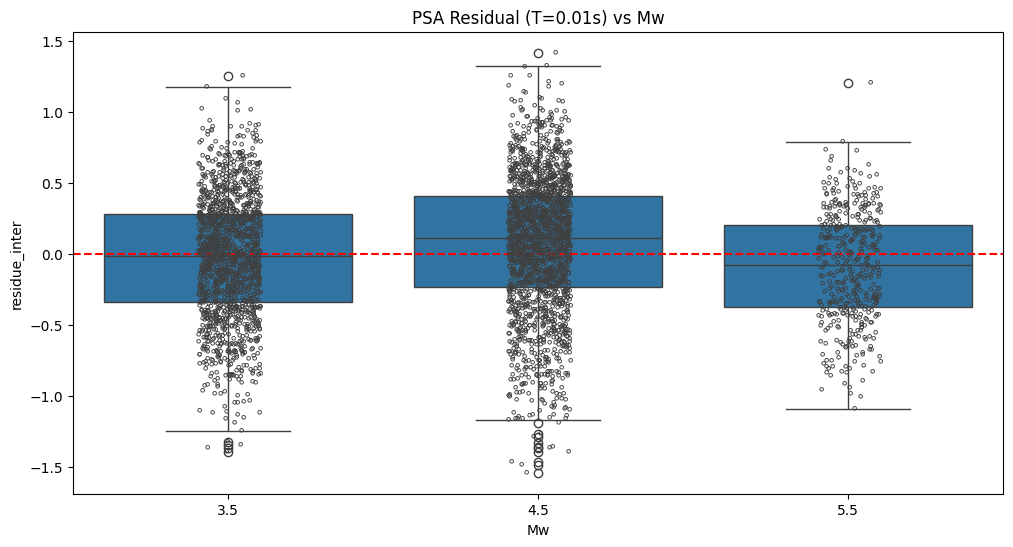

In [ ]:
import matplotlib.pyplot as plt
import pylab as P

num_intervals = int((XX['Earthquake Magnitude'].max() - XX['Earthquake Magnitude'].min())) + 1

fig, ax = plt.subplots(figsize = (12,6))

df1 = pd.DataFrame(columns = ['residue_inter', 'Mw'])

for i in range(num_intervals):
  start_dist = (i+3) * 1
  end_dist = start_dist + 1

  intervals_X = XX[(XX['Earthquake Magnitude'] >= start_dist) & (XX['Earthquake Magnitude'] < end_dist)]

  interval_data = residue_inter[(XX['Earthquake Magnitude'] >= start_dist) & (XX['Earthquake Magnitude'] < end_dist)]
  residue_intervals = interval_data['log PSA 0.01s']

  df2 = pd.DataFrame()
  df2['residue_inter']=residue_intervals
  df2['Mw']=(start_dist+end_dist)/2

  df1 = pd.concat([df1,df2], ignore_index=True)

ax = sns.stripplot(x="Mw", y="residue_inter", data=df1, ax= ax, marker="$\circ$", color=".25")
ax = sns.boxplot(x="Mw", y="residue_inter", data=df1, ax=ax)
ax.axhline(0, ls='--', color='r')

plt.title('PSA Residual (T=0.01s) vs Mw')
plt.show()

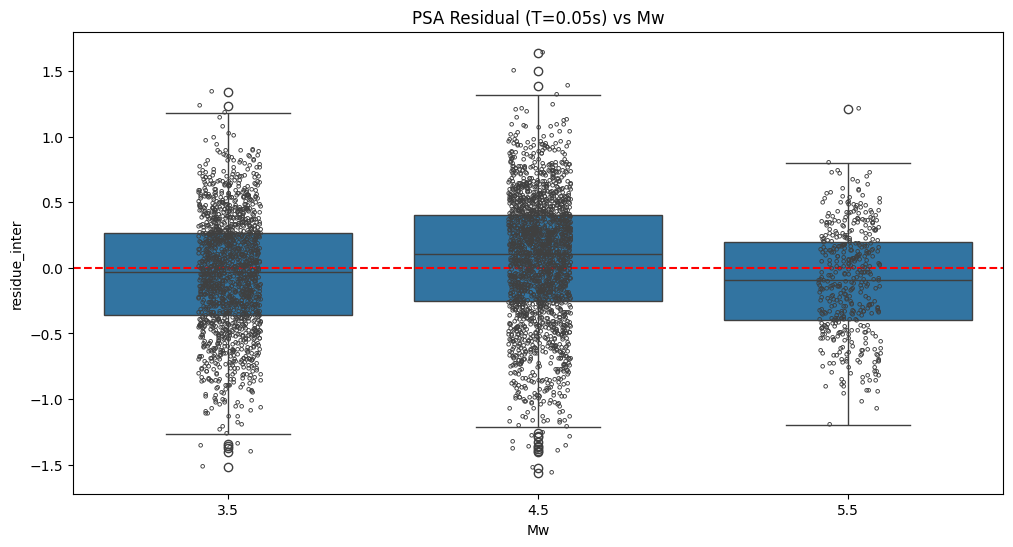

In [ ]:
import matplotlib.pyplot as plt
import pylab as P

num_intervals = int((XX['Earthquake Magnitude'].max() - XX['Earthquake Magnitude'].min())) + 1

fig, ax = plt.subplots(figsize = (12,6))

df1 = pd.DataFrame(columns = ['residue_inter', 'Mw'])

for i in range(num_intervals):
  start_dist = (i+3) * 1
  end_dist = start_dist + 1

  intervals_X = XX[(XX['Earthquake Magnitude'] >= start_dist) & (XX['Earthquake Magnitude'] < end_dist)]

  interval_data = residue_inter[(XX['Earthquake Magnitude'] >= start_dist) & (XX['Earthquake Magnitude'] < end_dist)]
  residue_intervals = interval_data['log PSA 0.05s']

  df2 = pd.DataFrame()
  df2['residue_inter']=residue_intervals
  df2['Mw']=(start_dist+end_dist)/2

  df1 = pd.concat([df1,df2], ignore_index=True)

ax = sns.stripplot(x="Mw", y="residue_inter", data=df1, ax= ax, marker="$\circ$", color=".25")
ax = sns.boxplot(x="Mw", y="residue_inter", data=df1, ax=ax)
ax.axhline(0, ls='--', color='r')

plt.title('PSA Residual (T=0.05s) vs Mw')
plt.show()

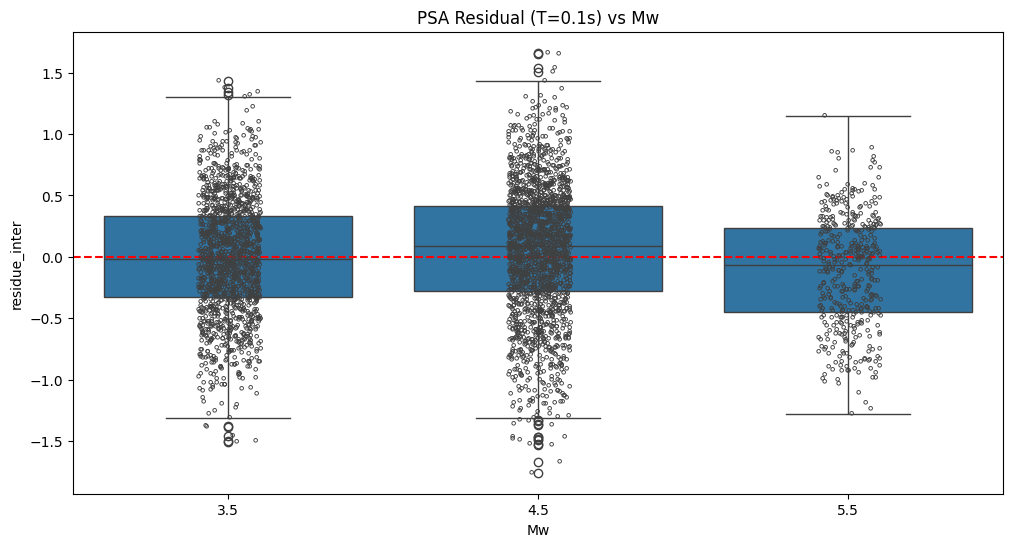

In [ ]:
import matplotlib.pyplot as plt
import pylab as P

num_intervals = int((XX['Earthquake Magnitude'].max() - XX['Earthquake Magnitude'].min())) + 1

fig, ax = plt.subplots(figsize = (12,6))

df1 = pd.DataFrame(columns = ['residue_inter', 'Mw'])

for i in range(num_intervals):
  start_dist = (i+3) * 1
  end_dist = start_dist + 1

  intervals_X = XX[(XX['Earthquake Magnitude'] >= start_dist) & (XX['Earthquake Magnitude'] < end_dist)]

  interval_data = residue_inter[(XX['Earthquake Magnitude'] >= start_dist) & (XX['Earthquake Magnitude'] < end_dist)]
  residue_intervals = interval_data['log PSA 0.1s']

  df2 = pd.DataFrame()
  df2['residue_inter']=residue_intervals
  df2['Mw']=(start_dist+end_dist)/2

  df1 = pd.concat([df1,df2], ignore_index=True)

ax = sns.stripplot(x="Mw", y="residue_inter", data=df1, ax= ax, marker="$\circ$", color=".25")
ax = sns.boxplot(x="Mw", y="residue_inter", data=df1, ax=ax)
ax.axhline(0, ls='--', color='r')

plt.title('PSA Residual (T=0.1s) vs Mw')
plt.show()

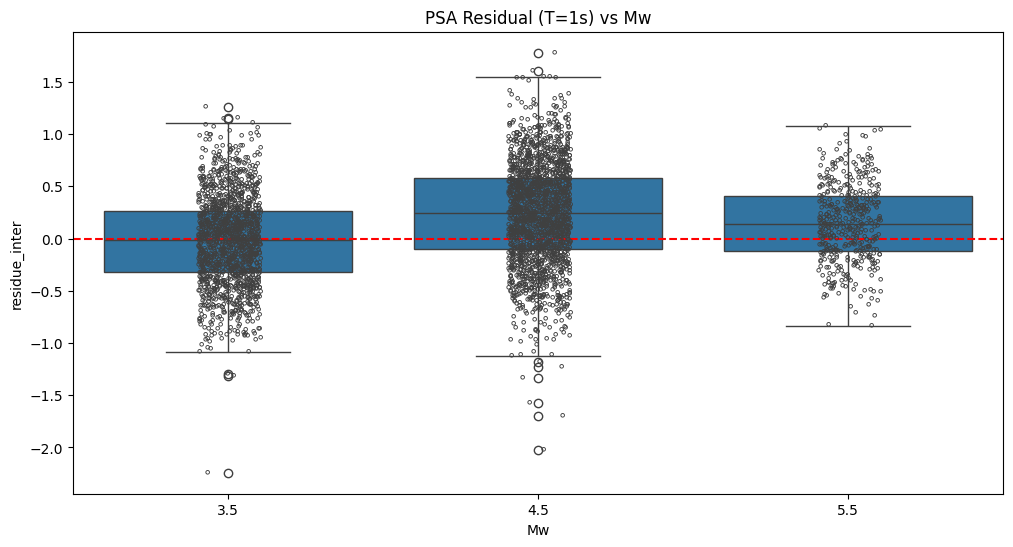

In [ ]:
import matplotlib.pyplot as plt
import pylab as P

num_intervals = int((XX['Earthquake Magnitude'].max() - XX['Earthquake Magnitude'].min())) + 1

fig, ax = plt.subplots(figsize = (12,6))

df1 = pd.DataFrame(columns = ['residue_inter', 'Mw'])

for i in range(num_intervals):
  start_dist = (i+3) * 1
  end_dist = start_dist + 1

  intervals_X = XX[(XX['Earthquake Magnitude'] >= start_dist) & (XX['Earthquake Magnitude'] < end_dist)]

  interval_data = residue_inter[(XX['Earthquake Magnitude'] >= start_dist) & (XX['Earthquake Magnitude'] < end_dist)]
  residue_intervals = interval_data['log PSA 1s']

  df2 = pd.DataFrame()
  df2['residue_inter']=residue_intervals
  df2['Mw']=(start_dist+end_dist)/2

  df1 = pd.concat([df1,df2], ignore_index=True)

ax = sns.stripplot(x="Mw", y="residue_inter", data=df1, ax= ax, marker="$\circ$", color=".25")
ax = sns.boxplot(x="Mw", y="residue_inter", data=df1, ax=ax)
ax.axhline(0, ls='--', color='r')

plt.title('PSA Residual (T=1s) vs Mw')
plt.show()

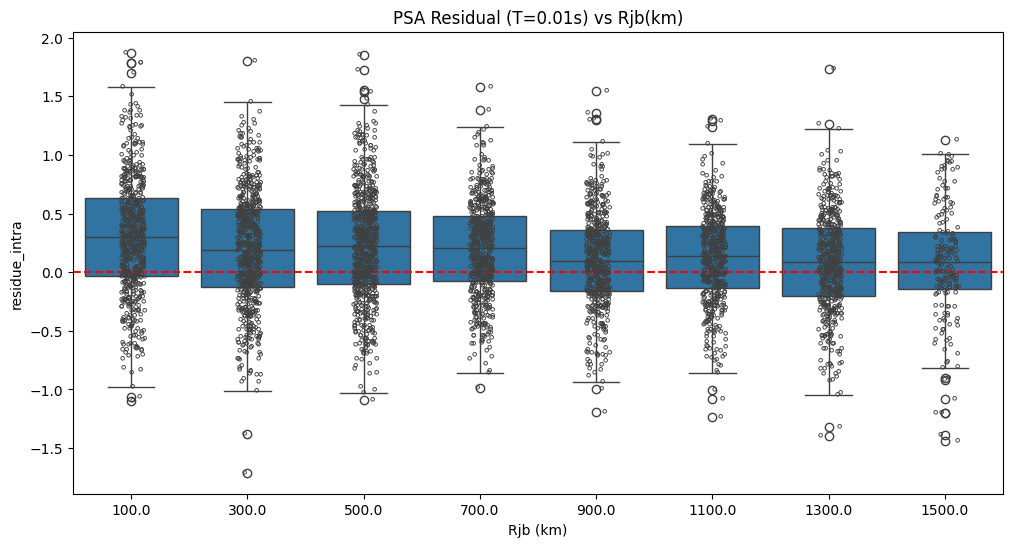

In [ ]:
import matplotlib.pyplot as plt
import pylab as P

num_intervals = int((XXX['Joyner-Boore Dist. (km)'].max() - XXX['Joyner-Boore Dist. (km)'].min()) / 200) + 1

fig, ax = plt.subplots(figsize = (12,6))

df1 = pd.DataFrame(columns = ['residue_intra', 'Rjb (km)'])

for i in range(num_intervals):
  start_dist = i * 200
  end_dist = start_dist + 200

  intervals_X = XXX[(XXX['Joyner-Boore Dist. (km)'] >= start_dist) & (XXX['Joyner-Boore Dist. (km)'] < end_dist)]

  interval_data = residue_intra[(XXX['Joyner-Boore Dist. (km)'] >= start_dist) & (XXX['Joyner-Boore Dist. (km)'] < end_dist)]
  residue_intervals = interval_data['log PSA 0.01s']

  df2 = pd.DataFrame()
  df2['residue_intra']=residue_intervals
  df2['Rjb (km)']=(start_dist+end_dist)/2

  df1 = pd.concat([df1,df2], ignore_index=True)

ax = sns.stripplot(x="Rjb (km)", y="residue_intra", data=df1, ax= ax, marker="$\circ$", color=".25")
ax = sns.boxplot(x="Rjb (km)", y="residue_intra", data=df1, ax=ax)
ax.axhline(0, ls='--', color='r')

# grid_size = 2  # Size of the grid
# block_size = 0.1  # Size of each block

# # Calculate the number of blocks needed in each dimension
# num_blocks = int(grid_size / block_size)

# # Create a grid
# grid = np.zeros((num_blocks, num_blocks))

# # Visualize the grid
# plt.imshow(grid, cmap='binary', interpolation='nearest', extent=[grid_size,1,1, -grid_size])
# plt.xticks(np.arange(0, grid_size+1, block_size))
# plt.yticks(np.arange(0, grid_size+1, block_size))
# plt.grid(color='black', linewidth=0.5)

plt.title('PSA Residual (T=0.01s) vs Rjb(km)')
plt.show()

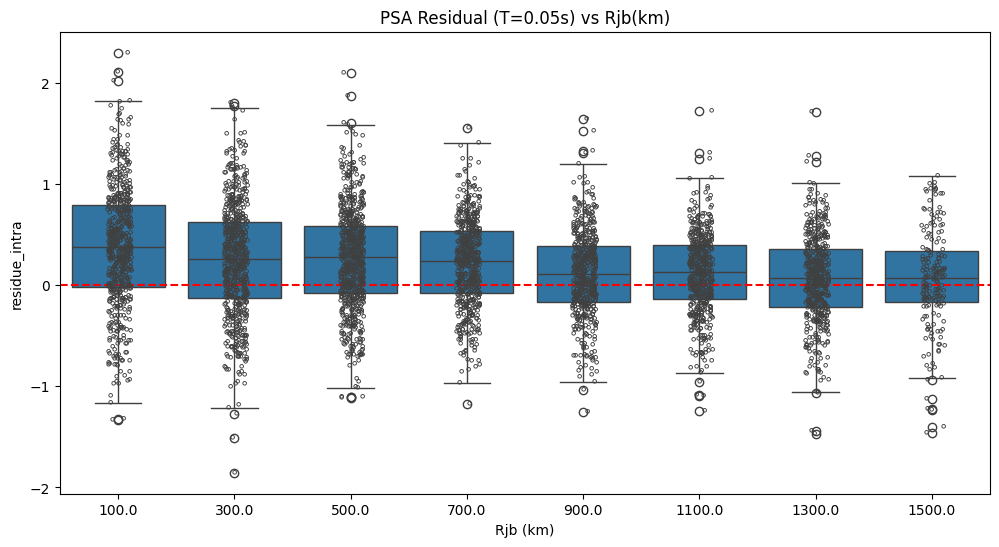

In [ ]:
import matplotlib.pyplot as plt
import pylab as P

num_intervals = int((XXX['Joyner-Boore Dist. (km)'].max() - XXX['Joyner-Boore Dist. (km)'].min()) / 200) + 1

fig, ax = plt.subplots(figsize = (12,6))

df1 = pd.DataFrame(columns = ['residue_intra', 'Rjb (km)'])

for i in range(num_intervals):
  start_dist = i * 200
  end_dist = start_dist + 200

  intervals_X = XXX[(XXX['Joyner-Boore Dist. (km)'] >= start_dist) & (XXX['Joyner-Boore Dist. (km)'] < end_dist)]

  interval_data = residue_intra[(XXX['Joyner-Boore Dist. (km)'] >= start_dist) & (XXX['Joyner-Boore Dist. (km)'] < end_dist)]
  residue_intervals = interval_data['log PSA 0.05s']

  df2 = pd.DataFrame()
  df2['residue_intra']=residue_intervals
  df2['Rjb (km)']=(start_dist+end_dist)/2

  df1 = pd.concat([df1,df2], ignore_index=True)

ax = sns.stripplot(x="Rjb (km)", y="residue_intra", data=df1, ax= ax, marker="$\circ$", color=".25")
ax = sns.boxplot(x="Rjb (km)", y="residue_intra", data=df1, ax=ax)
ax.axhline(0, ls='--', color='r')

# grid_size = 2  # Size of the grid
# block_size = 0.1  # Size of each block

# # Calculate the number of blocks needed in each dimension
# num_blocks = int(grid_size / block_size)

# # Create a grid
# grid = np.zeros((num_blocks, num_blocks))

# # Visualize the grid
# plt.imshow(grid, cmap='binary', interpolation='nearest', extent=[grid_size,1,1, -grid_size])
# plt.xticks(np.arange(0, grid_size+1, block_size))
# plt.yticks(np.arange(0, grid_size+1, block_size))
# plt.grid(color='black', linewidth=0.5)

plt.title('PSA Residual (T=0.05s) vs Rjb(km)')
plt.show()

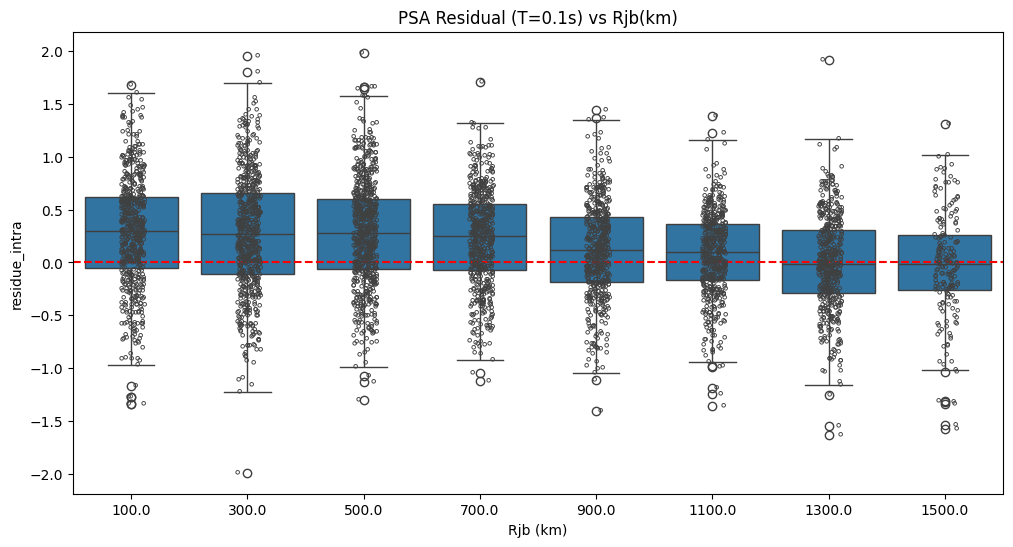

In [ ]:
import matplotlib.pyplot as plt
import pylab as P

num_intervals = int((XXX['Joyner-Boore Dist. (km)'].max() - XXX['Joyner-Boore Dist. (km)'].min()) / 200) + 1

fig, ax = plt.subplots(figsize = (12,6))

df1 = pd.DataFrame(columns = ['residue_intra', 'Rjb (km)'])

for i in range(num_intervals):
  start_dist = i * 200
  end_dist = start_dist + 200

  intervals_X = XXX[(XXX['Joyner-Boore Dist. (km)'] >= start_dist) & (XXX['Joyner-Boore Dist. (km)'] < end_dist)]

  interval_data = residue_intra[(XXX['Joyner-Boore Dist. (km)'] >= start_dist) & (XXX['Joyner-Boore Dist. (km)'] < end_dist)]
  residue_intervals = interval_data['log PSA 0.1s']

  df2 = pd.DataFrame()
  df2['residue_intra']=residue_intervals
  df2['Rjb (km)']=(start_dist+end_dist)/2

  df1 = pd.concat([df1,df2], ignore_index=True)

ax = sns.stripplot(x="Rjb (km)", y="residue_intra", data=df1, ax= ax, marker="$\circ$", color=".25")
ax = sns.boxplot(x="Rjb (km)", y="residue_intra", data=df1, ax=ax)
ax.axhline(0, ls='--', color='r')

# grid_size = 2  # Size of the grid
# block_size = 0.1  # Size of each block

# # Calculate the number of blocks needed in each dimension
# num_blocks = int(grid_size / block_size)

# # Create a grid
# grid = np.zeros((num_blocks, num_blocks))

# # Visualize the grid
# plt.imshow(grid, cmap='binary', interpolation='nearest', extent=[grid_size,1,1, -grid_size])
# plt.xticks(np.arange(0, grid_size+1, block_size))
# plt.yticks(np.arange(0, grid_size+1, block_size))
# plt.grid(color='black', linewidth=0.5)

plt.title('PSA Residual (T=0.1s) vs Rjb(km)')
plt.show()

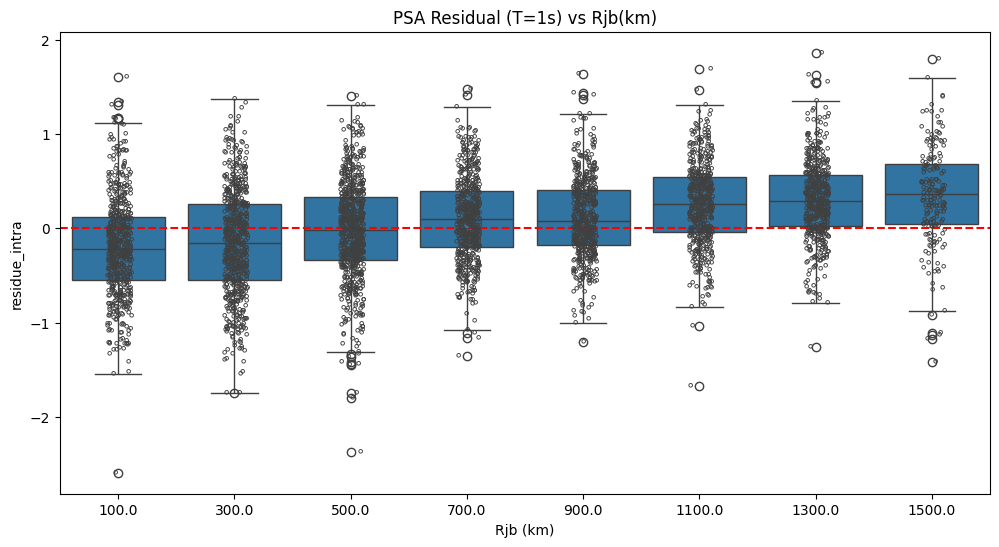

In [ ]:
import matplotlib.pyplot as plt
import pylab as P

num_intervals = int((XXX['Joyner-Boore Dist. (km)'].max() - XXX['Joyner-Boore Dist. (km)'].min()) / 200) + 1

fig, ax = plt.subplots(figsize = (12,6))

df1 = pd.DataFrame(columns = ['residue_intra', 'Rjb (km)'])

for i in range(num_intervals):
  start_dist = i * 200
  end_dist = start_dist + 200

  intervals_X = XXX[(XXX['Joyner-Boore Dist. (km)'] >= start_dist) & (XXX['Joyner-Boore Dist. (km)'] < end_dist)]

  interval_data = residue_intra[(XXX['Joyner-Boore Dist. (km)'] >= start_dist) & (XXX['Joyner-Boore Dist. (km)'] < end_dist)]
  residue_intervals = interval_data['log PSA 1s']

  df2 = pd.DataFrame()
  df2['residue_intra']=residue_intervals
  df2['Rjb (km)']=(start_dist+end_dist)/2

  df1 = pd.concat([df1,df2], ignore_index=True)

ax = sns.stripplot(x="Rjb (km)", y="residue_intra", data=df1, ax= ax, marker="$\circ$", color=".25")
ax = sns.boxplot(x="Rjb (km)", y="residue_intra", data=df1, ax=ax)
ax.axhline(0, ls='--', color='r')

# grid_size = 2  # Size of the grid
# block_size = 0.1  # Size of each block

# # Calculate the number of blocks needed in each dimension
# num_blocks = int(grid_size / block_size)

# # Create a grid
# grid = np.zeros((num_blocks, num_blocks))

# # Visualize the grid
# plt.imshow(grid, cmap='binary', interpolation='nearest', extent=[grid_size,1,1, -grid_size])
# plt.xticks(np.arange(0, grid_size+1, block_size))
# plt.yticks(np.arange(0, grid_size+1, block_size))
# plt.grid(color='black', linewidth=0.5)

plt.title('PSA Residual (T=1s) vs Rjb(km)')
plt.show()